In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import FeetMamitas
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import UNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
FeetMamitas()

Path to downloaded dataset files: /kaggle/input/feet-mamitas
Dataset copied to: /content/datasets/feet-mamitas
Could not delete original download folder '/kaggle/input/feet-mamitas': [Errno 30] Read-only file system: 'sample_66.png'


'/content/datasets/feet-mamitas'

In [ ]:
config = {"Dir of dataset": "./datasets/feet-mamitas", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "UNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","FeetMamitas-UNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 248


Organizing masks: 100%|██████████| 248/248 [00:00<00:00, 173335.68it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 71


Organizing masks: 100%|██████████| 71/71 [00:00<00:00, 141874.98it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 35


Organizing masks: 100%|██████████| 35/35 [00:00<00:00, 92385.55it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


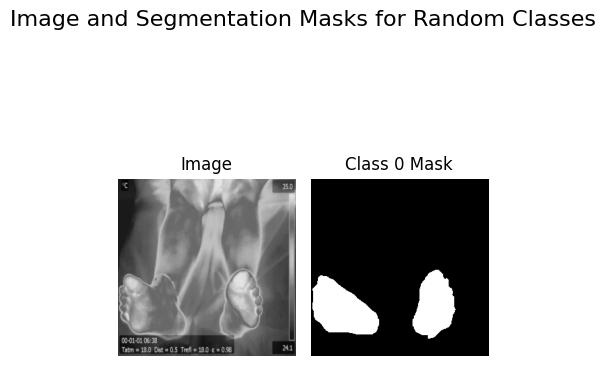

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 229MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


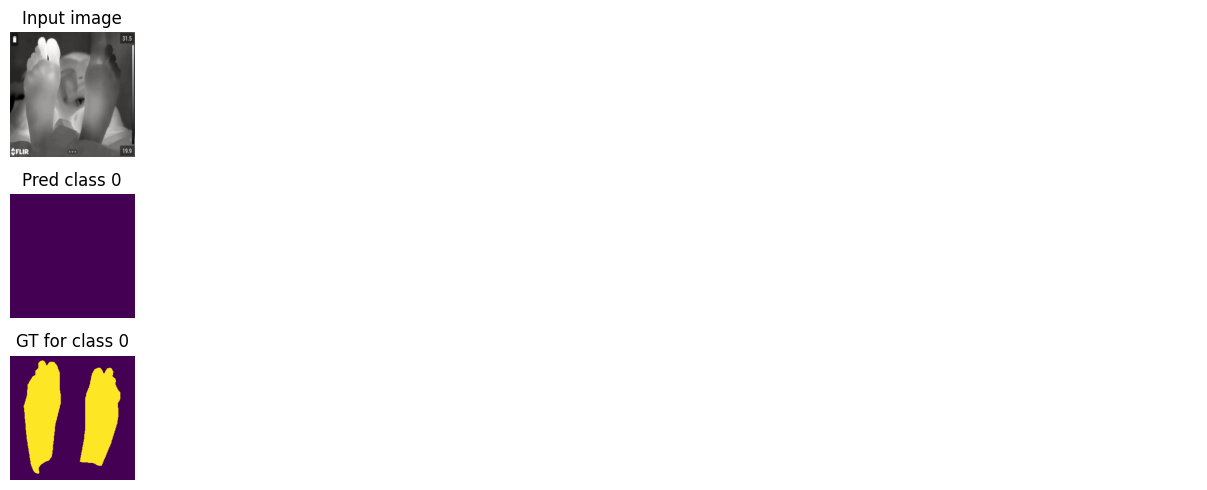

Train loss: 0.62057 | Time: 0m 5s | Val loss: 0.68068
Train_DICE_avg: 0.47504 | Train_Jaccard_avg: 0.32424 | Train_Sensitivity_avg: 0.37207 | Train_Specificity_avg: 0.87215 
Class 0 - Train_DICE: 0.47504 | Train_Jaccard: 0.32424 | Train_Sensitivity: 0.37207 | Train_Specificity: 0.87215 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 0.72937 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 0.72937 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.52080 | Time: 0m 9s | Val loss: 0.67148
Train_DICE_avg: 0.57927 | Train_Jaccard_avg: 0.42279 | Train_Sensitivity_avg: 0.45585 | Train_Specificity_avg: 0.94584 
Class 0 - Train_DICE: 0.57927 | Train_Jaccard: 0.42279 | Train_Sensitivity: 0.45585 | Train_Specificity: 0.94584 
Val_DICE_avg: 0.12114 | Val_Jaccard_avg: 0.07265 | Val_Sensitivity_avg: 0.78456 | Val_Specificity_avg: 0.75780 
Class 0 - Val_DICE: 0.12114 | Val_Jaccard: 0.07265 | Val_Sensitivity: 0.78456 | Val_Specificity: 0.75780 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.47284 | Time: 0m 13s | Val loss: 0.59602
Train_DICE_avg: 0.61711 | Train_Jaccard_avg: 0.46262 | Train_Sensitivity_avg: 0.49001 | Train_Specificity_avg: 0.95830 
Class 0 - Train_DICE: 0.61711 | Train_Jaccard: 0.46262 | Train_Sensitivity: 0.49001 | Train_Specificity: 0.95830 
Val_DICE_avg: 0.64639 | Val_Jaccard_avg: 0.49120 | Val_Sensitivity_avg: 0.79359 | Val_Specificity_avg: 0.87108 
Class 0 - Val_DICE: 0.64639 | Val_Jaccard: 0.49120 | Val_Sensitivity: 0.79359 | Val_Specificity: 0.87108 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.44404 | Time: 0m 17s | Val loss: 0.44989
Train_DICE_avg: 0.65263 | Train_Jaccard_avg: 0.50065 | Train_Sensitivity_avg: 0.53054 | Train_Specificity_avg: 0.96346 
Class 0 - Train_DICE: 0.65263 | Train_Jaccard: 0.50065 | Train_Sensitivity: 0.53054 | Train_Specificity: 0.96346 
Val_DICE_avg: 0.72754 | Val_Jaccard_avg: 0.58350 | Val_Sensitivity_avg: 0.65490 | Val_Specificity_avg: 0.95033 
Class 0 - Val_DICE: 0.72754 | Val_Jaccard: 0.58350 | Val_Sensitivity: 0.65490 | Val_Specificity: 0.95033 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.41917 | Time: 0m 21s | Val loss: 0.40186
Train_DICE_avg: 0.68769 | Train_Jaccard_avg: 0.53930 | Train_Sensitivity_avg: 0.56960 | Train_Specificity_avg: 0.96922 
Class 0 - Train_DICE: 0.68769 | Train_Jaccard: 0.53930 | Train_Sensitivity: 0.56960 | Train_Specificity: 0.96922 
Val_DICE_avg: 0.73106 | Val_Jaccard_avg: 0.59199 | Val_Sensitivity_avg: 0.62843 | Val_Specificity_avg: 0.96768 
Class 0 - Val_DICE: 0.73106 | Val_Jaccard: 0.59199 | Val_Sensitivity: 0.62843 | Val_Specificity: 0.96768 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


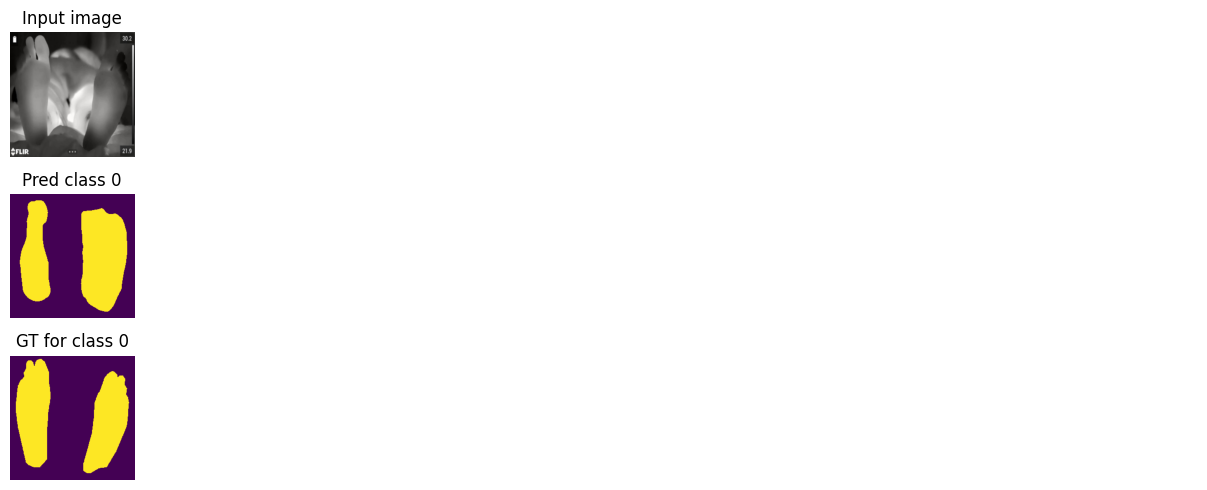

Train loss: 0.40408 | Time: 0m 25s | Val loss: 0.37667
Train_DICE_avg: 0.70778 | Train_Jaccard_avg: 0.56374 | Train_Sensitivity_avg: 0.59244 | Train_Specificity_avg: 0.97329 
Class 0 - Train_DICE: 0.70778 | Train_Jaccard: 0.56374 | Train_Sensitivity: 0.59244 | Train_Specificity: 0.97329 
Val_DICE_avg: 0.77122 | Val_Jaccard_avg: 0.64062 | Val_Sensitivity_avg: 0.68182 | Val_Specificity_avg: 0.96972 
Class 0 - Val_DICE: 0.77122 | Val_Jaccard: 0.64062 | Val_Sensitivity: 0.68182 | Val_Specificity: 0.96972 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.39443 | Time: 0m 28s | Val loss: 0.36101
Train_DICE_avg: 0.71976 | Train_Jaccard_avg: 0.57782 | Train_Sensitivity_avg: 0.60682 | Train_Specificity_avg: 0.97378 
Class 0 - Train_DICE: 0.71976 | Train_Jaccard: 0.57782 | Train_Sensitivity: 0.60682 | Train_Specificity: 0.97378 
Val_DICE_avg: 0.78530 | Val_Jaccard_avg: 0.65945 | Val_Sensitivity_avg: 0.70005 | Val_Specificity_avg: 0.97209 
Class 0 - Val_DICE: 0.78530 | Val_Jaccard: 0.65945 | Val_Sensitivity: 0.70005 | Val_Specificity: 0.97209 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.38155 | Time: 0m 32s | Val loss: 0.33832
Train_DICE_avg: 0.73943 | Train_Jaccard_avg: 0.60419 | Train_Sensitivity_avg: 0.62928 | Train_Specificity_avg: 0.97776 
Class 0 - Train_DICE: 0.73943 | Train_Jaccard: 0.60419 | Train_Sensitivity: 0.62928 | Train_Specificity: 0.97776 
Val_DICE_avg: 0.82628 | Val_Jaccard_avg: 0.71307 | Val_Sensitivity_avg: 0.76370 | Val_Specificity_avg: 0.96903 
Class 0 - Val_DICE: 0.82628 | Val_Jaccard: 0.71307 | Val_Sensitivity: 0.76370 | Val_Specificity: 0.96903 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.37106 | Time: 0m 36s | Val loss: 0.32583
Train_DICE_avg: 0.75680 | Train_Jaccard_avg: 0.62518 | Train_Sensitivity_avg: 0.65060 | Train_Specificity_avg: 0.97942 
Class 0 - Train_DICE: 0.75680 | Train_Jaccard: 0.62518 | Train_Sensitivity: 0.65060 | Train_Specificity: 0.97942 
Val_DICE_avg: 0.84746 | Val_Jaccard_avg: 0.74416 | Val_Sensitivity_avg: 0.79808 | Val_Specificity_avg: 0.96753 
Class 0 - Val_DICE: 0.84746 | Val_Jaccard: 0.74416 | Val_Sensitivity: 0.79808 | Val_Specificity: 0.96753 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.36065 | Time: 0m 39s | Val loss: 0.31894
Train_DICE_avg: 0.77012 | Train_Jaccard_avg: 0.64519 | Train_Sensitivity_avg: 0.66608 | Train_Specificity_avg: 0.98341 
Class 0 - Train_DICE: 0.77012 | Train_Jaccard: 0.64519 | Train_Sensitivity: 0.66608 | Train_Specificity: 0.98341 
Val_DICE_avg: 0.85650 | Val_Jaccard_avg: 0.75691 | Val_Sensitivity_avg: 0.80640 | Val_Specificity_avg: 0.97087 
Class 0 - Val_DICE: 0.85650 | Val_Jaccard: 0.75691 | Val_Sensitivity: 0.80640 | Val_Specificity: 0.97087 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


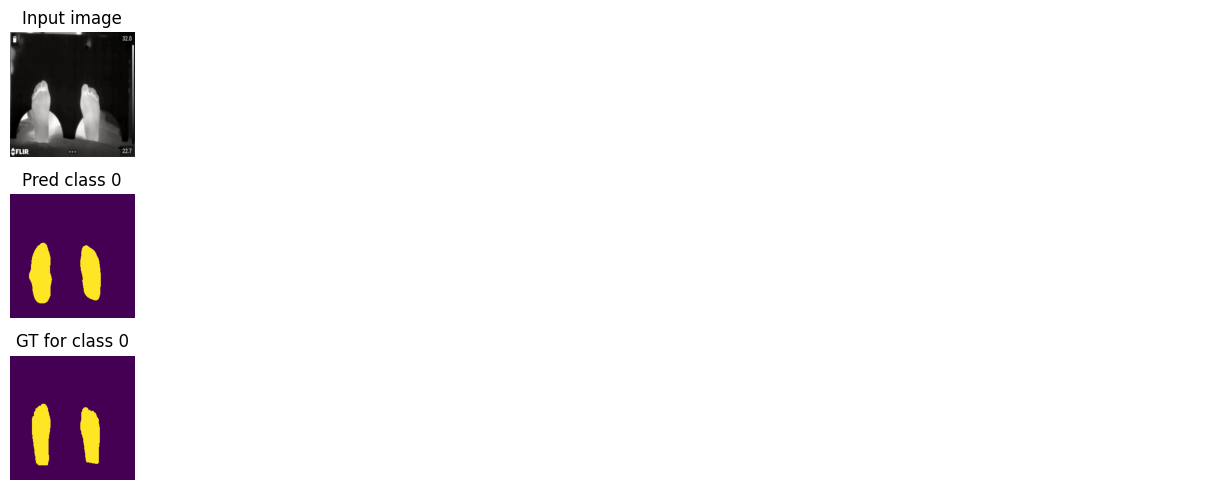

Train loss: 0.36439 | Time: 0m 43s | Val loss: 0.33310
Train_DICE_avg: 0.76459 | Train_Jaccard_avg: 0.63661 | Train_Sensitivity_avg: 0.66858 | Train_Specificity_avg: 0.97596 
Class 0 - Train_DICE: 0.76459 | Train_Jaccard: 0.63661 | Train_Sensitivity: 0.66858 | Train_Specificity: 0.97596 
Val_DICE_avg: 0.85501 | Val_Jaccard_avg: 0.75659 | Val_Sensitivity_avg: 0.89687 | Val_Specificity_avg: 0.93849 
Class 0 - Val_DICE: 0.85501 | Val_Jaccard: 0.75659 | Val_Sensitivity: 0.89687 | Val_Specificity: 0.93849 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.35166 | Time: 0m 47s | Val loss: 0.29117
Train_DICE_avg: 0.77441 | Train_Jaccard_avg: 0.65326 | Train_Sensitivity_avg: 0.67296 | Train_Specificity_avg: 0.98470 
Class 0 - Train_DICE: 0.77441 | Train_Jaccard: 0.65326 | Train_Sensitivity: 0.67296 | Train_Specificity: 0.98470 
Val_DICE_avg: 0.88017 | Val_Jaccard_avg: 0.79221 | Val_Sensitivity_avg: 0.83945 | Val_Specificity_avg: 0.97181 
Class 0 - Val_DICE: 0.88017 | Val_Jaccard: 0.79221 | Val_Sensitivity: 0.83945 | Val_Specificity: 0.97181 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.34346 | Time: 0m 51s | Val loss: 0.29737
Train_DICE_avg: 0.79966 | Train_Jaccard_avg: 0.68589 | Train_Sensitivity_avg: 0.70912 | Train_Specificity_avg: 0.98391 
Class 0 - Train_DICE: 0.79966 | Train_Jaccard: 0.68589 | Train_Sensitivity: 0.70912 | Train_Specificity: 0.98391 
Val_DICE_avg: 0.88350 | Val_Jaccard_avg: 0.79772 | Val_Sensitivity_avg: 0.84598 | Val_Specificity_avg: 0.97501 
Class 0 - Val_DICE: 0.88350 | Val_Jaccard: 0.79772 | Val_Sensitivity: 0.84598 | Val_Specificity: 0.97501 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.33453 | Time: 0m 55s | Val loss: 0.29023
Train_DICE_avg: 0.80709 | Train_Jaccard_avg: 0.69606 | Train_Sensitivity_avg: 0.71419 | Train_Specificity_avg: 0.98699 
Class 0 - Train_DICE: 0.80709 | Train_Jaccard: 0.69606 | Train_Sensitivity: 0.71419 | Train_Specificity: 0.98699 
Val_DICE_avg: 0.87782 | Val_Jaccard_avg: 0.78982 | Val_Sensitivity_avg: 0.81388 | Val_Specificity_avg: 0.98595 
Class 0 - Val_DICE: 0.87782 | Val_Jaccard: 0.78982 | Val_Sensitivity: 0.81388 | Val_Specificity: 0.98595 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.32813 | Time: 0m 58s | Val loss: 0.28624
Train_DICE_avg: 0.81939 | Train_Jaccard_avg: 0.71491 | Train_Sensitivity_avg: 0.73225 | Train_Specificity_avg: 0.98688 
Class 0 - Train_DICE: 0.81939 | Train_Jaccard: 0.71491 | Train_Sensitivity: 0.73225 | Train_Specificity: 0.98688 
Val_DICE_avg: 0.87788 | Val_Jaccard_avg: 0.78958 | Val_Sensitivity_avg: 0.80699 | Val_Specificity_avg: 0.98825 
Class 0 - Val_DICE: 0.87788 | Val_Jaccard: 0.78958 | Val_Sensitivity: 0.80699 | Val_Specificity: 0.98825 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


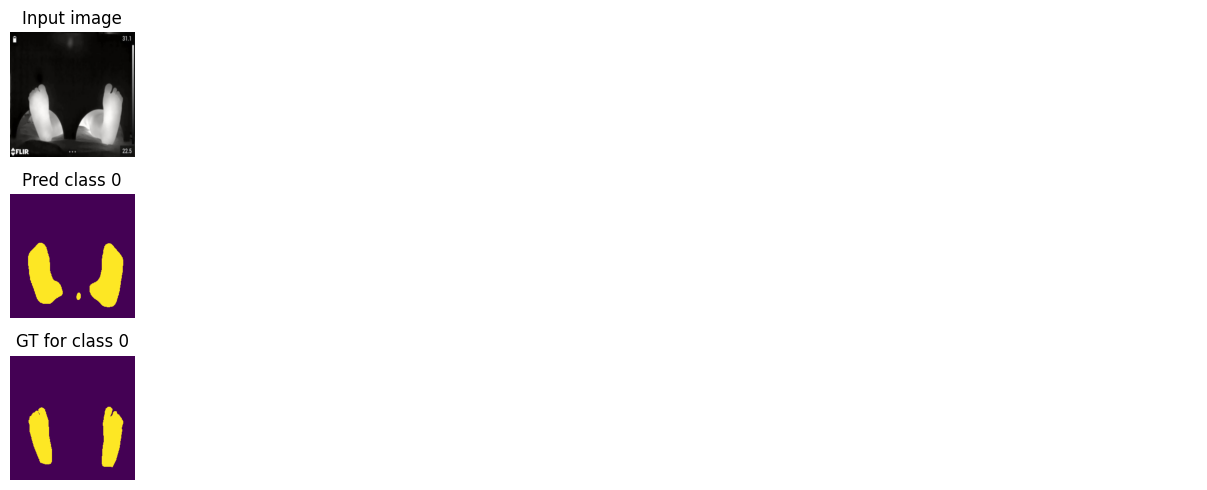

Train loss: 0.32387 | Time: 1m 3s | Val loss: 0.27726
Train_DICE_avg: 0.83257 | Train_Jaccard_avg: 0.73087 | Train_Sensitivity_avg: 0.75048 | Train_Specificity_avg: 0.98696 
Class 0 - Train_DICE: 0.83257 | Train_Jaccard: 0.73087 | Train_Sensitivity: 0.75048 | Train_Specificity: 0.98696 
Val_DICE_avg: 0.90933 | Val_Jaccard_avg: 0.83799 | Val_Sensitivity_avg: 0.86650 | Val_Specificity_avg: 0.98406 
Class 0 - Val_DICE: 0.90933 | Val_Jaccard: 0.83799 | Val_Sensitivity: 0.86650 | Val_Specificity: 0.98406 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.31782 | Time: 1m 6s | Val loss: 0.27210
Train_DICE_avg: 0.83416 | Train_Jaccard_avg: 0.73498 | Train_Sensitivity_avg: 0.75183 | Train_Specificity_avg: 0.98907 
Class 0 - Train_DICE: 0.83416 | Train_Jaccard: 0.73498 | Train_Sensitivity: 0.75183 | Train_Specificity: 0.98907 
Val_DICE_avg: 0.91741 | Val_Jaccard_avg: 0.85230 | Val_Sensitivity_avg: 0.89370 | Val_Specificity_avg: 0.97719 
Class 0 - Val_DICE: 0.91741 | Val_Jaccard: 0.85230 | Val_Sensitivity: 0.89370 | Val_Specificity: 0.97719 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.31324 | Time: 1m 10s | Val loss: 0.26176
Train_DICE_avg: 0.84286 | Train_Jaccard_avg: 0.74829 | Train_Sensitivity_avg: 0.76553 | Train_Specificity_avg: 0.98885 
Class 0 - Train_DICE: 0.84286 | Train_Jaccard: 0.74829 | Train_Sensitivity: 0.76553 | Train_Specificity: 0.98885 
Val_DICE_avg: 0.91043 | Val_Jaccard_avg: 0.84083 | Val_Sensitivity_avg: 0.86792 | Val_Specificity_avg: 0.98201 
Class 0 - Val_DICE: 0.91043 | Val_Jaccard: 0.84083 | Val_Sensitivity: 0.86792 | Val_Specificity: 0.98201 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.30797 | Time: 1m 14s | Val loss: 0.26043
Train_DICE_avg: 0.85447 | Train_Jaccard_avg: 0.76398 | Train_Sensitivity_avg: 0.78000 | Train_Specificity_avg: 0.98933 
Class 0 - Train_DICE: 0.85447 | Train_Jaccard: 0.76398 | Train_Sensitivity: 0.78000 | Train_Specificity: 0.98933 
Val_DICE_avg: 0.91941 | Val_Jaccard_avg: 0.85545 | Val_Sensitivity_avg: 0.88557 | Val_Specificity_avg: 0.98206 
Class 0 - Val_DICE: 0.91941 | Val_Jaccard: 0.85545 | Val_Sensitivity: 0.88557 | Val_Specificity: 0.98206 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.30083 | Time: 1m 18s | Val loss: 0.25553
Train_DICE_avg: 0.86248 | Train_Jaccard_avg: 0.77616 | Train_Sensitivity_avg: 0.79177 | Train_Specificity_avg: 0.99031 
Class 0 - Train_DICE: 0.86248 | Train_Jaccard: 0.77616 | Train_Sensitivity: 0.79177 | Train_Specificity: 0.99031 
Val_DICE_avg: 0.92635 | Val_Jaccard_avg: 0.86570 | Val_Sensitivity_avg: 0.89088 | Val_Specificity_avg: 0.98557 
Class 0 - Val_DICE: 0.92635 | Val_Jaccard: 0.86570 | Val_Sensitivity: 0.89088 | Val_Specificity: 0.98557 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


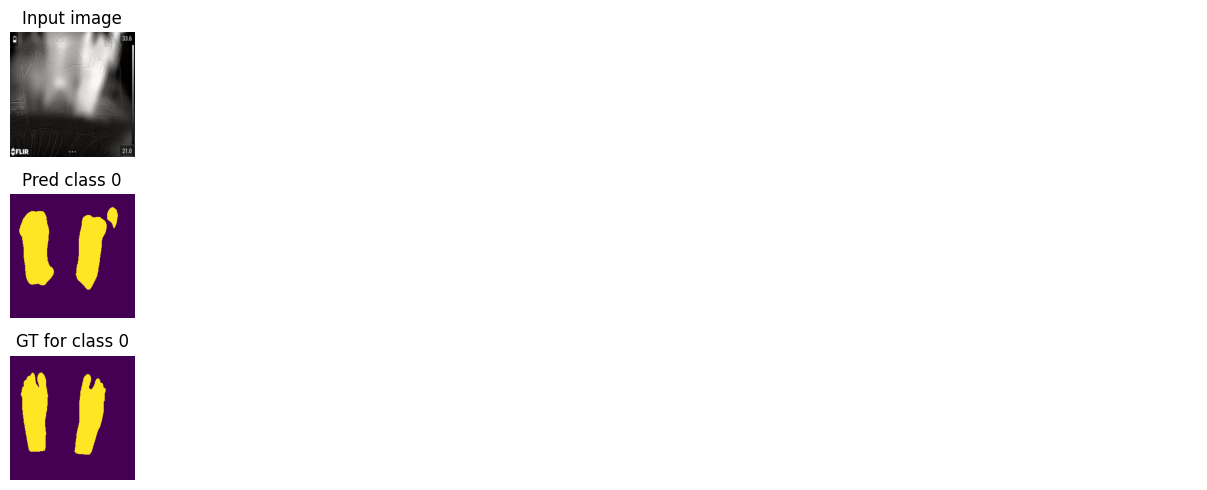

Train loss: 0.30667 | Time: 1m 21s | Val loss: 0.23885
Train_DICE_avg: 0.85742 | Train_Jaccard_avg: 0.76657 | Train_Sensitivity_avg: 0.79297 | Train_Specificity_avg: 0.98362 
Class 0 - Train_DICE: 0.85742 | Train_Jaccard: 0.76657 | Train_Sensitivity: 0.79297 | Train_Specificity: 0.98362 
Val_DICE_avg: 0.91938 | Val_Jaccard_avg: 0.85876 | Val_Sensitivity_avg: 0.89198 | Val_Specificity_avg: 0.98212 
Class 0 - Val_DICE: 0.91938 | Val_Jaccard: 0.85876 | Val_Sensitivity: 0.89198 | Val_Specificity: 0.98212 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.30415 | Time: 1m 25s | Val loss: 0.24712
Train_DICE_avg: 0.84296 | Train_Jaccard_avg: 0.75142 | Train_Sensitivity_avg: 0.77367 | Train_Specificity_avg: 0.98706 
Class 0 - Train_DICE: 0.84296 | Train_Jaccard: 0.75142 | Train_Sensitivity: 0.77367 | Train_Specificity: 0.98706 
Val_DICE_avg: 0.88652 | Val_Jaccard_avg: 0.81317 | Val_Sensitivity_avg: 0.82282 | Val_Specificity_avg: 0.99236 
Class 0 - Val_DICE: 0.88652 | Val_Jaccard: 0.81317 | Val_Sensitivity: 0.82282 | Val_Specificity: 0.99236 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.29213 | Time: 1m 29s | Val loss: 0.24047
Train_DICE_avg: 0.87932 | Train_Jaccard_avg: 0.79830 | Train_Sensitivity_avg: 0.81452 | Train_Specificity_avg: 0.98969 
Class 0 - Train_DICE: 0.87932 | Train_Jaccard: 0.79830 | Train_Sensitivity: 0.81452 | Train_Specificity: 0.98969 
Val_DICE_avg: 0.92266 | Val_Jaccard_avg: 0.86237 | Val_Sensitivity_avg: 0.88547 | Val_Specificity_avg: 0.98443 
Class 0 - Val_DICE: 0.92266 | Val_Jaccard: 0.86237 | Val_Sensitivity: 0.88547 | Val_Specificity: 0.98443 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.28978 | Time: 1m 33s | Val loss: 0.23325
Train_DICE_avg: 0.86965 | Train_Jaccard_avg: 0.78957 | Train_Sensitivity_avg: 0.81037 | Train_Specificity_avg: 0.98825 
Class 0 - Train_DICE: 0.86965 | Train_Jaccard: 0.78957 | Train_Sensitivity: 0.81037 | Train_Specificity: 0.98825 
Val_DICE_avg: 0.92679 | Val_Jaccard_avg: 0.86766 | Val_Sensitivity_avg: 0.89052 | Val_Specificity_avg: 0.98389 
Class 0 - Val_DICE: 0.92679 | Val_Jaccard: 0.86766 | Val_Sensitivity: 0.89052 | Val_Specificity: 0.98389 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.28540 | Time: 1m 36s | Val loss: 0.21825
Train_DICE_avg: 0.87690 | Train_Jaccard_avg: 0.79843 | Train_Sensitivity_avg: 0.81555 | Train_Specificity_avg: 0.98954 
Class 0 - Train_DICE: 0.87690 | Train_Jaccard: 0.79843 | Train_Sensitivity: 0.81555 | Train_Specificity: 0.98954 
Val_DICE_avg: 0.93657 | Val_Jaccard_avg: 0.88516 | Val_Sensitivity_avg: 0.90809 | Val_Specificity_avg: 0.98564 
Class 0 - Val_DICE: 0.93657 | Val_Jaccard: 0.88516 | Val_Sensitivity: 0.90809 | Val_Specificity: 0.98564 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


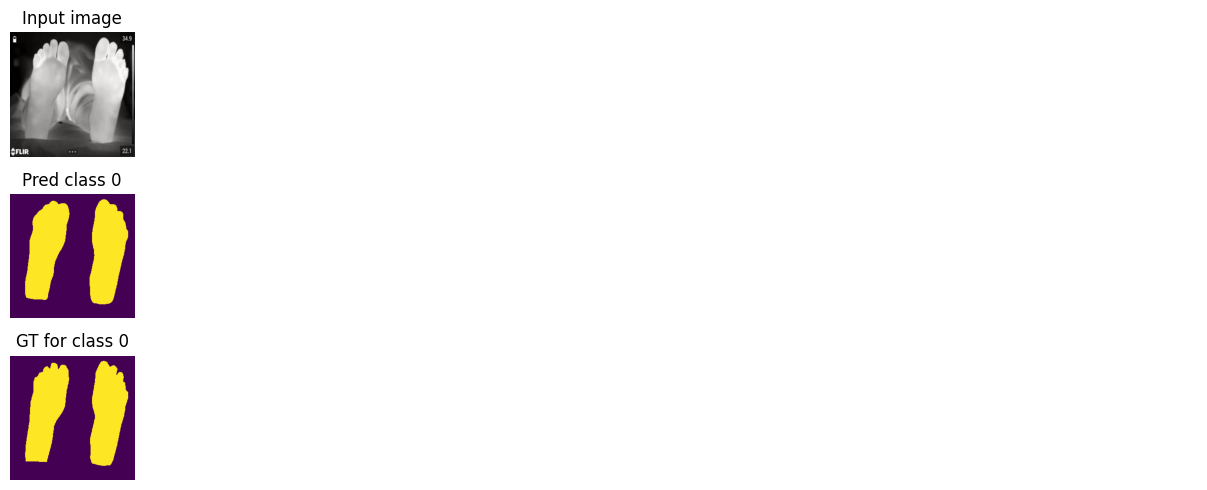

Train loss: 0.27712 | Time: 1m 41s | Val loss: 0.21867
Train_DICE_avg: 0.89639 | Train_Jaccard_avg: 0.82529 | Train_Sensitivity_avg: 0.83999 | Train_Specificity_avg: 0.99181 
Class 0 - Train_DICE: 0.89639 | Train_Jaccard: 0.82529 | Train_Sensitivity: 0.83999 | Train_Specificity: 0.99181 
Val_DICE_avg: 0.94297 | Val_Jaccard_avg: 0.89486 | Val_Sensitivity_avg: 0.91854 | Val_Specificity_avg: 0.98587 
Class 0 - Val_DICE: 0.94297 | Val_Jaccard: 0.89486 | Val_Sensitivity: 0.91854 | Val_Specificity: 0.98587 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.27756 | Time: 1m 44s | Val loss: 0.21296
Train_DICE_avg: 0.89421 | Train_Jaccard_avg: 0.82136 | Train_Sensitivity_avg: 0.83888 | Train_Specificity_avg: 0.99066 
Class 0 - Train_DICE: 0.89421 | Train_Jaccard: 0.82136 | Train_Sensitivity: 0.83888 | Train_Specificity: 0.99066 
Val_DICE_avg: 0.93512 | Val_Jaccard_avg: 0.88098 | Val_Sensitivity_avg: 0.89439 | Val_Specificity_avg: 0.99055 
Class 0 - Val_DICE: 0.93512 | Val_Jaccard: 0.88098 | Val_Sensitivity: 0.89439 | Val_Specificity: 0.99055 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.27206 | Time: 1m 48s | Val loss: 0.20997
Train_DICE_avg: 0.89538 | Train_Jaccard_avg: 0.82493 | Train_Sensitivity_avg: 0.84135 | Train_Specificity_avg: 0.99099 
Class 0 - Train_DICE: 0.89538 | Train_Jaccard: 0.82493 | Train_Sensitivity: 0.84135 | Train_Specificity: 0.99099 
Val_DICE_avg: 0.95053 | Val_Jaccard_avg: 0.90755 | Val_Sensitivity_avg: 0.93758 | Val_Specificity_avg: 0.98415 
Class 0 - Val_DICE: 0.95053 | Val_Jaccard: 0.90755 | Val_Sensitivity: 0.93758 | Val_Specificity: 0.98415 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.27117 | Time: 1m 52s | Val loss: 0.19898
Train_DICE_avg: 0.89346 | Train_Jaccard_avg: 0.82348 | Train_Sensitivity_avg: 0.83848 | Train_Specificity_avg: 0.99173 
Class 0 - Train_DICE: 0.89346 | Train_Jaccard: 0.82348 | Train_Sensitivity: 0.83848 | Train_Specificity: 0.99173 
Val_DICE_avg: 0.94746 | Val_Jaccard_avg: 0.90283 | Val_Sensitivity_avg: 0.93017 | Val_Specificity_avg: 0.98383 
Class 0 - Val_DICE: 0.94746 | Val_Jaccard: 0.90283 | Val_Sensitivity: 0.93017 | Val_Specificity: 0.98383 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.26745 | Time: 1m 55s | Val loss: 0.20055
Train_DICE_avg: 0.89956 | Train_Jaccard_avg: 0.83258 | Train_Sensitivity_avg: 0.84748 | Train_Specificity_avg: 0.99181 
Class 0 - Train_DICE: 0.89956 | Train_Jaccard: 0.83258 | Train_Sensitivity: 0.84748 | Train_Specificity: 0.99181 
Val_DICE_avg: 0.94001 | Val_Jaccard_avg: 0.89224 | Val_Sensitivity_avg: 0.91407 | Val_Specificity_avg: 0.98627 
Class 0 - Val_DICE: 0.94001 | Val_Jaccard: 0.89224 | Val_Sensitivity: 0.91407 | Val_Specificity: 0.98627 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


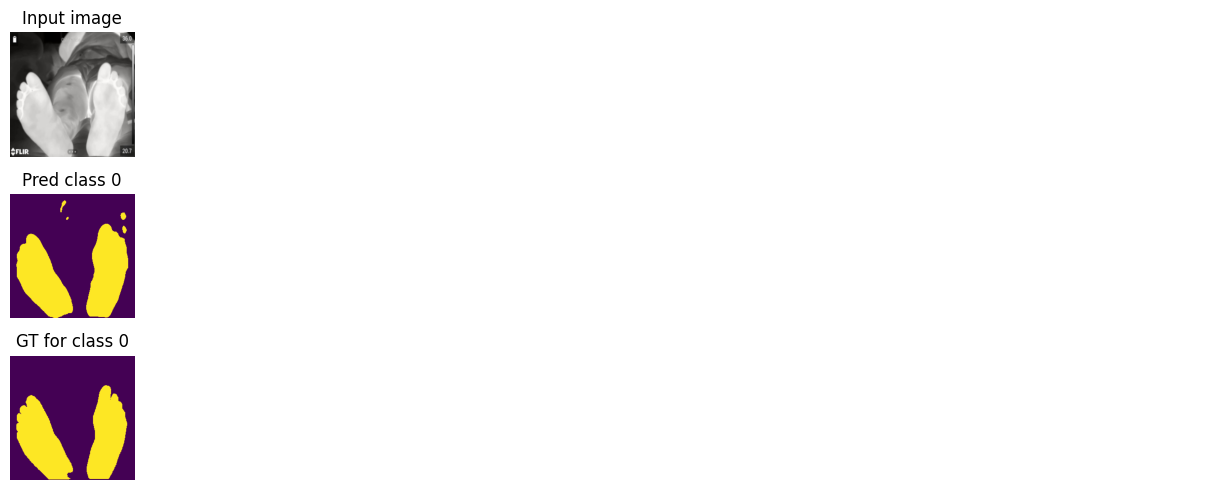

Train loss: 0.26646 | Time: 1m 59s | Val loss: 0.19302
Train_DICE_avg: 0.89997 | Train_Jaccard_avg: 0.83046 | Train_Sensitivity_avg: 0.84982 | Train_Specificity_avg: 0.98871 
Class 0 - Train_DICE: 0.89997 | Train_Jaccard: 0.83046 | Train_Sensitivity: 0.84982 | Train_Specificity: 0.98871 
Val_DICE_avg: 0.94693 | Val_Jaccard_avg: 0.90165 | Val_Sensitivity_avg: 0.92916 | Val_Specificity_avg: 0.98628 
Class 0 - Val_DICE: 0.94693 | Val_Jaccard: 0.90165 | Val_Sensitivity: 0.92916 | Val_Specificity: 0.98628 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.26375 | Time: 2m 3s | Val loss: 0.18217
Train_DICE_avg: 0.90316 | Train_Jaccard_avg: 0.83674 | Train_Sensitivity_avg: 0.85343 | Train_Specificity_avg: 0.99194 
Class 0 - Train_DICE: 0.90316 | Train_Jaccard: 0.83674 | Train_Sensitivity: 0.85343 | Train_Specificity: 0.99194 
Val_DICE_avg: 0.94713 | Val_Jaccard_avg: 0.90238 | Val_Sensitivity_avg: 0.92578 | Val_Specificity_avg: 0.98810 
Class 0 - Val_DICE: 0.94713 | Val_Jaccard: 0.90238 | Val_Sensitivity: 0.92578 | Val_Specificity: 0.98810 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.25601 | Time: 2m 6s | Val loss: 0.18820
Train_DICE_avg: 0.91173 | Train_Jaccard_avg: 0.84985 | Train_Sensitivity_avg: 0.86586 | Train_Specificity_avg: 0.99066 
Class 0 - Train_DICE: 0.91173 | Train_Jaccard: 0.84985 | Train_Sensitivity: 0.86586 | Train_Specificity: 0.99066 
Val_DICE_avg: 0.94552 | Val_Jaccard_avg: 0.89879 | Val_Sensitivity_avg: 0.91486 | Val_Specificity_avg: 0.99018 
Class 0 - Val_DICE: 0.94552 | Val_Jaccard: 0.89879 | Val_Sensitivity: 0.91486 | Val_Specificity: 0.99018 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.25578 | Time: 2m 10s | Val loss: 0.18815
Train_DICE_avg: 0.91194 | Train_Jaccard_avg: 0.84947 | Train_Sensitivity_avg: 0.86267 | Train_Specificity_avg: 0.99269 
Class 0 - Train_DICE: 0.91194 | Train_Jaccard: 0.84947 | Train_Sensitivity: 0.86267 | Train_Specificity: 0.99269 
Val_DICE_avg: 0.95685 | Val_Jaccard_avg: 0.91989 | Val_Sensitivity_avg: 0.93994 | Val_Specificity_avg: 0.98998 
Class 0 - Val_DICE: 0.95685 | Val_Jaccard: 0.91989 | Val_Sensitivity: 0.93994 | Val_Specificity: 0.98998 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.25283 | Time: 2m 14s | Val loss: 0.18703
Train_DICE_avg: 0.91485 | Train_Jaccard_avg: 0.85374 | Train_Sensitivity_avg: 0.86657 | Train_Specificity_avg: 0.99326 
Class 0 - Train_DICE: 0.91485 | Train_Jaccard: 0.85374 | Train_Sensitivity: 0.86657 | Train_Specificity: 0.99326 
Val_DICE_avg: 0.95422 | Val_Jaccard_avg: 0.91443 | Val_Sensitivity_avg: 0.93108 | Val_Specificity_avg: 0.99034 
Class 0 - Val_DICE: 0.95422 | Val_Jaccard: 0.91443 | Val_Sensitivity: 0.93108 | Val_Specificity: 0.99034 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


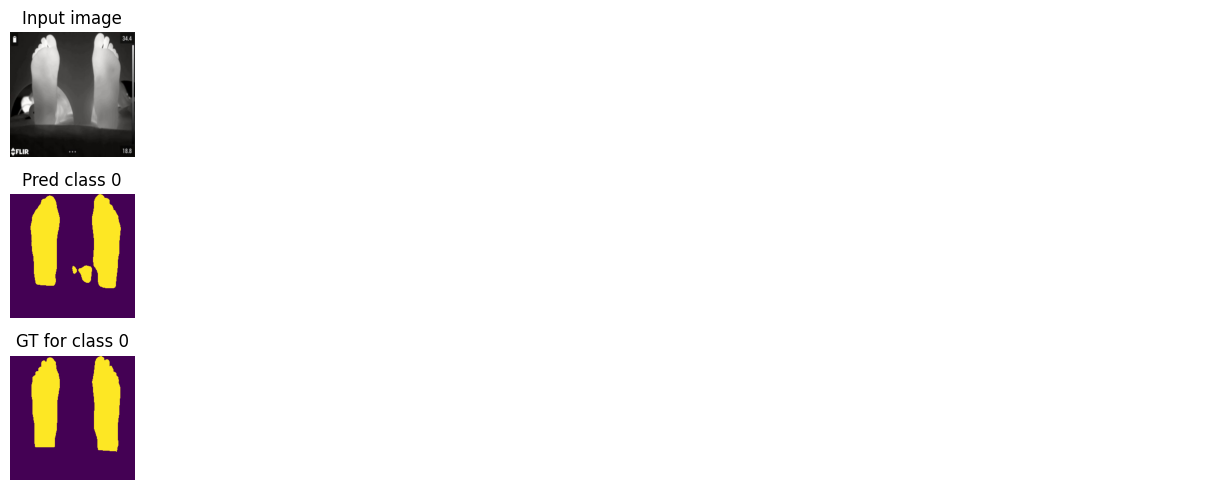

Train loss: 0.24849 | Time: 2m 18s | Val loss: 0.18423
Train_DICE_avg: 0.91942 | Train_Jaccard_avg: 0.86099 | Train_Sensitivity_avg: 0.87488 | Train_Specificity_avg: 0.99289 
Class 0 - Train_DICE: 0.91942 | Train_Jaccard: 0.86099 | Train_Sensitivity: 0.87488 | Train_Specificity: 0.99289 
Val_DICE_avg: 0.95271 | Val_Jaccard_avg: 0.91205 | Val_Sensitivity_avg: 0.93359 | Val_Specificity_avg: 0.98866 
Class 0 - Val_DICE: 0.95271 | Val_Jaccard: 0.91205 | Val_Sensitivity: 0.93359 | Val_Specificity: 0.98866 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.24635 | Time: 2m 22s | Val loss: 0.18272
Train_DICE_avg: 0.91443 | Train_Jaccard_avg: 0.85501 | Train_Sensitivity_avg: 0.86674 | Train_Specificity_avg: 0.99377 
Class 0 - Train_DICE: 0.91443 | Train_Jaccard: 0.85501 | Train_Sensitivity: 0.86674 | Train_Specificity: 0.99377 
Val_DICE_avg: 0.95836 | Val_Jaccard_avg: 0.92177 | Val_Sensitivity_avg: 0.94373 | Val_Specificity_avg: 0.98843 
Class 0 - Val_DICE: 0.95836 | Val_Jaccard: 0.92177 | Val_Sensitivity: 0.94373 | Val_Specificity: 0.98843 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.24587 | Time: 2m 25s | Val loss: 0.17970
Train_DICE_avg: 0.92457 | Train_Jaccard_avg: 0.86850 | Train_Sensitivity_avg: 0.88272 | Train_Specificity_avg: 0.99304 
Class 0 - Train_DICE: 0.92457 | Train_Jaccard: 0.86850 | Train_Sensitivity: 0.88272 | Train_Specificity: 0.99304 
Val_DICE_avg: 0.95752 | Val_Jaccard_avg: 0.92048 | Val_Sensitivity_avg: 0.94122 | Val_Specificity_avg: 0.98751 
Class 0 - Val_DICE: 0.95752 | Val_Jaccard: 0.92048 | Val_Sensitivity: 0.94122 | Val_Specificity: 0.98751 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.24075 | Time: 2m 29s | Val loss: 0.17575
Train_DICE_avg: 0.92617 | Train_Jaccard_avg: 0.87079 | Train_Sensitivity_avg: 0.88167 | Train_Specificity_avg: 0.99417 
Class 0 - Train_DICE: 0.92617 | Train_Jaccard: 0.87079 | Train_Sensitivity: 0.88167 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.95825 | Val_Jaccard_avg: 0.92242 | Val_Sensitivity_avg: 0.94673 | Val_Specificity_avg: 0.98477 
Class 0 - Val_DICE: 0.95825 | Val_Jaccard: 0.92242 | Val_Sensitivity: 0.94673 | Val_Specificity: 0.98477 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.24121 | Time: 2m 33s | Val loss: 0.17059
Train_DICE_avg: 0.92448 | Train_Jaccard_avg: 0.87036 | Train_Sensitivity_avg: 0.88193 | Train_Specificity_avg: 0.99409 
Class 0 - Train_DICE: 0.92448 | Train_Jaccard: 0.87036 | Train_Sensitivity: 0.88193 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.96018 | Val_Jaccard_avg: 0.92512 | Val_Sensitivity_avg: 0.94537 | Val_Specificity_avg: 0.98792 
Class 0 - Val_DICE: 0.96018 | Val_Jaccard: 0.92512 | Val_Sensitivity: 0.94537 | Val_Specificity: 0.98792 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


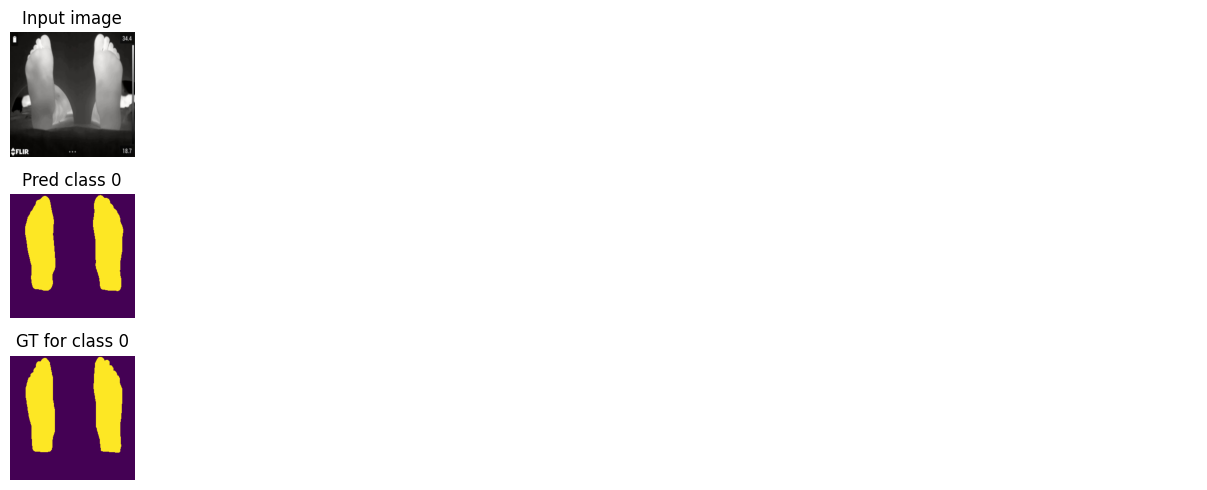

Train loss: 0.23595 | Time: 2m 37s | Val loss: 0.17012
Train_DICE_avg: 0.93079 | Train_Jaccard_avg: 0.87898 | Train_Sensitivity_avg: 0.88978 | Train_Specificity_avg: 0.99457 
Class 0 - Train_DICE: 0.93079 | Train_Jaccard: 0.87898 | Train_Sensitivity: 0.88978 | Train_Specificity: 0.99457 
Val_DICE_avg: 0.96086 | Val_Jaccard_avg: 0.92594 | Val_Sensitivity_avg: 0.93946 | Val_Specificity_avg: 0.99195 
Class 0 - Val_DICE: 0.96086 | Val_Jaccard: 0.92594 | Val_Sensitivity: 0.93946 | Val_Specificity: 0.99195 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.23717 | Time: 2m 41s | Val loss: 0.16872
Train_DICE_avg: 0.93205 | Train_Jaccard_avg: 0.88103 | Train_Sensitivity_avg: 0.89192 | Train_Specificity_avg: 0.99502 
Class 0 - Train_DICE: 0.93205 | Train_Jaccard: 0.88103 | Train_Sensitivity: 0.89192 | Train_Specificity: 0.99502 
Val_DICE_avg: 0.96385 | Val_Jaccard_avg: 0.93116 | Val_Sensitivity_avg: 0.95149 | Val_Specificity_avg: 0.98988 
Class 0 - Val_DICE: 0.96385 | Val_Jaccard: 0.93116 | Val_Sensitivity: 0.95149 | Val_Specificity: 0.98988 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.23508 | Time: 2m 44s | Val loss: 0.17206
Train_DICE_avg: 0.93563 | Train_Jaccard_avg: 0.88566 | Train_Sensitivity_avg: 0.89557 | Train_Specificity_avg: 0.99526 
Class 0 - Train_DICE: 0.93563 | Train_Jaccard: 0.88566 | Train_Sensitivity: 0.89557 | Train_Specificity: 0.99526 
Val_DICE_avg: 0.95938 | Val_Jaccard_avg: 0.92288 | Val_Sensitivity_avg: 0.93405 | Val_Specificity_avg: 0.99351 
Class 0 - Val_DICE: 0.95938 | Val_Jaccard: 0.92288 | Val_Sensitivity: 0.93405 | Val_Specificity: 0.99351 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.23533 | Time: 2m 48s | Val loss: 0.16972
Train_DICE_avg: 0.92950 | Train_Jaccard_avg: 0.87557 | Train_Sensitivity_avg: 0.88701 | Train_Specificity_avg: 0.99435 
Class 0 - Train_DICE: 0.92950 | Train_Jaccard: 0.87557 | Train_Sensitivity: 0.88701 | Train_Specificity: 0.99435 
Val_DICE_avg: 0.96388 | Val_Jaccard_avg: 0.93129 | Val_Sensitivity_avg: 0.94813 | Val_Specificity_avg: 0.99147 
Class 0 - Val_DICE: 0.96388 | Val_Jaccard: 0.93129 | Val_Sensitivity: 0.94813 | Val_Specificity: 0.99147 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.23436 | Time: 2m 52s | Val loss: 0.16242
Train_DICE_avg: 0.93193 | Train_Jaccard_avg: 0.88038 | Train_Sensitivity_avg: 0.89093 | Train_Specificity_avg: 0.99486 
Class 0 - Train_DICE: 0.93193 | Train_Jaccard: 0.88038 | Train_Sensitivity: 0.89093 | Train_Specificity: 0.99486 
Val_DICE_avg: 0.96361 | Val_Jaccard_avg: 0.93091 | Val_Sensitivity_avg: 0.94677 | Val_Specificity_avg: 0.99198 
Class 0 - Val_DICE: 0.96361 | Val_Jaccard: 0.93091 | Val_Sensitivity: 0.94677 | Val_Specificity: 0.99198 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


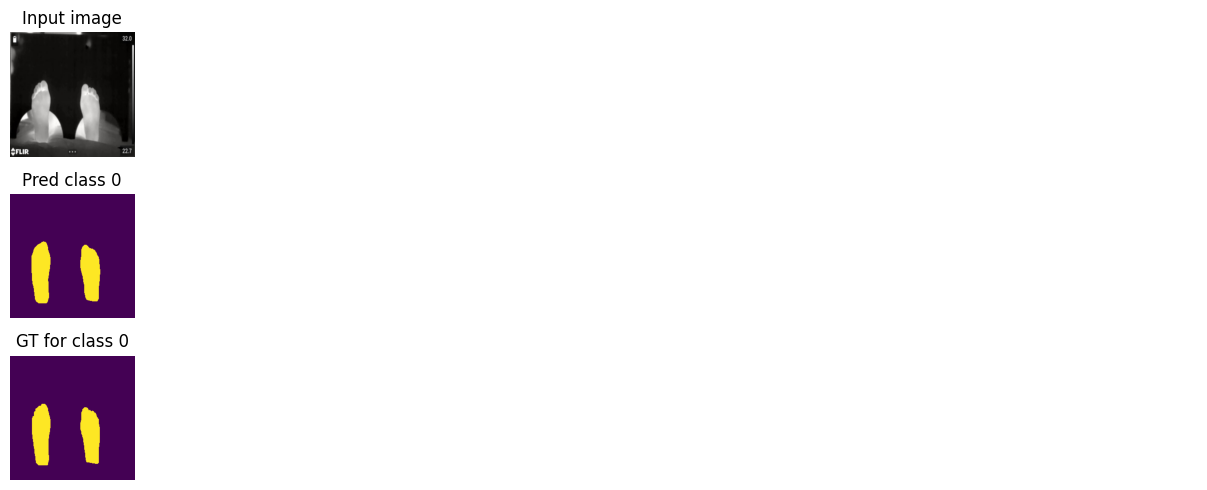

Train loss: 0.23103 | Time: 2m 56s | Val loss: 0.15798
Train_DICE_avg: 0.93484 | Train_Jaccard_avg: 0.88519 | Train_Sensitivity_avg: 0.89504 | Train_Specificity_avg: 0.99523 
Class 0 - Train_DICE: 0.93484 | Train_Jaccard: 0.88519 | Train_Sensitivity: 0.89504 | Train_Specificity: 0.99523 
Val_DICE_avg: 0.96448 | Val_Jaccard_avg: 0.93227 | Val_Sensitivity_avg: 0.94623 | Val_Specificity_avg: 0.99277 
Class 0 - Val_DICE: 0.96448 | Val_Jaccard: 0.93227 | Val_Sensitivity: 0.94623 | Val_Specificity: 0.99277 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.22972 | Time: 3m 0s | Val loss: 0.15650
Train_DICE_avg: 0.93553 | Train_Jaccard_avg: 0.88598 | Train_Sensitivity_avg: 0.89580 | Train_Specificity_avg: 0.99554 
Class 0 - Train_DICE: 0.93553 | Train_Jaccard: 0.88598 | Train_Sensitivity: 0.89580 | Train_Specificity: 0.99554 
Val_DICE_avg: 0.96564 | Val_Jaccard_avg: 0.93433 | Val_Sensitivity_avg: 0.94914 | Val_Specificity_avg: 0.99189 
Class 0 - Val_DICE: 0.96564 | Val_Jaccard: 0.93433 | Val_Sensitivity: 0.94914 | Val_Specificity: 0.99189 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.22902 | Time: 3m 3s | Val loss: 0.16331
Train_DICE_avg: 0.93823 | Train_Jaccard_avg: 0.88992 | Train_Sensitivity_avg: 0.89972 | Train_Specificity_avg: 0.99509 
Class 0 - Train_DICE: 0.93823 | Train_Jaccard: 0.88992 | Train_Sensitivity: 0.89972 | Train_Specificity: 0.99509 
Val_DICE_avg: 0.96550 | Val_Jaccard_avg: 0.93414 | Val_Sensitivity_avg: 0.95088 | Val_Specificity_avg: 0.99069 
Class 0 - Val_DICE: 0.96550 | Val_Jaccard: 0.93414 | Val_Sensitivity: 0.95088 | Val_Specificity: 0.99069 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.22907 | Time: 3m 7s | Val loss: 0.16216
Train_DICE_avg: 0.93844 | Train_Jaccard_avg: 0.89061 | Train_Sensitivity_avg: 0.90145 | Train_Specificity_avg: 0.99499 
Class 0 - Train_DICE: 0.93844 | Train_Jaccard: 0.89061 | Train_Sensitivity: 0.90145 | Train_Specificity: 0.99499 
Val_DICE_avg: 0.96457 | Val_Jaccard_avg: 0.93257 | Val_Sensitivity_avg: 0.94966 | Val_Specificity_avg: 0.99010 
Class 0 - Val_DICE: 0.96457 | Val_Jaccard: 0.93257 | Val_Sensitivity: 0.94966 | Val_Specificity: 0.99010 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.22622 | Time: 3m 11s | Val loss: 0.16416
Train_DICE_avg: 0.93756 | Train_Jaccard_avg: 0.88885 | Train_Sensitivity_avg: 0.89728 | Train_Specificity_avg: 0.99591 
Class 0 - Train_DICE: 0.93756 | Train_Jaccard: 0.88885 | Train_Sensitivity: 0.89728 | Train_Specificity: 0.99591 
Val_DICE_avg: 0.96482 | Val_Jaccard_avg: 0.93300 | Val_Sensitivity_avg: 0.94856 | Val_Specificity_avg: 0.99124 
Class 0 - Val_DICE: 0.96482 | Val_Jaccard: 0.93300 | Val_Sensitivity: 0.94856 | Val_Specificity: 0.99124 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


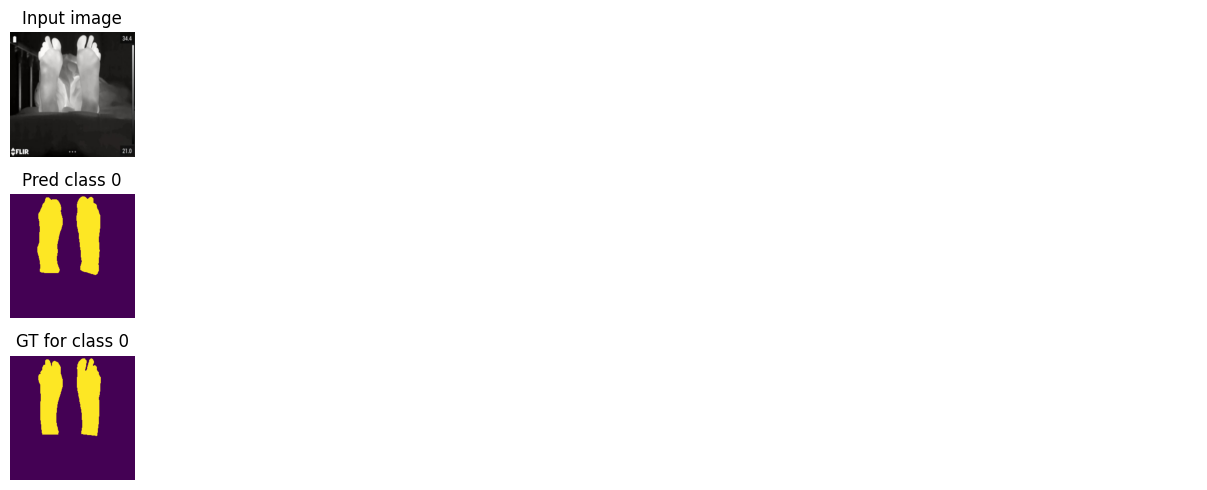

Train loss: 0.22610 | Time: 3m 15s | Val loss: 0.16518
Train_DICE_avg: 0.93595 | Train_Jaccard_avg: 0.88878 | Train_Sensitivity_avg: 0.89908 | Train_Specificity_avg: 0.99489 
Class 0 - Train_DICE: 0.93595 | Train_Jaccard: 0.88878 | Train_Sensitivity: 0.89908 | Train_Specificity: 0.99489 
Val_DICE_avg: 0.96410 | Val_Jaccard_avg: 0.93182 | Val_Sensitivity_avg: 0.94834 | Val_Specificity_avg: 0.99045 
Class 0 - Val_DICE: 0.96410 | Val_Jaccard: 0.93182 | Val_Sensitivity: 0.94834 | Val_Specificity: 0.99045 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.22726 | Time: 3m 18s | Val loss: 0.16301
Train_DICE_avg: 0.94131 | Train_Jaccard_avg: 0.89429 | Train_Sensitivity_avg: 0.90372 | Train_Specificity_avg: 0.99558 
Class 0 - Train_DICE: 0.94131 | Train_Jaccard: 0.89429 | Train_Sensitivity: 0.90372 | Train_Specificity: 0.99558 
Val_DICE_avg: 0.96389 | Val_Jaccard_avg: 0.93165 | Val_Sensitivity_avg: 0.95069 | Val_Specificity_avg: 0.98888 
Class 0 - Val_DICE: 0.96389 | Val_Jaccard: 0.93165 | Val_Sensitivity: 0.95069 | Val_Specificity: 0.98888 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.22437 | Time: 3m 22s | Val loss: 0.16655
Train_DICE_avg: 0.94176 | Train_Jaccard_avg: 0.89521 | Train_Sensitivity_avg: 0.90370 | Train_Specificity_avg: 0.99579 
Class 0 - Train_DICE: 0.94176 | Train_Jaccard: 0.89521 | Train_Sensitivity: 0.90370 | Train_Specificity: 0.99579 
Val_DICE_avg: 0.96327 | Val_Jaccard_avg: 0.93052 | Val_Sensitivity_avg: 0.94867 | Val_Specificity_avg: 0.98924 
Class 0 - Val_DICE: 0.96327 | Val_Jaccard: 0.93052 | Val_Sensitivity: 0.94867 | Val_Specificity: 0.98924 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.22426 | Time: 3m 26s | Val loss: 0.16305
Train_DICE_avg: 0.94393 | Train_Jaccard_avg: 0.89809 | Train_Sensitivity_avg: 0.90817 | Train_Specificity_avg: 0.99565 
Class 0 - Train_DICE: 0.94393 | Train_Jaccard: 0.89809 | Train_Sensitivity: 0.90817 | Train_Specificity: 0.99565 
Val_DICE_avg: 0.96419 | Val_Jaccard_avg: 0.93211 | Val_Sensitivity_avg: 0.95009 | Val_Specificity_avg: 0.98946 
Class 0 - Val_DICE: 0.96419 | Val_Jaccard: 0.93211 | Val_Sensitivity: 0.95009 | Val_Specificity: 0.98946 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.22193 | Time: 3m 29s | Val loss: 0.15857
Train_DICE_avg: 0.94242 | Train_Jaccard_avg: 0.89689 | Train_Sensitivity_avg: 0.90575 | Train_Specificity_avg: 0.99591 
Class 0 - Train_DICE: 0.94242 | Train_Jaccard: 0.89689 | Train_Sensitivity: 0.90575 | Train_Specificity: 0.99591 
Val_DICE_avg: 0.96500 | Val_Jaccard_avg: 0.93355 | Val_Sensitivity_avg: 0.95202 | Val_Specificity_avg: 0.98940 
Class 0 - Val_DICE: 0.96500 | Val_Jaccard: 0.93355 | Val_Sensitivity: 0.95202 | Val_Specificity: 0.98940 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


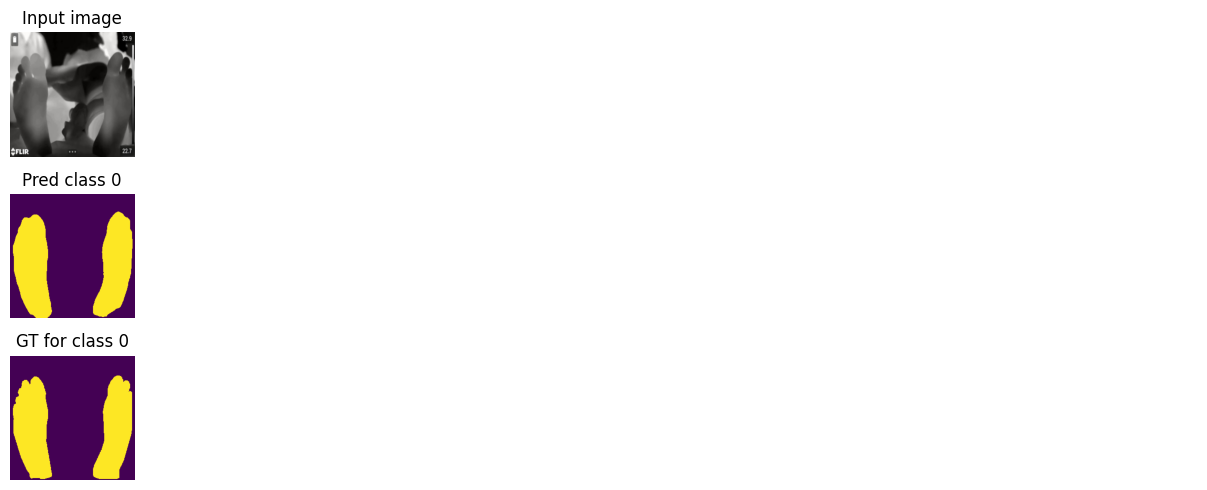

Train loss: 0.22052 | Time: 3m 33s | Val loss: 0.16028
Train_DICE_avg: 0.94394 | Train_Jaccard_avg: 0.89857 | Train_Sensitivity_avg: 0.90826 | Train_Specificity_avg: 0.99527 
Class 0 - Train_DICE: 0.94394 | Train_Jaccard: 0.89857 | Train_Sensitivity: 0.90826 | Train_Specificity: 0.99527 
Val_DICE_avg: 0.96503 | Val_Jaccard_avg: 0.93337 | Val_Sensitivity_avg: 0.94808 | Val_Specificity_avg: 0.99159 
Class 0 - Val_DICE: 0.96503 | Val_Jaccard: 0.93337 | Val_Sensitivity: 0.94808 | Val_Specificity: 0.99159 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.22343 | Time: 3m 37s | Val loss: 0.15713
Train_DICE_avg: 0.93758 | Train_Jaccard_avg: 0.88965 | Train_Sensitivity_avg: 0.90037 | Train_Specificity_avg: 0.99517 
Class 0 - Train_DICE: 0.93758 | Train_Jaccard: 0.88965 | Train_Sensitivity: 0.90037 | Train_Specificity: 0.99517 
Val_DICE_avg: 0.96565 | Val_Jaccard_avg: 0.93458 | Val_Sensitivity_avg: 0.94942 | Val_Specificity_avg: 0.99137 
Class 0 - Val_DICE: 0.96565 | Val_Jaccard: 0.93458 | Val_Sensitivity: 0.94942 | Val_Specificity: 0.99137 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.22389 | Time: 3m 41s | Val loss: 0.15418
Train_DICE_avg: 0.94068 | Train_Jaccard_avg: 0.89356 | Train_Sensitivity_avg: 0.90314 | Train_Specificity_avg: 0.99588 
Class 0 - Train_DICE: 0.94068 | Train_Jaccard: 0.89356 | Train_Sensitivity: 0.90314 | Train_Specificity: 0.99588 
Val_DICE_avg: 0.96599 | Val_Jaccard_avg: 0.93550 | Val_Sensitivity_avg: 0.95502 | Val_Specificity_avg: 0.98898 
Class 0 - Val_DICE: 0.96599 | Val_Jaccard: 0.93550 | Val_Sensitivity: 0.95502 | Val_Specificity: 0.98898 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.22020 | Time: 3m 45s | Val loss: 0.15439
Train_DICE_avg: 0.94334 | Train_Jaccard_avg: 0.89866 | Train_Sensitivity_avg: 0.90770 | Train_Specificity_avg: 0.99565 
Class 0 - Train_DICE: 0.94334 | Train_Jaccard: 0.89866 | Train_Sensitivity: 0.90770 | Train_Specificity: 0.99565 
Val_DICE_avg: 0.96639 | Val_Jaccard_avg: 0.93602 | Val_Sensitivity_avg: 0.95469 | Val_Specificity_avg: 0.98991 
Class 0 - Val_DICE: 0.96639 | Val_Jaccard: 0.93602 | Val_Sensitivity: 0.95469 | Val_Specificity: 0.98991 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.22140 | Time: 3m 48s | Val loss: 0.15667
Train_DICE_avg: 0.94256 | Train_Jaccard_avg: 0.89677 | Train_Sensitivity_avg: 0.90586 | Train_Specificity_avg: 0.99575 
Class 0 - Train_DICE: 0.94256 | Train_Jaccard: 0.89677 | Train_Sensitivity: 0.90586 | Train_Specificity: 0.99575 
Val_DICE_avg: 0.96560 | Val_Jaccard_avg: 0.93444 | Val_Sensitivity_avg: 0.94930 | Val_Specificity_avg: 0.99159 
Class 0 - Val_DICE: 0.96560 | Val_Jaccard: 0.93444 | Val_Sensitivity: 0.94930 | Val_Specificity: 0.99159 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


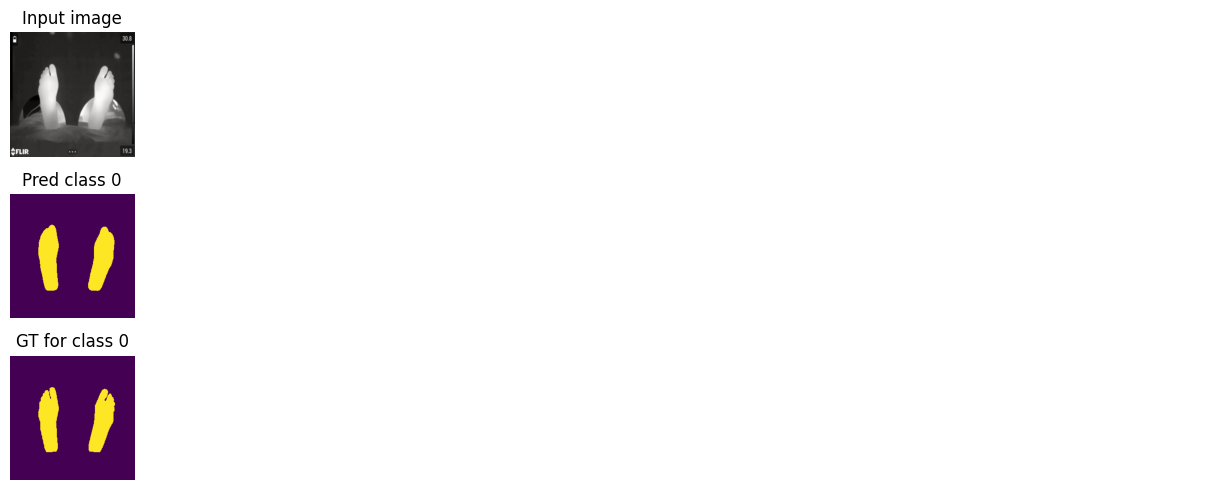

Train loss: 0.21871 | Time: 3m 52s | Val loss: 0.15845
Train_DICE_avg: 0.94513 | Train_Jaccard_avg: 0.90069 | Train_Sensitivity_avg: 0.90894 | Train_Specificity_avg: 0.99577 
Class 0 - Train_DICE: 0.94513 | Train_Jaccard: 0.90069 | Train_Sensitivity: 0.90894 | Train_Specificity: 0.99577 
Val_DICE_avg: 0.96594 | Val_Jaccard_avg: 0.93512 | Val_Sensitivity_avg: 0.95065 | Val_Specificity_avg: 0.99146 
Class 0 - Val_DICE: 0.96594 | Val_Jaccard: 0.93512 | Val_Sensitivity: 0.95065 | Val_Specificity: 0.99146 


Training DICE,▁▂▃▃▄▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇███████████████
Training Jaccard,▁▂▂▃▄▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████████
Training Loss,█▆▆▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▂▃▃▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████
Training Specificity,▁▃▄▅▅▆▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
Validation DICE,▁▅▆▇▇▇▇▇▇▇████▇█████████████████████████
Validation Jaccard,▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████████
Validation Loss,█▇▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▅▂▁▂▃▅▇▆▅▅▇▇▅▇▇▇▇█▇▇█▇██████████████████
Validation Specificity,▁▄▇▇▇▆▇▇████████████████████████████████
Training DICE,0.94513



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 199MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


Global Performance Metrics:
Loss mean: 0.17614, std: 0.00000
Dice Coefficient mean: 0.94780, std: 0.05730
Jaccard Index mean: 0.90585, std: 0.09323
Sensitivity mean: 0.95584, std: 0.08848
Specificity mean: 0.98388, std: 0.01281

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94780, std: 0.05730
Jaccard mean: 0.90585, std: 0.09323
Sensitivity mean: 0.95584, std: 0.08848
Specificity mean: 0.98388, std: 0.01281


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-UNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.54 GB
GPU Memory - Reserved: 0.98 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


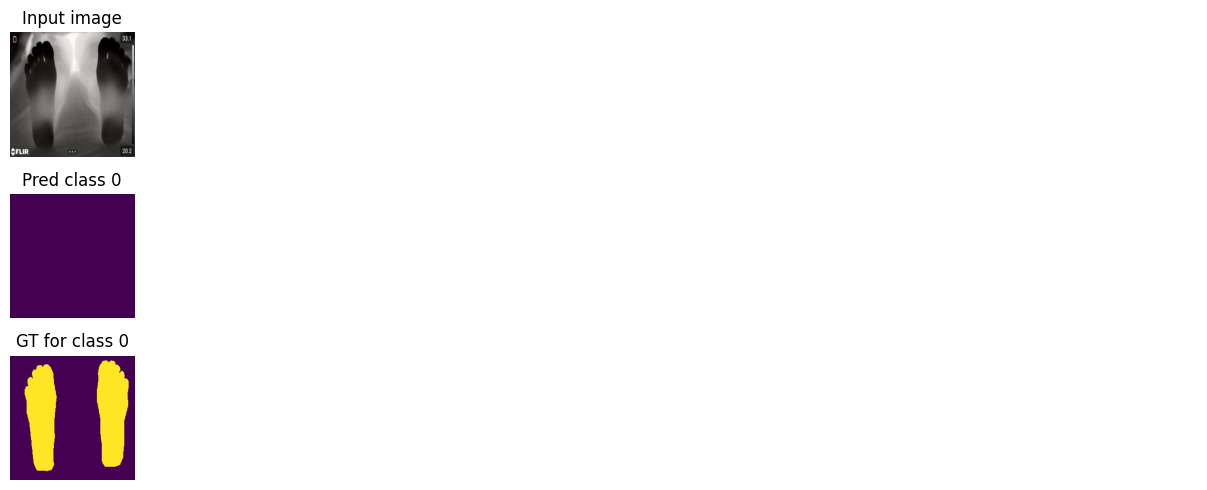

Train loss: 0.63190 | Time: 0m 4s | Val loss: 0.67170
Train_DICE_avg: 0.24573 | Train_Jaccard_avg: 0.15738 | Train_Sensitivity_avg: 0.41201 | Train_Specificity_avg: 0.78470 
Class 0 - Train_DICE: 0.24573 | Train_Jaccard: 0.15738 | Train_Sensitivity: 0.41201 | Train_Specificity: 0.78470 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.54275 | Time: 0m 7s | Val loss: 0.62598
Train_DICE_avg: 0.51496 | Train_Jaccard_avg: 0.38090 | Train_Sensitivity_avg: 0.60618 | Train_Specificity_avg: 0.85440 
Class 0 - Train_DICE: 0.51496 | Train_Jaccard: 0.38090 | Train_Sensitivity: 0.60618 | Train_Specificity: 0.85440 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.48409 | Time: 0m 11s | Val loss: 0.52648
Train_DICE_avg: 0.60528 | Train_Jaccard_avg: 0.45853 | Train_Sensitivity_avg: 0.67834 | Train_Specificity_avg: 0.87794 
Class 0 - Train_DICE: 0.60528 | Train_Jaccard: 0.45853 | Train_Sensitivity: 0.67834 | Train_Specificity: 0.87794 
Val_DICE_avg: 0.36595 | Val_Jaccard_avg: 0.24922 | Val_Sensitivity_avg: 0.98409 | Val_Specificity_avg: 0.79636 
Class 0 - Val_DICE: 0.36595 | Val_Jaccard: 0.24922 | Val_Sensitivity: 0.98409 | Val_Specificity: 0.79636 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.43103 | Time: 0m 14s | Val loss: 0.44641
Train_DICE_avg: 0.64782 | Train_Jaccard_avg: 0.50426 | Train_Sensitivity_avg: 0.76482 | Train_Specificity_avg: 0.88561 
Class 0 - Train_DICE: 0.64782 | Train_Jaccard: 0.50426 | Train_Sensitivity: 0.76482 | Train_Specificity: 0.88561 
Val_DICE_avg: 0.75965 | Val_Jaccard_avg: 0.62816 | Val_Sensitivity_avg: 0.84488 | Val_Specificity_avg: 0.90718 
Class 0 - Val_DICE: 0.75965 | Val_Jaccard: 0.62816 | Val_Sensitivity: 0.84488 | Val_Specificity: 0.90718 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.38647 | Time: 0m 18s | Val loss: 0.40363
Train_DICE_avg: 0.69428 | Train_Jaccard_avg: 0.55774 | Train_Sensitivity_avg: 0.82241 | Train_Specificity_avg: 0.89224 
Class 0 - Train_DICE: 0.69428 | Train_Jaccard: 0.55774 | Train_Sensitivity: 0.82241 | Train_Specificity: 0.89224 
Val_DICE_avg: 0.78716 | Val_Jaccard_avg: 0.66257 | Val_Sensitivity_avg: 0.79408 | Val_Specificity_avg: 0.93113 
Class 0 - Val_DICE: 0.78716 | Val_Jaccard: 0.66257 | Val_Sensitivity: 0.79408 | Val_Specificity: 0.93113 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


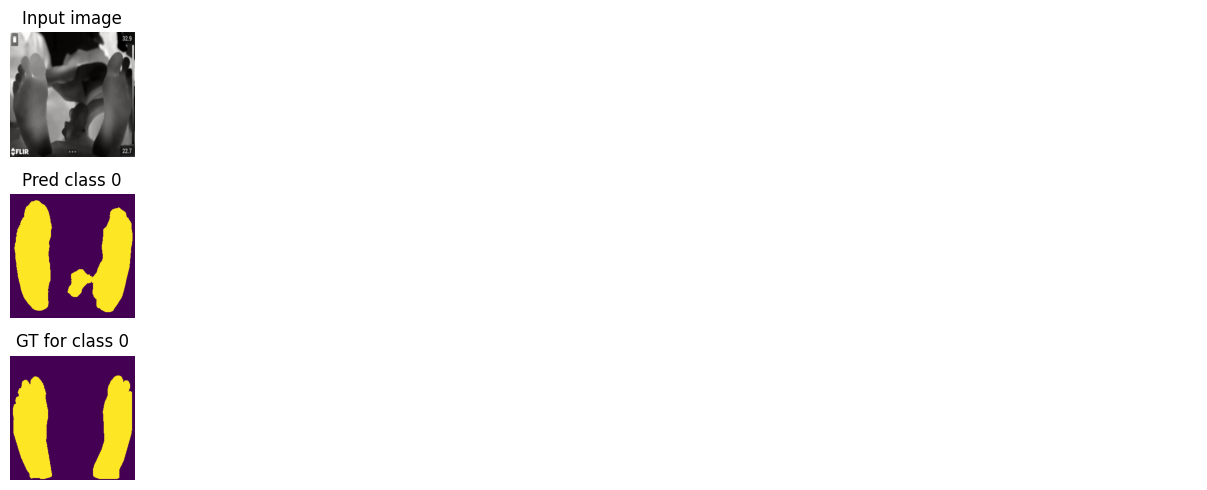

Train loss: 0.35219 | Time: 0m 22s | Val loss: 0.36197
Train_DICE_avg: 0.73306 | Train_Jaccard_avg: 0.59660 | Train_Sensitivity_avg: 0.85539 | Train_Specificity_avg: 0.89597 
Class 0 - Train_DICE: 0.73306 | Train_Jaccard: 0.59660 | Train_Sensitivity: 0.85539 | Train_Specificity: 0.89597 
Val_DICE_avg: 0.79777 | Val_Jaccard_avg: 0.67774 | Val_Sensitivity_avg: 0.80874 | Val_Specificity_avg: 0.93098 
Class 0 - Val_DICE: 0.79777 | Val_Jaccard: 0.67774 | Val_Sensitivity: 0.80874 | Val_Specificity: 0.93098 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.32960 | Time: 0m 26s | Val loss: 0.28603
Train_DICE_avg: 0.75315 | Train_Jaccard_avg: 0.62127 | Train_Sensitivity_avg: 0.87485 | Train_Specificity_avg: 0.90153 
Class 0 - Train_DICE: 0.75315 | Train_Jaccard: 0.62127 | Train_Sensitivity: 0.87485 | Train_Specificity: 0.90153 
Val_DICE_avg: 0.77051 | Val_Jaccard_avg: 0.64106 | Val_Sensitivity_avg: 0.94146 | Val_Specificity_avg: 0.88928 
Class 0 - Val_DICE: 0.77051 | Val_Jaccard: 0.64106 | Val_Sensitivity: 0.94146 | Val_Specificity: 0.88928 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.31098 | Time: 0m 30s | Val loss: 0.26246
Train_DICE_avg: 0.77522 | Train_Jaccard_avg: 0.64886 | Train_Sensitivity_avg: 0.88450 | Train_Specificity_avg: 0.90747 
Class 0 - Train_DICE: 0.77522 | Train_Jaccard: 0.64886 | Train_Sensitivity: 0.88450 | Train_Specificity: 0.90747 
Val_DICE_avg: 0.83631 | Val_Jaccard_avg: 0.72782 | Val_Sensitivity_avg: 0.92100 | Val_Specificity_avg: 0.92049 
Class 0 - Val_DICE: 0.83631 | Val_Jaccard: 0.72782 | Val_Sensitivity: 0.92100 | Val_Specificity: 0.92049 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.29419 | Time: 0m 33s | Val loss: 0.24608
Train_DICE_avg: 0.80131 | Train_Jaccard_avg: 0.68278 | Train_Sensitivity_avg: 0.89780 | Train_Specificity_avg: 0.91537 
Class 0 - Train_DICE: 0.80131 | Train_Jaccard: 0.68278 | Train_Sensitivity: 0.89780 | Train_Specificity: 0.91537 
Val_DICE_avg: 0.84413 | Val_Jaccard_avg: 0.74005 | Val_Sensitivity_avg: 0.94346 | Val_Specificity_avg: 0.92080 
Class 0 - Val_DICE: 0.84413 | Val_Jaccard: 0.74005 | Val_Sensitivity: 0.94346 | Val_Specificity: 0.92080 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.27659 | Time: 0m 37s | Val loss: 0.24232
Train_DICE_avg: 0.82351 | Train_Jaccard_avg: 0.71340 | Train_Sensitivity_avg: 0.91722 | Train_Specificity_avg: 0.92234 
Class 0 - Train_DICE: 0.82351 | Train_Jaccard: 0.71340 | Train_Sensitivity: 0.91722 | Train_Specificity: 0.92234 
Val_DICE_avg: 0.82993 | Val_Jaccard_avg: 0.72470 | Val_Sensitivity_avg: 0.96280 | Val_Specificity_avg: 0.91370 
Class 0 - Val_DICE: 0.82993 | Val_Jaccard: 0.72470 | Val_Sensitivity: 0.96280 | Val_Specificity: 0.91370 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


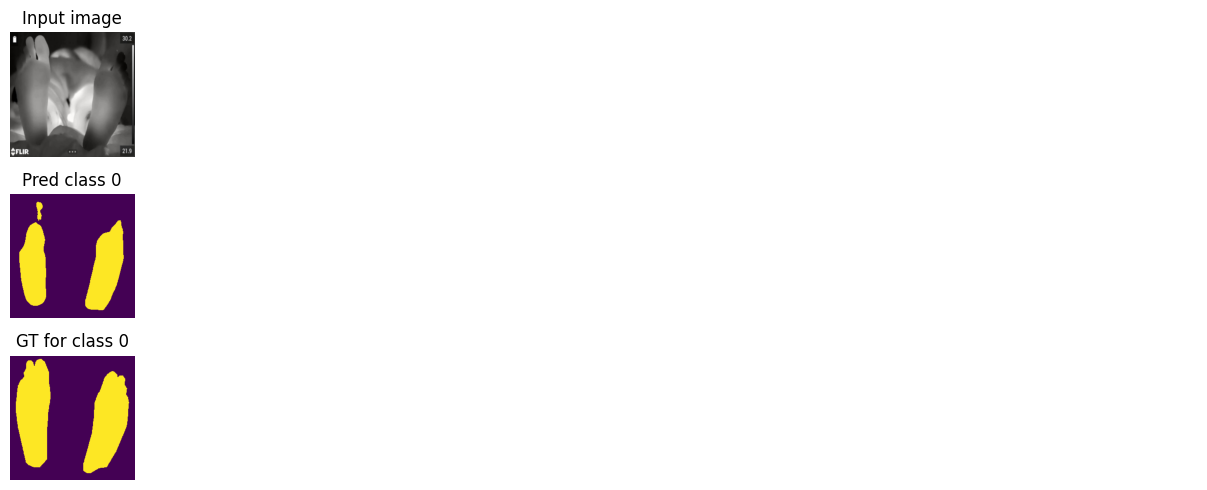

Train loss: 0.28406 | Time: 0m 41s | Val loss: 0.27564
Train_DICE_avg: 0.80166 | Train_Jaccard_avg: 0.68905 | Train_Sensitivity_avg: 0.90992 | Train_Specificity_avg: 0.91743 
Class 0 - Train_DICE: 0.80166 | Train_Jaccard: 0.68905 | Train_Sensitivity: 0.90992 | Train_Specificity: 0.91743 
Val_DICE_avg: 0.69922 | Val_Jaccard_avg: 0.57184 | Val_Sensitivity_avg: 0.98000 | Val_Specificity_avg: 0.86743 
Class 0 - Val_DICE: 0.69922 | Val_Jaccard: 0.57184 | Val_Sensitivity: 0.98000 | Val_Specificity: 0.86743 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.27051 | Time: 0m 45s | Val loss: 0.23920
Train_DICE_avg: 0.82237 | Train_Jaccard_avg: 0.71609 | Train_Sensitivity_avg: 0.90478 | Train_Specificity_avg: 0.92796 
Class 0 - Train_DICE: 0.82237 | Train_Jaccard: 0.71609 | Train_Sensitivity: 0.90478 | Train_Specificity: 0.92796 
Val_DICE_avg: 0.86245 | Val_Jaccard_avg: 0.77344 | Val_Sensitivity_avg: 0.93673 | Val_Specificity_avg: 0.93124 
Class 0 - Val_DICE: 0.86245 | Val_Jaccard: 0.77344 | Val_Sensitivity: 0.93673 | Val_Specificity: 0.93124 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.25704 | Time: 0m 48s | Val loss: 0.22584
Train_DICE_avg: 0.85020 | Train_Jaccard_avg: 0.75290 | Train_Sensitivity_avg: 0.91562 | Train_Specificity_avg: 0.93587 
Class 0 - Train_DICE: 0.85020 | Train_Jaccard: 0.75290 | Train_Sensitivity: 0.91562 | Train_Specificity: 0.93587 
Val_DICE_avg: 0.88967 | Val_Jaccard_avg: 0.80965 | Val_Sensitivity_avg: 0.94073 | Val_Specificity_avg: 0.94497 
Class 0 - Val_DICE: 0.88967 | Val_Jaccard: 0.80965 | Val_Sensitivity: 0.94073 | Val_Specificity: 0.94497 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.24343 | Time: 0m 52s | Val loss: 0.21681
Train_DICE_avg: 0.86253 | Train_Jaccard_avg: 0.77129 | Train_Sensitivity_avg: 0.92556 | Train_Specificity_avg: 0.94153 
Class 0 - Train_DICE: 0.86253 | Train_Jaccard: 0.77129 | Train_Sensitivity: 0.92556 | Train_Specificity: 0.94153 
Val_DICE_avg: 0.88278 | Val_Jaccard_avg: 0.79998 | Val_Sensitivity_avg: 0.96596 | Val_Specificity_avg: 0.93406 
Class 0 - Val_DICE: 0.88278 | Val_Jaccard: 0.79998 | Val_Sensitivity: 0.96596 | Val_Specificity: 0.93406 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.23403 | Time: 0m 56s | Val loss: 0.20929
Train_DICE_avg: 0.88332 | Train_Jaccard_avg: 0.79843 | Train_Sensitivity_avg: 0.92277 | Train_Specificity_avg: 0.94978 
Class 0 - Train_DICE: 0.88332 | Train_Jaccard: 0.79843 | Train_Sensitivity: 0.92277 | Train_Specificity: 0.94978 
Val_DICE_avg: 0.90582 | Val_Jaccard_avg: 0.83502 | Val_Sensitivity_avg: 0.95500 | Val_Specificity_avg: 0.94833 
Class 0 - Val_DICE: 0.90582 | Val_Jaccard: 0.83502 | Val_Sensitivity: 0.95500 | Val_Specificity: 0.94833 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


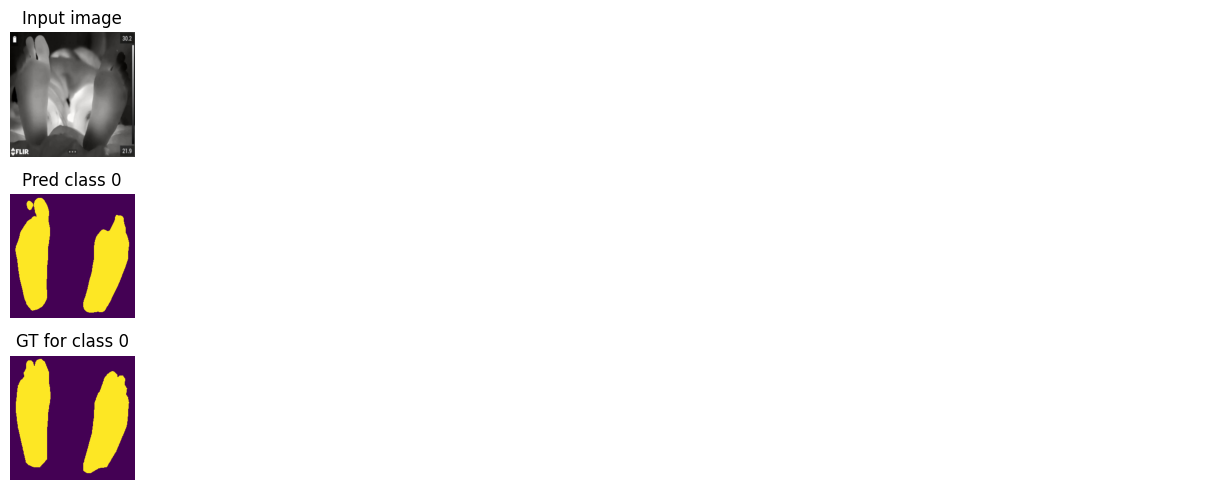

Train loss: 0.22523 | Time: 1m 0s | Val loss: 0.20340
Train_DICE_avg: 0.88932 | Train_Jaccard_avg: 0.80955 | Train_Sensitivity_avg: 0.93011 | Train_Specificity_avg: 0.95213 
Class 0 - Train_DICE: 0.88932 | Train_Jaccard: 0.80955 | Train_Sensitivity: 0.93011 | Train_Specificity: 0.95213 
Val_DICE_avg: 0.91414 | Val_Jaccard_avg: 0.84875 | Val_Sensitivity_avg: 0.95897 | Val_Specificity_avg: 0.95073 
Class 0 - Val_DICE: 0.91414 | Val_Jaccard: 0.84875 | Val_Sensitivity: 0.95897 | Val_Specificity: 0.95073 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.21735 | Time: 1m 4s | Val loss: 0.20366
Train_DICE_avg: 0.89607 | Train_Jaccard_avg: 0.81964 | Train_Sensitivity_avg: 0.93281 | Train_Specificity_avg: 0.95551 
Class 0 - Train_DICE: 0.89607 | Train_Jaccard: 0.81964 | Train_Sensitivity: 0.93281 | Train_Specificity: 0.95551 
Val_DICE_avg: 0.90997 | Val_Jaccard_avg: 0.84423 | Val_Sensitivity_avg: 0.96655 | Val_Specificity_avg: 0.94658 
Class 0 - Val_DICE: 0.90997 | Val_Jaccard: 0.84423 | Val_Sensitivity: 0.96655 | Val_Specificity: 0.94658 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.21554 | Time: 1m 7s | Val loss: 0.19810
Train_DICE_avg: 0.89510 | Train_Jaccard_avg: 0.81972 | Train_Sensitivity_avg: 0.92808 | Train_Specificity_avg: 0.95616 
Class 0 - Train_DICE: 0.89510 | Train_Jaccard: 0.81972 | Train_Sensitivity: 0.92808 | Train_Specificity: 0.95616 
Val_DICE_avg: 0.92290 | Val_Jaccard_avg: 0.86344 | Val_Sensitivity_avg: 0.95919 | Val_Specificity_avg: 0.95645 
Class 0 - Val_DICE: 0.92290 | Val_Jaccard: 0.86344 | Val_Sensitivity: 0.95919 | Val_Specificity: 0.95645 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.20870 | Time: 1m 11s | Val loss: 0.18865
Train_DICE_avg: 0.90487 | Train_Jaccard_avg: 0.83333 | Train_Sensitivity_avg: 0.93874 | Train_Specificity_avg: 0.95791 
Class 0 - Train_DICE: 0.90487 | Train_Jaccard: 0.83333 | Train_Sensitivity: 0.93874 | Train_Specificity: 0.95791 
Val_DICE_avg: 0.92386 | Val_Jaccard_avg: 0.86413 | Val_Sensitivity_avg: 0.96605 | Val_Specificity_avg: 0.95590 
Class 0 - Val_DICE: 0.92386 | Val_Jaccard: 0.86413 | Val_Sensitivity: 0.96605 | Val_Specificity: 0.95590 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.20270 | Time: 1m 15s | Val loss: 0.18912
Train_DICE_avg: 0.91197 | Train_Jaccard_avg: 0.84421 | Train_Sensitivity_avg: 0.93893 | Train_Specificity_avg: 0.96152 
Class 0 - Train_DICE: 0.91197 | Train_Jaccard: 0.84421 | Train_Sensitivity: 0.93893 | Train_Specificity: 0.96152 
Val_DICE_avg: 0.91951 | Val_Jaccard_avg: 0.86032 | Val_Sensitivity_avg: 0.97289 | Val_Specificity_avg: 0.95226 
Class 0 - Val_DICE: 0.91951 | Val_Jaccard: 0.86032 | Val_Sensitivity: 0.97289 | Val_Specificity: 0.95226 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


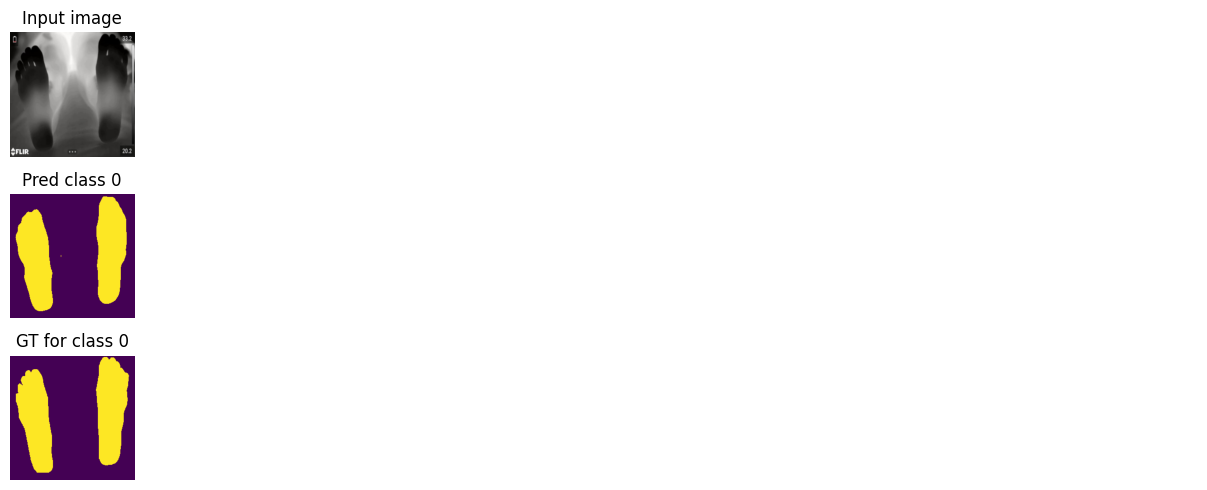

Train loss: 0.21097 | Time: 1m 19s | Val loss: 0.18381
Train_DICE_avg: 0.89593 | Train_Jaccard_avg: 0.82115 | Train_Sensitivity_avg: 0.93753 | Train_Specificity_avg: 0.95303 
Class 0 - Train_DICE: 0.89593 | Train_Jaccard: 0.82115 | Train_Sensitivity: 0.93753 | Train_Specificity: 0.95303 
Val_DICE_avg: 0.91922 | Val_Jaccard_avg: 0.85628 | Val_Sensitivity_avg: 0.96380 | Val_Specificity_avg: 0.95483 
Class 0 - Val_DICE: 0.91922 | Val_Jaccard: 0.85628 | Val_Sensitivity: 0.96380 | Val_Specificity: 0.95483 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.20130 | Time: 1m 23s | Val loss: 0.17756
Train_DICE_avg: 0.90673 | Train_Jaccard_avg: 0.83925 | Train_Sensitivity_avg: 0.93780 | Train_Specificity_avg: 0.96109 
Class 0 - Train_DICE: 0.90673 | Train_Jaccard: 0.83925 | Train_Sensitivity: 0.93780 | Train_Specificity: 0.96109 
Val_DICE_avg: 0.93398 | Val_Jaccard_avg: 0.87938 | Val_Sensitivity_avg: 0.94886 | Val_Specificity_avg: 0.96722 
Class 0 - Val_DICE: 0.93398 | Val_Jaccard: 0.87938 | Val_Sensitivity: 0.94886 | Val_Specificity: 0.96722 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.19120 | Time: 1m 26s | Val loss: 0.18652
Train_DICE_avg: 0.91754 | Train_Jaccard_avg: 0.85359 | Train_Sensitivity_avg: 0.95205 | Train_Specificity_avg: 0.96272 
Class 0 - Train_DICE: 0.91754 | Train_Jaccard: 0.85359 | Train_Sensitivity: 0.95205 | Train_Specificity: 0.96272 
Val_DICE_avg: 0.89532 | Val_Jaccard_avg: 0.82667 | Val_Sensitivity_avg: 0.98713 | Val_Specificity_avg: 0.94037 
Class 0 - Val_DICE: 0.89532 | Val_Jaccard: 0.82667 | Val_Sensitivity: 0.98713 | Val_Specificity: 0.94037 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.18759 | Time: 1m 30s | Val loss: 0.17456
Train_DICE_avg: 0.91931 | Train_Jaccard_avg: 0.85692 | Train_Sensitivity_avg: 0.94145 | Train_Specificity_avg: 0.96619 
Class 0 - Train_DICE: 0.91931 | Train_Jaccard: 0.85692 | Train_Sensitivity: 0.94145 | Train_Specificity: 0.96619 
Val_DICE_avg: 0.93254 | Val_Jaccard_avg: 0.88058 | Val_Sensitivity_avg: 0.96773 | Val_Specificity_avg: 0.96310 
Class 0 - Val_DICE: 0.93254 | Val_Jaccard: 0.88058 | Val_Sensitivity: 0.96773 | Val_Specificity: 0.96310 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.17944 | Time: 1m 34s | Val loss: 0.16652
Train_DICE_avg: 0.93050 | Train_Jaccard_avg: 0.87476 | Train_Sensitivity_avg: 0.94843 | Train_Specificity_avg: 0.97062 
Class 0 - Train_DICE: 0.93050 | Train_Jaccard: 0.87476 | Train_Sensitivity: 0.94843 | Train_Specificity: 0.97062 
Val_DICE_avg: 0.93452 | Val_Jaccard_avg: 0.88245 | Val_Sensitivity_avg: 0.96741 | Val_Specificity_avg: 0.96501 
Class 0 - Val_DICE: 0.93452 | Val_Jaccard: 0.88245 | Val_Sensitivity: 0.96741 | Val_Specificity: 0.96501 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


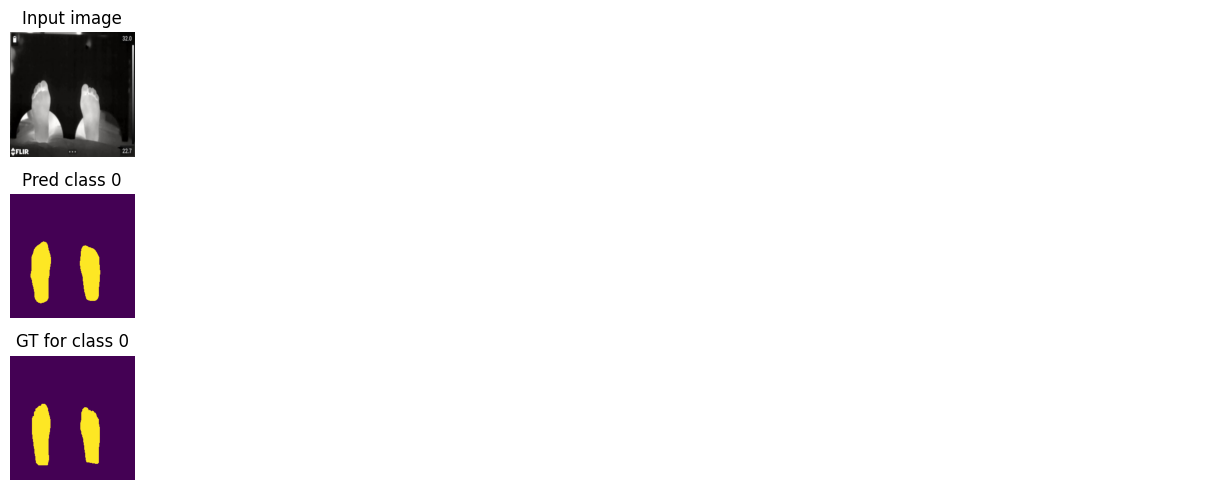

Train loss: 0.17905 | Time: 1m 38s | Val loss: 0.16725
Train_DICE_avg: 0.92451 | Train_Jaccard_avg: 0.86547 | Train_Sensitivity_avg: 0.95218 | Train_Specificity_avg: 0.96628 
Class 0 - Train_DICE: 0.92451 | Train_Jaccard: 0.86547 | Train_Sensitivity: 0.95218 | Train_Specificity: 0.96628 
Val_DICE_avg: 0.92971 | Val_Jaccard_avg: 0.87603 | Val_Sensitivity_avg: 0.97336 | Val_Specificity_avg: 0.95918 
Class 0 - Val_DICE: 0.92971 | Val_Jaccard: 0.87603 | Val_Sensitivity: 0.97336 | Val_Specificity: 0.95918 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.17156 | Time: 1m 42s | Val loss: 0.16742
Train_DICE_avg: 0.93663 | Train_Jaccard_avg: 0.88409 | Train_Sensitivity_avg: 0.95198 | Train_Specificity_avg: 0.97329 
Class 0 - Train_DICE: 0.93663 | Train_Jaccard: 0.88409 | Train_Sensitivity: 0.95198 | Train_Specificity: 0.97329 
Val_DICE_avg: 0.93951 | Val_Jaccard_avg: 0.89101 | Val_Sensitivity_avg: 0.97385 | Val_Specificity_avg: 0.96431 
Class 0 - Val_DICE: 0.93951 | Val_Jaccard: 0.89101 | Val_Sensitivity: 0.97385 | Val_Specificity: 0.96431 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.16604 | Time: 1m 45s | Val loss: 0.16609
Train_DICE_avg: 0.93970 | Train_Jaccard_avg: 0.88950 | Train_Sensitivity_avg: 0.95669 | Train_Specificity_avg: 0.97456 
Class 0 - Train_DICE: 0.93970 | Train_Jaccard: 0.88950 | Train_Sensitivity: 0.95669 | Train_Specificity: 0.97456 
Val_DICE_avg: 0.93625 | Val_Jaccard_avg: 0.88679 | Val_Sensitivity_avg: 0.97415 | Val_Specificity_avg: 0.96353 
Class 0 - Val_DICE: 0.93625 | Val_Jaccard: 0.88679 | Val_Sensitivity: 0.97415 | Val_Specificity: 0.96353 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.16418 | Time: 1m 49s | Val loss: 0.15910
Train_DICE_avg: 0.93927 | Train_Jaccard_avg: 0.88913 | Train_Sensitivity_avg: 0.95982 | Train_Specificity_avg: 0.97308 
Class 0 - Train_DICE: 0.93927 | Train_Jaccard: 0.88913 | Train_Sensitivity: 0.95982 | Train_Specificity: 0.97308 
Val_DICE_avg: 0.94625 | Val_Jaccard_avg: 0.90170 | Val_Sensitivity_avg: 0.96152 | Val_Specificity_avg: 0.97335 
Class 0 - Val_DICE: 0.94625 | Val_Jaccard: 0.90170 | Val_Sensitivity: 0.96152 | Val_Specificity: 0.97335 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.16038 | Time: 1m 53s | Val loss: 0.15160
Train_DICE_avg: 0.94373 | Train_Jaccard_avg: 0.89617 | Train_Sensitivity_avg: 0.95528 | Train_Specificity_avg: 0.97693 
Class 0 - Train_DICE: 0.94373 | Train_Jaccard: 0.89617 | Train_Sensitivity: 0.95528 | Train_Specificity: 0.97693 
Val_DICE_avg: 0.94952 | Val_Jaccard_avg: 0.90707 | Val_Sensitivity_avg: 0.97188 | Val_Specificity_avg: 0.97223 
Class 0 - Val_DICE: 0.94952 | Val_Jaccard: 0.90707 | Val_Sensitivity: 0.97188 | Val_Specificity: 0.97223 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


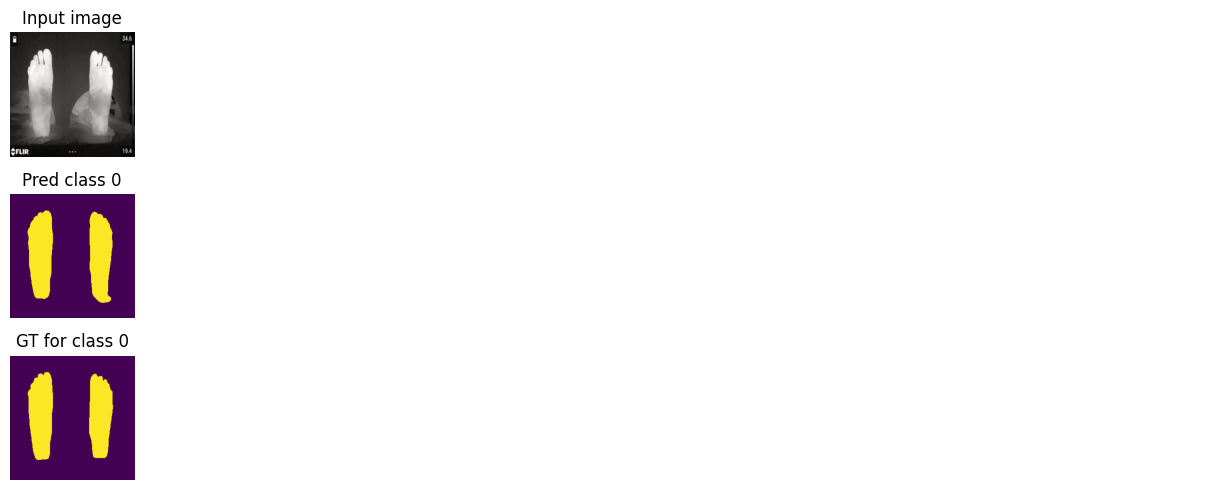

Train loss: 0.16556 | Time: 1m 57s | Val loss: 0.15052
Train_DICE_avg: 0.93038 | Train_Jaccard_avg: 0.87539 | Train_Sensitivity_avg: 0.95039 | Train_Specificity_avg: 0.97073 
Class 0 - Train_DICE: 0.93038 | Train_Jaccard: 0.87539 | Train_Sensitivity: 0.95039 | Train_Specificity: 0.97073 
Val_DICE_avg: 0.93221 | Val_Jaccard_avg: 0.87841 | Val_Sensitivity_avg: 0.97277 | Val_Specificity_avg: 0.96077 
Class 0 - Val_DICE: 0.93221 | Val_Jaccard: 0.87841 | Val_Sensitivity: 0.97277 | Val_Specificity: 0.96077 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.16053 | Time: 2m 0s | Val loss: 0.15092
Train_DICE_avg: 0.93583 | Train_Jaccard_avg: 0.88331 | Train_Sensitivity_avg: 0.95766 | Train_Specificity_avg: 0.97189 
Class 0 - Train_DICE: 0.93583 | Train_Jaccard: 0.88331 | Train_Sensitivity: 0.95766 | Train_Specificity: 0.97189 
Val_DICE_avg: 0.94794 | Val_Jaccard_avg: 0.90406 | Val_Sensitivity_avg: 0.94213 | Val_Specificity_avg: 0.98240 
Class 0 - Val_DICE: 0.94794 | Val_Jaccard: 0.90406 | Val_Sensitivity: 0.94213 | Val_Specificity: 0.98240 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.15446 | Time: 2m 4s | Val loss: 0.15230
Train_DICE_avg: 0.94483 | Train_Jaccard_avg: 0.89800 | Train_Sensitivity_avg: 0.95680 | Train_Specificity_avg: 0.97784 
Class 0 - Train_DICE: 0.94483 | Train_Jaccard: 0.89800 | Train_Sensitivity: 0.95680 | Train_Specificity: 0.97784 
Val_DICE_avg: 0.92950 | Val_Jaccard_avg: 0.87703 | Val_Sensitivity_avg: 0.98338 | Val_Specificity_avg: 0.95870 
Class 0 - Val_DICE: 0.92950 | Val_Jaccard: 0.87703 | Val_Sensitivity: 0.98338 | Val_Specificity: 0.95870 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.14988 | Time: 2m 8s | Val loss: 0.13979
Train_DICE_avg: 0.94391 | Train_Jaccard_avg: 0.89746 | Train_Sensitivity_avg: 0.96432 | Train_Specificity_avg: 0.97654 
Class 0 - Train_DICE: 0.94391 | Train_Jaccard: 0.89746 | Train_Sensitivity: 0.96432 | Train_Specificity: 0.97654 
Val_DICE_avg: 0.94908 | Val_Jaccard_avg: 0.90624 | Val_Sensitivity_avg: 0.97384 | Val_Specificity_avg: 0.97100 
Class 0 - Val_DICE: 0.94908 | Val_Jaccard: 0.90624 | Val_Sensitivity: 0.97384 | Val_Specificity: 0.97100 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.14359 | Time: 2m 11s | Val loss: 0.14138
Train_DICE_avg: 0.95315 | Train_Jaccard_avg: 0.91233 | Train_Sensitivity_avg: 0.96497 | Train_Specificity_avg: 0.98026 
Class 0 - Train_DICE: 0.95315 | Train_Jaccard: 0.91233 | Train_Sensitivity: 0.96497 | Train_Specificity: 0.98026 
Val_DICE_avg: 0.94644 | Val_Jaccard_avg: 0.90153 | Val_Sensitivity_avg: 0.98135 | Val_Specificity_avg: 0.96839 
Class 0 - Val_DICE: 0.94644 | Val_Jaccard: 0.90153 | Val_Sensitivity: 0.98135 | Val_Specificity: 0.96839 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


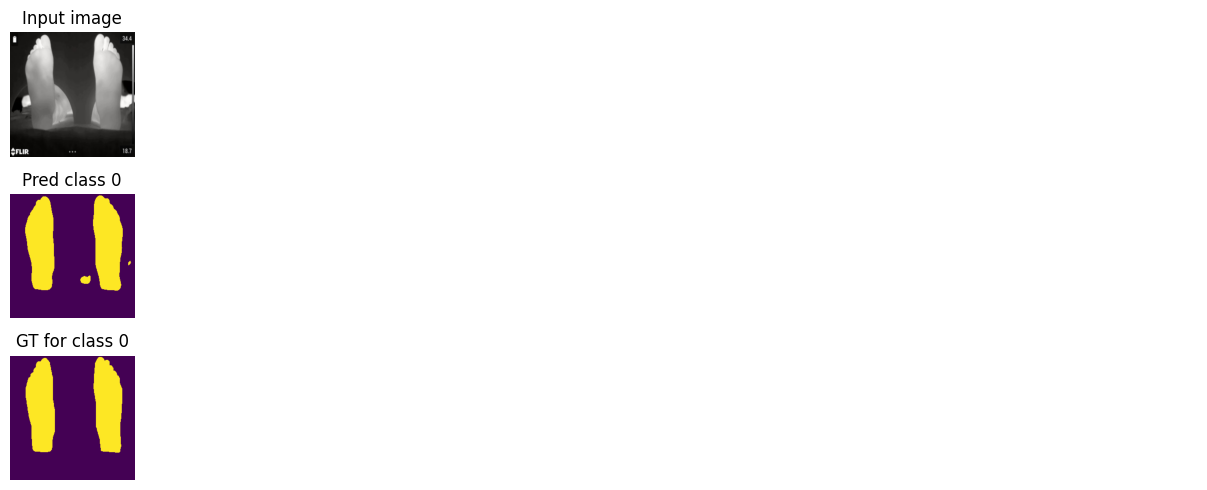

Train loss: 0.14229 | Time: 2m 15s | Val loss: 0.14188
Train_DICE_avg: 0.95223 | Train_Jaccard_avg: 0.91054 | Train_Sensitivity_avg: 0.96272 | Train_Specificity_avg: 0.98007 
Class 0 - Train_DICE: 0.95223 | Train_Jaccard: 0.91054 | Train_Sensitivity: 0.96272 | Train_Specificity: 0.98007 
Val_DICE_avg: 0.95404 | Val_Jaccard_avg: 0.91483 | Val_Sensitivity_avg: 0.97255 | Val_Specificity_avg: 0.97475 
Class 0 - Val_DICE: 0.95404 | Val_Jaccard: 0.91483 | Val_Sensitivity: 0.97255 | Val_Specificity: 0.97475 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.14096 | Time: 2m 19s | Val loss: 0.13745
Train_DICE_avg: 0.95151 | Train_Jaccard_avg: 0.90945 | Train_Sensitivity_avg: 0.96736 | Train_Specificity_avg: 0.97932 
Class 0 - Train_DICE: 0.95151 | Train_Jaccard: 0.90945 | Train_Sensitivity: 0.96736 | Train_Specificity: 0.97932 
Val_DICE_avg: 0.94928 | Val_Jaccard_avg: 0.90783 | Val_Sensitivity_avg: 0.97335 | Val_Specificity_avg: 0.97118 
Class 0 - Val_DICE: 0.94928 | Val_Jaccard: 0.90783 | Val_Sensitivity: 0.97335 | Val_Specificity: 0.97118 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.13762 | Time: 2m 23s | Val loss: 0.13455
Train_DICE_avg: 0.95546 | Train_Jaccard_avg: 0.91650 | Train_Sensitivity_avg: 0.96561 | Train_Specificity_avg: 0.98185 
Class 0 - Train_DICE: 0.95546 | Train_Jaccard: 0.91650 | Train_Sensitivity: 0.96561 | Train_Specificity: 0.98185 
Val_DICE_avg: 0.95294 | Val_Jaccard_avg: 0.91358 | Val_Sensitivity_avg: 0.97025 | Val_Specificity_avg: 0.97427 
Class 0 - Val_DICE: 0.95294 | Val_Jaccard: 0.91358 | Val_Sensitivity: 0.97025 | Val_Specificity: 0.97427 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.13543 | Time: 2m 26s | Val loss: 0.13304
Train_DICE_avg: 0.95699 | Train_Jaccard_avg: 0.91903 | Train_Sensitivity_avg: 0.97018 | Train_Specificity_avg: 0.98121 
Class 0 - Train_DICE: 0.95699 | Train_Jaccard: 0.91903 | Train_Sensitivity: 0.97018 | Train_Specificity: 0.98121 
Val_DICE_avg: 0.95310 | Val_Jaccard_avg: 0.91396 | Val_Sensitivity_avg: 0.97792 | Val_Specificity_avg: 0.97296 
Class 0 - Val_DICE: 0.95310 | Val_Jaccard: 0.91396 | Val_Sensitivity: 0.97792 | Val_Specificity: 0.97296 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.13331 | Time: 2m 30s | Val loss: 0.13411
Train_DICE_avg: 0.95845 | Train_Jaccard_avg: 0.92178 | Train_Sensitivity_avg: 0.97026 | Train_Specificity_avg: 0.98250 
Class 0 - Train_DICE: 0.95845 | Train_Jaccard: 0.92178 | Train_Sensitivity: 0.97026 | Train_Specificity: 0.98250 
Val_DICE_avg: 0.95207 | Val_Jaccard_avg: 0.91262 | Val_Sensitivity_avg: 0.97782 | Val_Specificity_avg: 0.97212 
Class 0 - Val_DICE: 0.95207 | Val_Jaccard: 0.91262 | Val_Sensitivity: 0.97782 | Val_Specificity: 0.97212 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


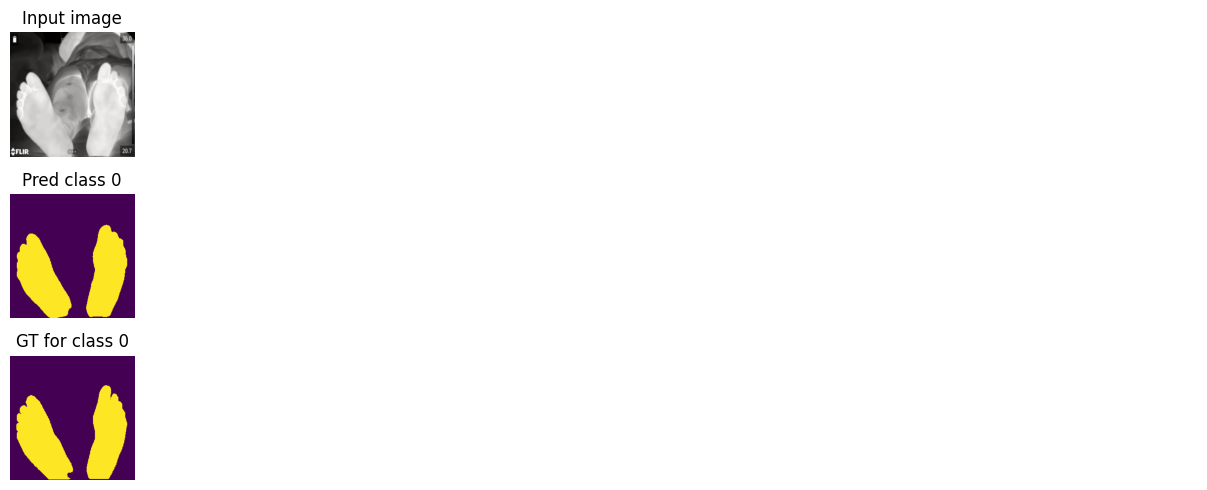

Train loss: 0.13196 | Time: 2m 34s | Val loss: 0.13100
Train_DICE_avg: 0.95805 | Train_Jaccard_avg: 0.92107 | Train_Sensitivity_avg: 0.96979 | Train_Specificity_avg: 0.98279 
Class 0 - Train_DICE: 0.95805 | Train_Jaccard: 0.92107 | Train_Sensitivity: 0.96979 | Train_Specificity: 0.98279 
Val_DICE_avg: 0.95687 | Val_Jaccard_avg: 0.92049 | Val_Sensitivity_avg: 0.96859 | Val_Specificity_avg: 0.97830 
Class 0 - Val_DICE: 0.95687 | Val_Jaccard: 0.92049 | Val_Sensitivity: 0.96859 | Val_Specificity: 0.97830 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.12921 | Time: 2m 38s | Val loss: 0.12960
Train_DICE_avg: 0.95997 | Train_Jaccard_avg: 0.92450 | Train_Sensitivity_avg: 0.97002 | Train_Specificity_avg: 0.98373 
Class 0 - Train_DICE: 0.95997 | Train_Jaccard: 0.92450 | Train_Sensitivity: 0.97002 | Train_Specificity: 0.98373 
Val_DICE_avg: 0.95692 | Val_Jaccard_avg: 0.92045 | Val_Sensitivity_avg: 0.96681 | Val_Specificity_avg: 0.97890 
Class 0 - Val_DICE: 0.95692 | Val_Jaccard: 0.92045 | Val_Sensitivity: 0.96681 | Val_Specificity: 0.97890 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.12750 | Time: 2m 42s | Val loss: 0.12828
Train_DICE_avg: 0.96031 | Train_Jaccard_avg: 0.92516 | Train_Sensitivity_avg: 0.97382 | Train_Specificity_avg: 0.98335 
Class 0 - Train_DICE: 0.96031 | Train_Jaccard: 0.92516 | Train_Sensitivity: 0.97382 | Train_Specificity: 0.98335 
Val_DICE_avg: 0.95479 | Val_Jaccard_avg: 0.91735 | Val_Sensitivity_avg: 0.97663 | Val_Specificity_avg: 0.97432 
Class 0 - Val_DICE: 0.95479 | Val_Jaccard: 0.91735 | Val_Sensitivity: 0.97663 | Val_Specificity: 0.97432 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.12572 | Time: 2m 46s | Val loss: 0.12901
Train_DICE_avg: 0.96221 | Train_Jaccard_avg: 0.92845 | Train_Sensitivity_avg: 0.97033 | Train_Specificity_avg: 0.98499 
Class 0 - Train_DICE: 0.96221 | Train_Jaccard: 0.92845 | Train_Sensitivity: 0.97033 | Train_Specificity: 0.98499 
Val_DICE_avg: 0.95364 | Val_Jaccard_avg: 0.91606 | Val_Sensitivity_avg: 0.97747 | Val_Specificity_avg: 0.97396 
Class 0 - Val_DICE: 0.95364 | Val_Jaccard: 0.91606 | Val_Sensitivity: 0.97747 | Val_Specificity: 0.97396 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.12474 | Time: 2m 49s | Val loss: 0.12516
Train_DICE_avg: 0.96291 | Train_Jaccard_avg: 0.92945 | Train_Sensitivity_avg: 0.97426 | Train_Specificity_avg: 0.98439 
Class 0 - Train_DICE: 0.96291 | Train_Jaccard: 0.92945 | Train_Sensitivity: 0.97426 | Train_Specificity: 0.98439 
Val_DICE_avg: 0.95587 | Val_Jaccard_avg: 0.91920 | Val_Sensitivity_avg: 0.97722 | Val_Specificity_avg: 0.97528 
Class 0 - Val_DICE: 0.95587 | Val_Jaccard: 0.91920 | Val_Sensitivity: 0.97722 | Val_Specificity: 0.97528 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


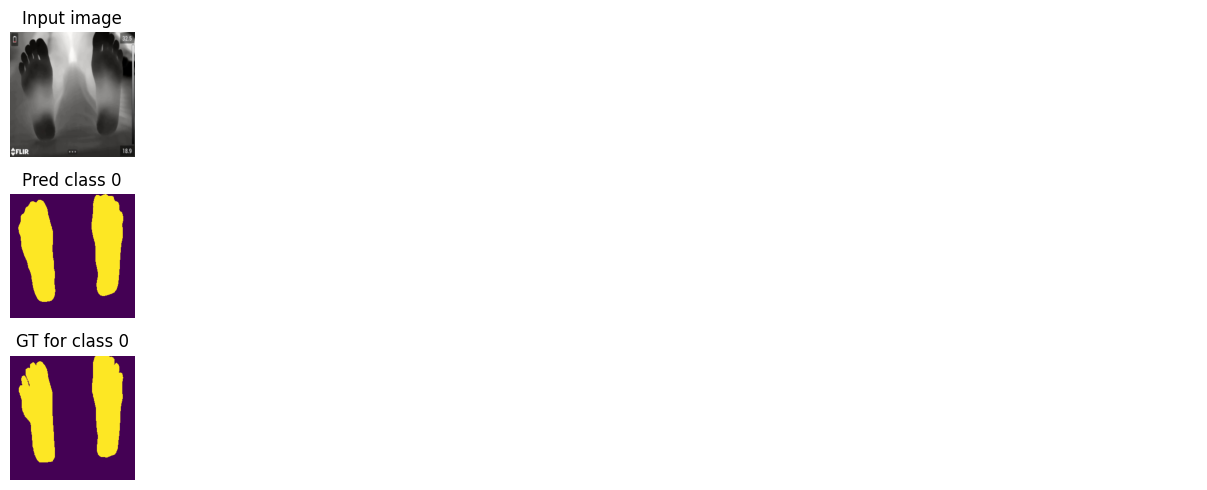

Train loss: 0.12465 | Time: 2m 53s | Val loss: 0.12287
Train_DICE_avg: 0.96219 | Train_Jaccard_avg: 0.92837 | Train_Sensitivity_avg: 0.97329 | Train_Specificity_avg: 0.98419 
Class 0 - Train_DICE: 0.96219 | Train_Jaccard: 0.92837 | Train_Sensitivity: 0.97329 | Train_Specificity: 0.98419 
Val_DICE_avg: 0.95991 | Val_Jaccard_avg: 0.92566 | Val_Sensitivity_avg: 0.97027 | Val_Specificity_avg: 0.98039 
Class 0 - Val_DICE: 0.95991 | Val_Jaccard: 0.92566 | Val_Sensitivity: 0.97027 | Val_Specificity: 0.98039 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.12190 | Time: 2m 57s | Val loss: 0.12368
Train_DICE_avg: 0.96402 | Train_Jaccard_avg: 0.93160 | Train_Sensitivity_avg: 0.97561 | Train_Specificity_avg: 0.98514 
Class 0 - Train_DICE: 0.96402 | Train_Jaccard: 0.93160 | Train_Sensitivity: 0.97561 | Train_Specificity: 0.98514 
Val_DICE_avg: 0.95726 | Val_Jaccard_avg: 0.92102 | Val_Sensitivity_avg: 0.97596 | Val_Specificity_avg: 0.97641 
Class 0 - Val_DICE: 0.95726 | Val_Jaccard: 0.92102 | Val_Sensitivity: 0.97596 | Val_Specificity: 0.97641 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.12062 | Time: 3m 1s | Val loss: 0.12248
Train_DICE_avg: 0.96471 | Train_Jaccard_avg: 0.93276 | Train_Sensitivity_avg: 0.97326 | Train_Specificity_avg: 0.98590 
Class 0 - Train_DICE: 0.96471 | Train_Jaccard: 0.93276 | Train_Sensitivity: 0.97326 | Train_Specificity: 0.98590 
Val_DICE_avg: 0.96138 | Val_Jaccard_avg: 0.92786 | Val_Sensitivity_avg: 0.97507 | Val_Specificity_avg: 0.97980 
Class 0 - Val_DICE: 0.96138 | Val_Jaccard: 0.92786 | Val_Sensitivity: 0.97507 | Val_Specificity: 0.97980 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.12087 | Time: 3m 5s | Val loss: 0.12047
Train_DICE_avg: 0.96384 | Train_Jaccard_avg: 0.93095 | Train_Sensitivity_avg: 0.97446 | Train_Specificity_avg: 0.98492 
Class 0 - Train_DICE: 0.96384 | Train_Jaccard: 0.93095 | Train_Sensitivity: 0.97446 | Train_Specificity: 0.98492 
Val_DICE_avg: 0.96062 | Val_Jaccard_avg: 0.92638 | Val_Sensitivity_avg: 0.97948 | Val_Specificity_avg: 0.97776 
Class 0 - Val_DICE: 0.96062 | Val_Jaccard: 0.92638 | Val_Sensitivity: 0.97948 | Val_Specificity: 0.97776 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.12085 | Time: 3m 8s | Val loss: 0.11926
Train_DICE_avg: 0.96324 | Train_Jaccard_avg: 0.93011 | Train_Sensitivity_avg: 0.97413 | Train_Specificity_avg: 0.98450 
Class 0 - Train_DICE: 0.96324 | Train_Jaccard: 0.93011 | Train_Sensitivity: 0.97413 | Train_Specificity: 0.98450 
Val_DICE_avg: 0.96072 | Val_Jaccard_avg: 0.92682 | Val_Sensitivity_avg: 0.98066 | Val_Specificity_avg: 0.97740 
Class 0 - Val_DICE: 0.96072 | Val_Jaccard: 0.92682 | Val_Sensitivity: 0.98066 | Val_Specificity: 0.97740 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


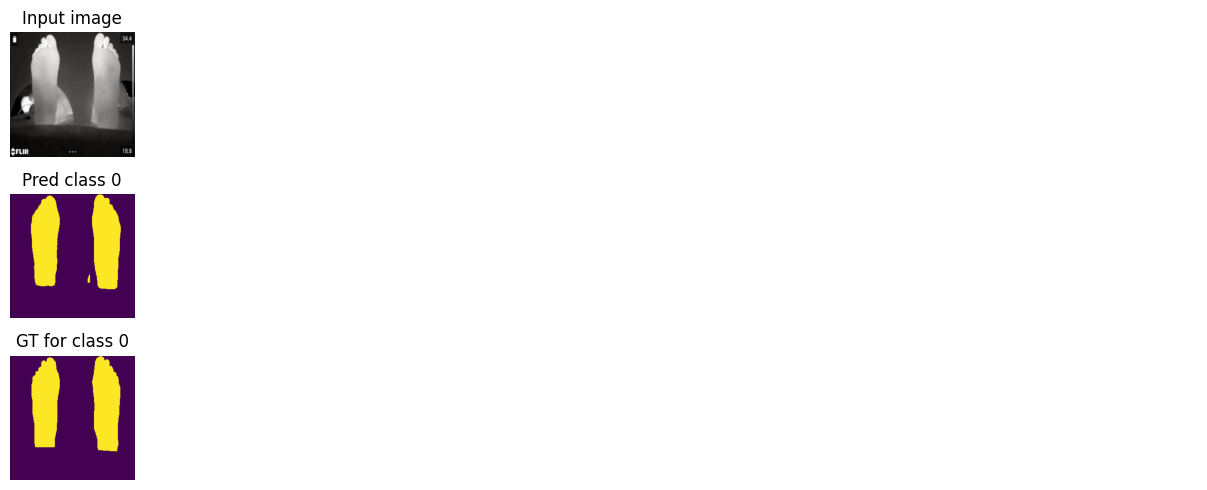

Train loss: 0.11955 | Time: 3m 12s | Val loss: 0.11824
Train_DICE_avg: 0.96434 | Train_Jaccard_avg: 0.93223 | Train_Sensitivity_avg: 0.97344 | Train_Specificity_avg: 0.98611 
Class 0 - Train_DICE: 0.96434 | Train_Jaccard: 0.93223 | Train_Sensitivity: 0.97344 | Train_Specificity: 0.98611 
Val_DICE_avg: 0.96325 | Val_Jaccard_avg: 0.93118 | Val_Sensitivity_avg: 0.97333 | Val_Specificity_avg: 0.98157 
Class 0 - Val_DICE: 0.96325 | Val_Jaccard: 0.93118 | Val_Sensitivity: 0.97333 | Val_Specificity: 0.98157 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.11787 | Time: 3m 16s | Val loss: 0.11922
Train_DICE_avg: 0.96589 | Train_Jaccard_avg: 0.93462 | Train_Sensitivity_avg: 0.97710 | Train_Specificity_avg: 0.98538 
Class 0 - Train_DICE: 0.96589 | Train_Jaccard: 0.93462 | Train_Sensitivity: 0.97710 | Train_Specificity: 0.98538 
Val_DICE_avg: 0.96250 | Val_Jaccard_avg: 0.93006 | Val_Sensitivity_avg: 0.97233 | Val_Specificity_avg: 0.98123 
Class 0 - Val_DICE: 0.96250 | Val_Jaccard: 0.93006 | Val_Sensitivity: 0.97233 | Val_Specificity: 0.98123 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.11683 | Time: 3m 20s | Val loss: 0.11875
Train_DICE_avg: 0.96675 | Train_Jaccard_avg: 0.93638 | Train_Sensitivity_avg: 0.97607 | Train_Specificity_avg: 0.98647 
Class 0 - Train_DICE: 0.96675 | Train_Jaccard: 0.93638 | Train_Sensitivity: 0.97607 | Train_Specificity: 0.98647 
Val_DICE_avg: 0.96108 | Val_Jaccard_avg: 0.92785 | Val_Sensitivity_avg: 0.97626 | Val_Specificity_avg: 0.97886 
Class 0 - Val_DICE: 0.96108 | Val_Jaccard: 0.92785 | Val_Sensitivity: 0.97626 | Val_Specificity: 0.97886 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.11728 | Time: 3m 23s | Val loss: 0.11893
Train_DICE_avg: 0.96529 | Train_Jaccard_avg: 0.93450 | Train_Sensitivity_avg: 0.97618 | Train_Specificity_avg: 0.98572 
Class 0 - Train_DICE: 0.96529 | Train_Jaccard: 0.93450 | Train_Sensitivity: 0.97618 | Train_Specificity: 0.98572 
Val_DICE_avg: 0.96095 | Val_Jaccard_avg: 0.92777 | Val_Sensitivity_avg: 0.97397 | Val_Specificity_avg: 0.97958 
Class 0 - Val_DICE: 0.96095 | Val_Jaccard: 0.92777 | Val_Sensitivity: 0.97397 | Val_Specificity: 0.97958 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.11682 | Time: 3m 27s | Val loss: 0.11890
Train_DICE_avg: 0.96537 | Train_Jaccard_avg: 0.93404 | Train_Sensitivity_avg: 0.97689 | Train_Specificity_avg: 0.98552 
Class 0 - Train_DICE: 0.96537 | Train_Jaccard: 0.93404 | Train_Sensitivity: 0.97689 | Train_Specificity: 0.98552 
Val_DICE_avg: 0.96086 | Val_Jaccard_avg: 0.92755 | Val_Sensitivity_avg: 0.97459 | Val_Specificity_avg: 0.97943 
Class 0 - Val_DICE: 0.96086 | Val_Jaccard: 0.92755 | Val_Sensitivity: 0.97459 | Val_Specificity: 0.97943 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


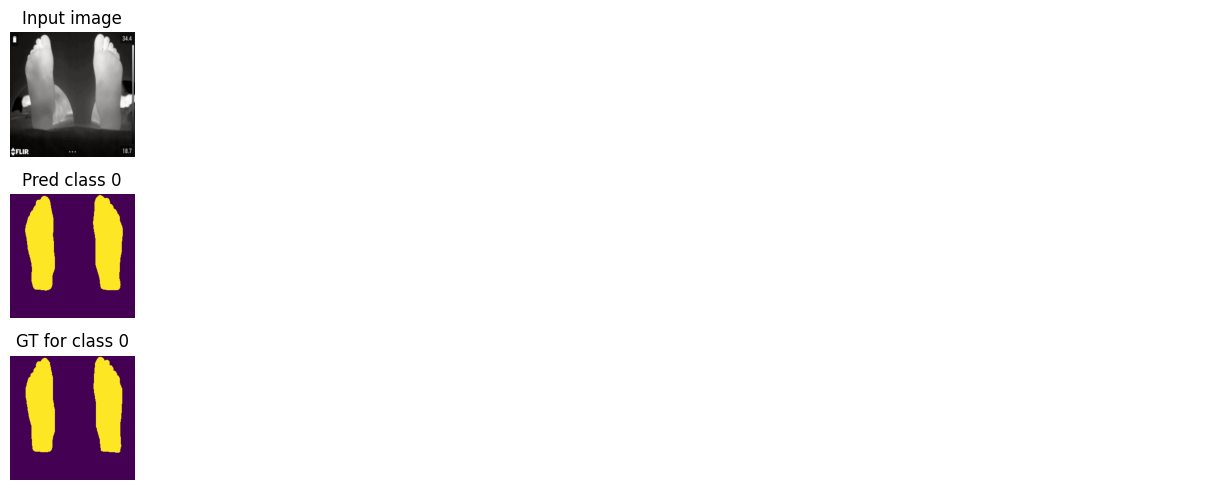

Train loss: 0.11685 | Time: 3m 31s | Val loss: 0.11771
Train_DICE_avg: 0.96534 | Train_Jaccard_avg: 0.93414 | Train_Sensitivity_avg: 0.97360 | Train_Specificity_avg: 0.98640 
Class 0 - Train_DICE: 0.96534 | Train_Jaccard: 0.93414 | Train_Sensitivity: 0.97360 | Train_Specificity: 0.98640 
Val_DICE_avg: 0.96034 | Val_Jaccard_avg: 0.92642 | Val_Sensitivity_avg: 0.97681 | Val_Specificity_avg: 0.97827 
Class 0 - Val_DICE: 0.96034 | Val_Jaccard: 0.92642 | Val_Sensitivity: 0.97681 | Val_Specificity: 0.97827 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.11693 | Time: 3m 35s | Val loss: 0.11752
Train_DICE_avg: 0.96416 | Train_Jaccard_avg: 0.93225 | Train_Sensitivity_avg: 0.97542 | Train_Specificity_avg: 0.98486 
Class 0 - Train_DICE: 0.96416 | Train_Jaccard: 0.93225 | Train_Sensitivity: 0.97542 | Train_Specificity: 0.98486 
Val_DICE_avg: 0.95856 | Val_Jaccard_avg: 0.92342 | Val_Sensitivity_avg: 0.97984 | Val_Specificity_avg: 0.97578 
Class 0 - Val_DICE: 0.95856 | Val_Jaccard: 0.92342 | Val_Sensitivity: 0.97984 | Val_Specificity: 0.97578 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.11537 | Time: 3m 39s | Val loss: 0.11868
Train_DICE_avg: 0.96677 | Train_Jaccard_avg: 0.93664 | Train_Sensitivity_avg: 0.97566 | Train_Specificity_avg: 0.98664 
Class 0 - Train_DICE: 0.96677 | Train_Jaccard: 0.93664 | Train_Sensitivity: 0.97566 | Train_Specificity: 0.98664 
Val_DICE_avg: 0.95796 | Val_Jaccard_avg: 0.92277 | Val_Sensitivity_avg: 0.97995 | Val_Specificity_avg: 0.97517 
Class 0 - Val_DICE: 0.95796 | Val_Jaccard: 0.92277 | Val_Sensitivity: 0.97995 | Val_Specificity: 0.97517 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.11488 | Time: 3m 42s | Val loss: 0.11789
Train_DICE_avg: 0.96687 | Train_Jaccard_avg: 0.93654 | Train_Sensitivity_avg: 0.97685 | Train_Specificity_avg: 0.98596 
Class 0 - Train_DICE: 0.96687 | Train_Jaccard: 0.93654 | Train_Sensitivity: 0.97685 | Train_Specificity: 0.98596 
Val_DICE_avg: 0.96036 | Val_Jaccard_avg: 0.92693 | Val_Sensitivity_avg: 0.97640 | Val_Specificity_avg: 0.97801 
Class 0 - Val_DICE: 0.96036 | Val_Jaccard: 0.92693 | Val_Sensitivity: 0.97640 | Val_Specificity: 0.97801 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.11364 | Time: 3m 46s | Val loss: 0.11679
Train_DICE_avg: 0.96713 | Train_Jaccard_avg: 0.93743 | Train_Sensitivity_avg: 0.97876 | Train_Specificity_avg: 0.98582 
Class 0 - Train_DICE: 0.96713 | Train_Jaccard: 0.93743 | Train_Sensitivity: 0.97876 | Train_Specificity: 0.98582 
Val_DICE_avg: 0.96154 | Val_Jaccard_avg: 0.92884 | Val_Sensitivity_avg: 0.97583 | Val_Specificity_avg: 0.97897 
Class 0 - Val_DICE: 0.96154 | Val_Jaccard: 0.92884 | Val_Sensitivity: 0.97583 | Val_Specificity: 0.97897 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


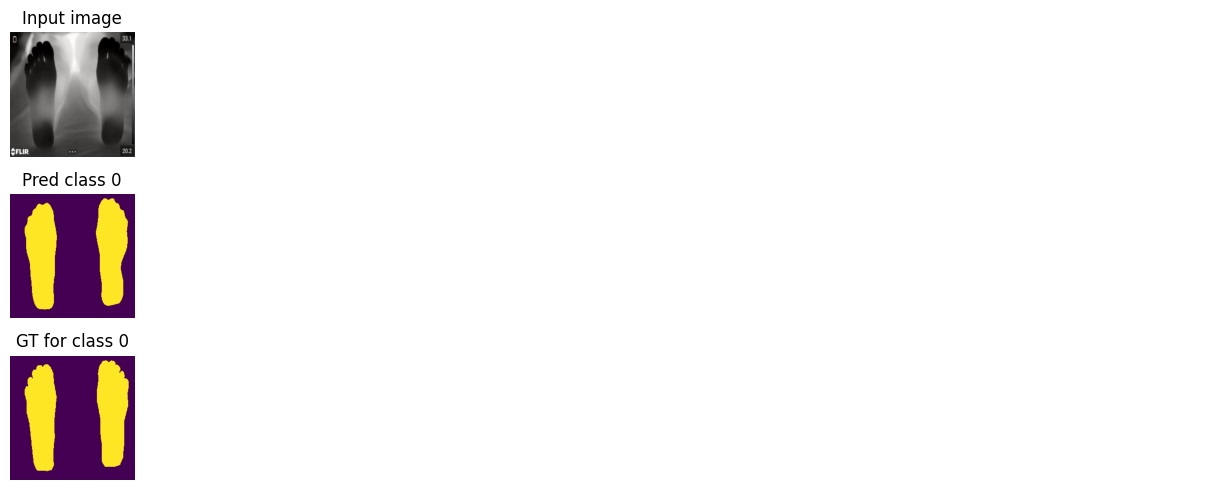

Train loss: 0.11253 | Time: 3m 50s | Val loss: 0.11495
Train_DICE_avg: 0.96931 | Train_Jaccard_avg: 0.94102 | Train_Sensitivity_avg: 0.97750 | Train_Specificity_avg: 0.98791 
Class 0 - Train_DICE: 0.96931 | Train_Jaccard: 0.94102 | Train_Sensitivity: 0.97750 | Train_Specificity: 0.98791 
Val_DICE_avg: 0.96274 | Val_Jaccard_avg: 0.93062 | Val_Sensitivity_avg: 0.97705 | Val_Specificity_avg: 0.97971 
Class 0 - Val_DICE: 0.96274 | Val_Jaccard: 0.93062 | Val_Sensitivity: 0.97705 | Val_Specificity: 0.97971 


Training DICE,▁▂▃▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████████
Training Jaccard,▁▃▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
Training Loss,█▇▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▄▅▆▆▇▇▇▇▇▇▇▇▇█▇████████████████████████
Training Specificity,▁▃▃▃▄▅▄▅▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇█████████████████
Validation DICE,▁▆▆▆▆▇▆▅▇▇▇██▇▇█████████████████████████
Validation Jaccard,▁▃▆▆▆▇▆▅▇▇▇▇▇▇▇▇████████████████████████
Validation Loss,█▇▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,█▇▁▁▆▇▇▆▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Validation Specificity,▁▆▆▅▆▆▇▇▇▇▇▇▇▇▇▇██▇█████████████████████
Training DICE,0.96931



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


Global Performance Metrics:
Loss mean: 0.15201, std: 0.00000
Dice Coefficient mean: 0.91267, std: 0.13394
Jaccard Index mean: 0.86069, std: 0.17529
Sensitivity mean: 0.90714, std: 0.16955
Specificity mean: 0.98791, std: 0.01082

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.91267, std: 0.13394
Jaccard mean: 0.86069, std: 0.17529
Sensitivity mean: 0.90714, std: 0.16955
Specificity mean: 0.98791, std: 0.01082


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-UNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 1.40 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


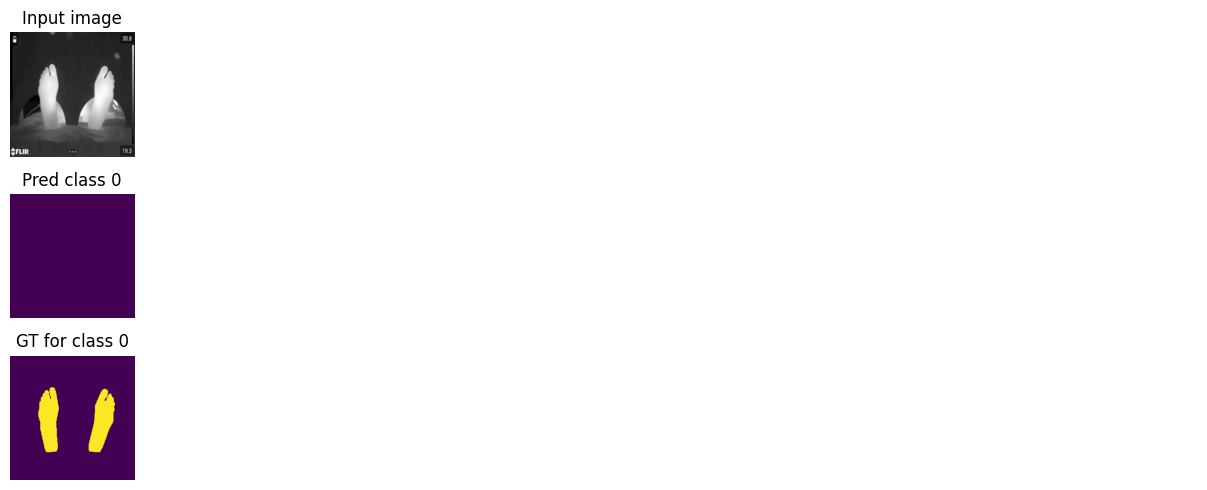

Train loss: 0.05859 | Time: 0m 4s | Val loss: 0.06658
Train_DICE_avg: 0.26747 | Train_Jaccard_avg: 0.17453 | Train_Sensitivity_avg: 0.46416 | Train_Specificity_avg: 0.78631 
Class 0 - Train_DICE: 0.26747 | Train_Jaccard: 0.17453 | Train_Sensitivity: 0.46416 | Train_Specificity: 0.78631 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.04799 | Time: 0m 7s | Val loss: 0.06449
Train_DICE_avg: 0.46923 | Train_Jaccard_avg: 0.34037 | Train_Sensitivity_avg: 0.58634 | Train_Specificity_avg: 0.83719 
Class 0 - Train_DICE: 0.46923 | Train_Jaccard: 0.34037 | Train_Sensitivity: 0.58634 | Train_Specificity: 0.83719 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.04325 | Time: 0m 11s | Val loss: 0.05398
Train_DICE_avg: 0.55519 | Train_Jaccard_avg: 0.40910 | Train_Sensitivity_avg: 0.67265 | Train_Specificity_avg: 0.85760 
Class 0 - Train_DICE: 0.55519 | Train_Jaccard: 0.40910 | Train_Sensitivity: 0.67265 | Train_Specificity: 0.85760 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.03881 | Time: 0m 14s | Val loss: 0.03917
Train_DICE_avg: 0.62572 | Train_Jaccard_avg: 0.47930 | Train_Sensitivity_avg: 0.72286 | Train_Specificity_avg: 0.87880 
Class 0 - Train_DICE: 0.62572 | Train_Jaccard: 0.47930 | Train_Sensitivity: 0.72286 | Train_Specificity: 0.87880 
Val_DICE_avg: 0.49887 | Val_Jaccard_avg: 0.37062 | Val_Sensitivity_avg: 0.89533 | Val_Specificity_avg: 0.82428 
Class 0 - Val_DICE: 0.49887 | Val_Jaccard: 0.37062 | Val_Sensitivity: 0.89533 | Val_Specificity: 0.82428 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.03621 | Time: 0m 18s | Val loss: 0.03330
Train_DICE_avg: 0.66046 | Train_Jaccard_avg: 0.51986 | Train_Sensitivity_avg: 0.77395 | Train_Specificity_avg: 0.88600 
Class 0 - Train_DICE: 0.66046 | Train_Jaccard: 0.51986 | Train_Sensitivity: 0.77395 | Train_Specificity: 0.88600 
Val_DICE_avg: 0.69612 | Val_Jaccard_avg: 0.56320 | Val_Sensitivity_avg: 0.88202 | Val_Specificity_avg: 0.87968 
Class 0 - Val_DICE: 0.69612 | Val_Jaccard: 0.56320 | Val_Sensitivity: 0.88202 | Val_Specificity: 0.87968 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


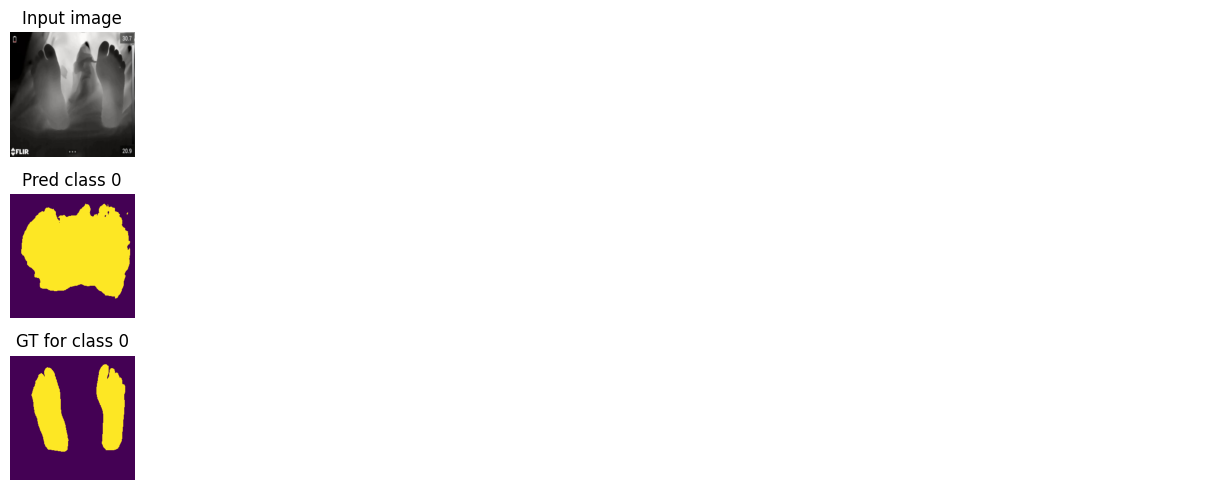

Train loss: 0.03336 | Time: 0m 22s | Val loss: 0.03107
Train_DICE_avg: 0.69831 | Train_Jaccard_avg: 0.55916 | Train_Sensitivity_avg: 0.79652 | Train_Specificity_avg: 0.89557 
Class 0 - Train_DICE: 0.69831 | Train_Jaccard: 0.55916 | Train_Sensitivity: 0.79652 | Train_Specificity: 0.89557 
Val_DICE_avg: 0.78487 | Val_Jaccard_avg: 0.66145 | Val_Sensitivity_avg: 0.78387 | Val_Specificity_avg: 0.93785 
Class 0 - Val_DICE: 0.78487 | Val_Jaccard: 0.66145 | Val_Sensitivity: 0.78387 | Val_Specificity: 0.93785 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.02922 | Time: 0m 26s | Val loss: 0.02594
Train_DICE_avg: 0.75955 | Train_Jaccard_avg: 0.62778 | Train_Sensitivity_avg: 0.83386 | Train_Specificity_avg: 0.91045 
Class 0 - Train_DICE: 0.75955 | Train_Jaccard: 0.62778 | Train_Sensitivity: 0.83386 | Train_Specificity: 0.91045 
Val_DICE_avg: 0.81727 | Val_Jaccard_avg: 0.70326 | Val_Sensitivity_avg: 0.82706 | Val_Specificity_avg: 0.94120 
Class 0 - Val_DICE: 0.81727 | Val_Jaccard: 0.70326 | Val_Sensitivity: 0.82706 | Val_Specificity: 0.94120 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.02778 | Time: 0m 30s | Val loss: 0.02242
Train_DICE_avg: 0.77272 | Train_Jaccard_avg: 0.64574 | Train_Sensitivity_avg: 0.83755 | Train_Specificity_avg: 0.91787 
Class 0 - Train_DICE: 0.77272 | Train_Jaccard: 0.64574 | Train_Sensitivity: 0.83755 | Train_Specificity: 0.91787 
Val_DICE_avg: 0.83325 | Val_Jaccard_avg: 0.72575 | Val_Sensitivity_avg: 0.85973 | Val_Specificity_avg: 0.93777 
Class 0 - Val_DICE: 0.83325 | Val_Jaccard: 0.72575 | Val_Sensitivity: 0.85973 | Val_Specificity: 0.93777 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.02386 | Time: 0m 34s | Val loss: 0.02264
Train_DICE_avg: 0.79819 | Train_Jaccard_avg: 0.67992 | Train_Sensitivity_avg: 0.86184 | Train_Specificity_avg: 0.92299 
Class 0 - Train_DICE: 0.79819 | Train_Jaccard: 0.67992 | Train_Sensitivity: 0.86184 | Train_Specificity: 0.92299 
Val_DICE_avg: 0.83696 | Val_Jaccard_avg: 0.73111 | Val_Sensitivity_avg: 0.83556 | Val_Specificity_avg: 0.94738 
Class 0 - Val_DICE: 0.83696 | Val_Jaccard: 0.73111 | Val_Sensitivity: 0.83556 | Val_Specificity: 0.94738 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.02281 | Time: 0m 37s | Val loss: 0.01872
Train_DICE_avg: 0.81925 | Train_Jaccard_avg: 0.70754 | Train_Sensitivity_avg: 0.87053 | Train_Specificity_avg: 0.93031 
Class 0 - Train_DICE: 0.81925 | Train_Jaccard: 0.70754 | Train_Sensitivity: 0.87053 | Train_Specificity: 0.93031 
Val_DICE_avg: 0.84884 | Val_Jaccard_avg: 0.75283 | Val_Sensitivity_avg: 0.88092 | Val_Specificity_avg: 0.94183 
Class 0 - Val_DICE: 0.84884 | Val_Jaccard: 0.75283 | Val_Sensitivity: 0.88092 | Val_Specificity: 0.94183 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


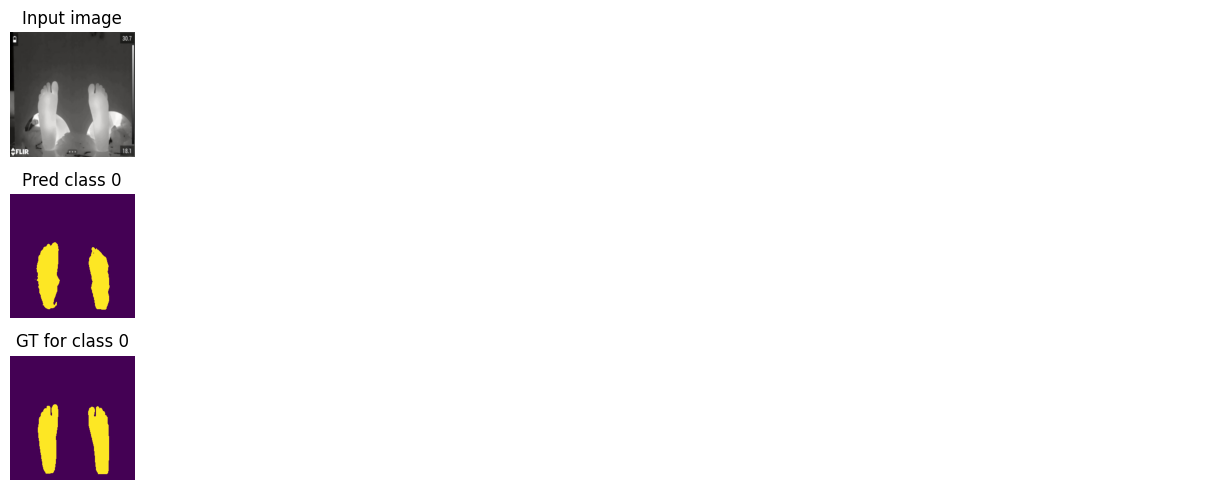

Train loss: 0.02515 | Time: 0m 41s | Val loss: 0.03093
Train_DICE_avg: 0.79426 | Train_Jaccard_avg: 0.67661 | Train_Sensitivity_avg: 0.87426 | Train_Specificity_avg: 0.91902 
Class 0 - Train_DICE: 0.79426 | Train_Jaccard: 0.67661 | Train_Sensitivity: 0.87426 | Train_Specificity: 0.91902 
Val_DICE_avg: 0.65889 | Val_Jaccard_avg: 0.53199 | Val_Sensitivity_avg: 0.98356 | Val_Specificity_avg: 0.85602 
Class 0 - Val_DICE: 0.65889 | Val_Jaccard: 0.53199 | Val_Sensitivity: 0.98356 | Val_Specificity: 0.85602 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.02249 | Time: 0m 45s | Val loss: 0.01884
Train_DICE_avg: 0.82475 | Train_Jaccard_avg: 0.71521 | Train_Sensitivity_avg: 0.87260 | Train_Specificity_avg: 0.93229 
Class 0 - Train_DICE: 0.82475 | Train_Jaccard: 0.71521 | Train_Sensitivity: 0.87260 | Train_Specificity: 0.93229 
Val_DICE_avg: 0.85053 | Val_Jaccard_avg: 0.75708 | Val_Sensitivity_avg: 0.90689 | Val_Specificity_avg: 0.93617 
Class 0 - Val_DICE: 0.85053 | Val_Jaccard: 0.75708 | Val_Sensitivity: 0.90689 | Val_Specificity: 0.93617 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.01940 | Time: 0m 49s | Val loss: 0.01636
Train_DICE_avg: 0.84773 | Train_Jaccard_avg: 0.75028 | Train_Sensitivity_avg: 0.90697 | Train_Specificity_avg: 0.94035 
Class 0 - Train_DICE: 0.84773 | Train_Jaccard: 0.75028 | Train_Sensitivity: 0.90697 | Train_Specificity: 0.94035 
Val_DICE_avg: 0.87230 | Val_Jaccard_avg: 0.78770 | Val_Sensitivity_avg: 0.90285 | Val_Specificity_avg: 0.94954 
Class 0 - Val_DICE: 0.87230 | Val_Jaccard: 0.78770 | Val_Sensitivity: 0.90285 | Val_Specificity: 0.94954 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.01722 | Time: 0m 53s | Val loss: 0.01616
Train_DICE_avg: 0.87382 | Train_Jaccard_avg: 0.78624 | Train_Sensitivity_avg: 0.90053 | Train_Specificity_avg: 0.95195 
Class 0 - Train_DICE: 0.87382 | Train_Jaccard: 0.78624 | Train_Sensitivity: 0.90053 | Train_Specificity: 0.95195 
Val_DICE_avg: 0.88422 | Val_Jaccard_avg: 0.80379 | Val_Sensitivity_avg: 0.91380 | Val_Specificity_avg: 0.94794 
Class 0 - Val_DICE: 0.88422 | Val_Jaccard: 0.80379 | Val_Sensitivity: 0.91380 | Val_Specificity: 0.94794 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.01584 | Time: 0m 57s | Val loss: 0.01493
Train_DICE_avg: 0.88166 | Train_Jaccard_avg: 0.79843 | Train_Sensitivity_avg: 0.92135 | Train_Specificity_avg: 0.95181 
Class 0 - Train_DICE: 0.88166 | Train_Jaccard: 0.79843 | Train_Sensitivity: 0.92135 | Train_Specificity: 0.95181 
Val_DICE_avg: 0.89857 | Val_Jaccard_avg: 0.82528 | Val_Sensitivity_avg: 0.91588 | Val_Specificity_avg: 0.95655 
Class 0 - Val_DICE: 0.89857 | Val_Jaccard: 0.82528 | Val_Sensitivity: 0.91588 | Val_Specificity: 0.95655 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


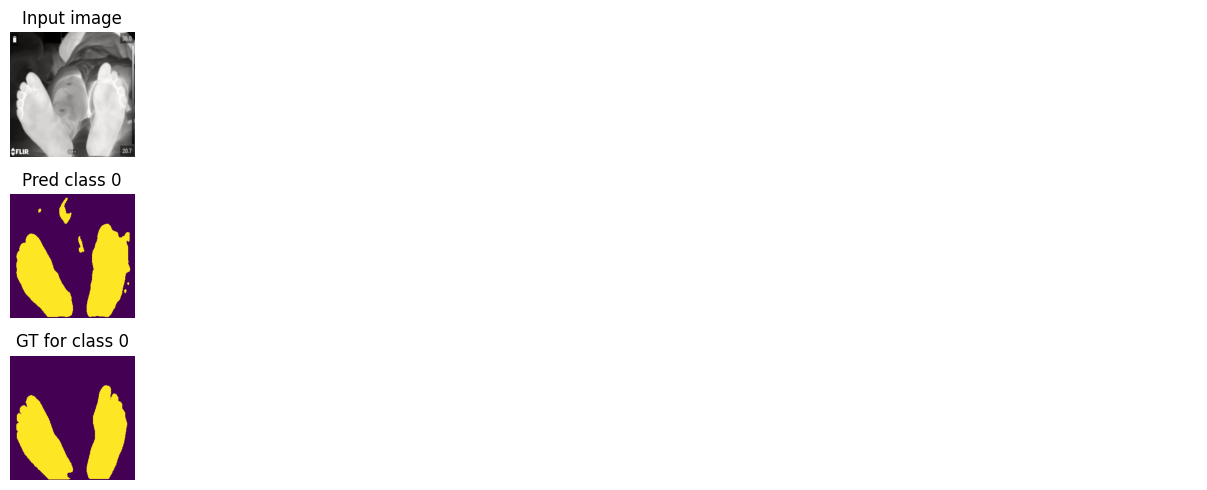

Train loss: 0.01456 | Time: 1m 1s | Val loss: 0.01302
Train_DICE_avg: 0.89024 | Train_Jaccard_avg: 0.81180 | Train_Sensitivity_avg: 0.91684 | Train_Specificity_avg: 0.95824 
Class 0 - Train_DICE: 0.89024 | Train_Jaccard: 0.81180 | Train_Sensitivity: 0.91684 | Train_Specificity: 0.95824 
Val_DICE_avg: 0.90278 | Val_Jaccard_avg: 0.83356 | Val_Sensitivity_avg: 0.91412 | Val_Specificity_avg: 0.96231 
Class 0 - Val_DICE: 0.90278 | Val_Jaccard: 0.83356 | Val_Sensitivity: 0.91412 | Val_Specificity: 0.96231 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.01451 | Time: 1m 4s | Val loss: 0.01220
Train_DICE_avg: 0.89179 | Train_Jaccard_avg: 0.81656 | Train_Sensitivity_avg: 0.91674 | Train_Specificity_avg: 0.95961 
Class 0 - Train_DICE: 0.89179 | Train_Jaccard: 0.81656 | Train_Sensitivity: 0.91674 | Train_Specificity: 0.95961 
Val_DICE_avg: 0.90870 | Val_Jaccard_avg: 0.84280 | Val_Sensitivity_avg: 0.92614 | Val_Specificity_avg: 0.96173 
Class 0 - Val_DICE: 0.90870 | Val_Jaccard: 0.84280 | Val_Sensitivity: 0.92614 | Val_Specificity: 0.96173 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.01312 | Time: 1m 8s | Val loss: 0.01196
Train_DICE_avg: 0.90438 | Train_Jaccard_avg: 0.83522 | Train_Sensitivity_avg: 0.93159 | Train_Specificity_avg: 0.96329 
Class 0 - Train_DICE: 0.90438 | Train_Jaccard: 0.83522 | Train_Sensitivity: 0.93159 | Train_Specificity: 0.96329 
Val_DICE_avg: 0.91614 | Val_Jaccard_avg: 0.85343 | Val_Sensitivity_avg: 0.93355 | Val_Specificity_avg: 0.96177 
Class 0 - Val_DICE: 0.91614 | Val_Jaccard: 0.85343 | Val_Sensitivity: 0.93355 | Val_Specificity: 0.96177 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.01233 | Time: 1m 12s | Val loss: 0.01169
Train_DICE_avg: 0.91509 | Train_Jaccard_avg: 0.84871 | Train_Sensitivity_avg: 0.93705 | Train_Specificity_avg: 0.96508 
Class 0 - Train_DICE: 0.91509 | Train_Jaccard: 0.84871 | Train_Sensitivity: 0.93705 | Train_Specificity: 0.96508 
Val_DICE_avg: 0.91864 | Val_Jaccard_avg: 0.85889 | Val_Sensitivity_avg: 0.93757 | Val_Specificity_avg: 0.96228 
Class 0 - Val_DICE: 0.91864 | Val_Jaccard: 0.85889 | Val_Sensitivity: 0.93757 | Val_Specificity: 0.96228 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.01170 | Time: 1m 16s | Val loss: 0.01054
Train_DICE_avg: 0.91400 | Train_Jaccard_avg: 0.84806 | Train_Sensitivity_avg: 0.93629 | Train_Specificity_avg: 0.96553 
Class 0 - Train_DICE: 0.91400 | Train_Jaccard: 0.84806 | Train_Sensitivity: 0.93629 | Train_Specificity: 0.96553 
Val_DICE_avg: 0.92452 | Val_Jaccard_avg: 0.86689 | Val_Sensitivity_avg: 0.93194 | Val_Specificity_avg: 0.96812 
Class 0 - Val_DICE: 0.92452 | Val_Jaccard: 0.86689 | Val_Sensitivity: 0.93194 | Val_Specificity: 0.96812 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


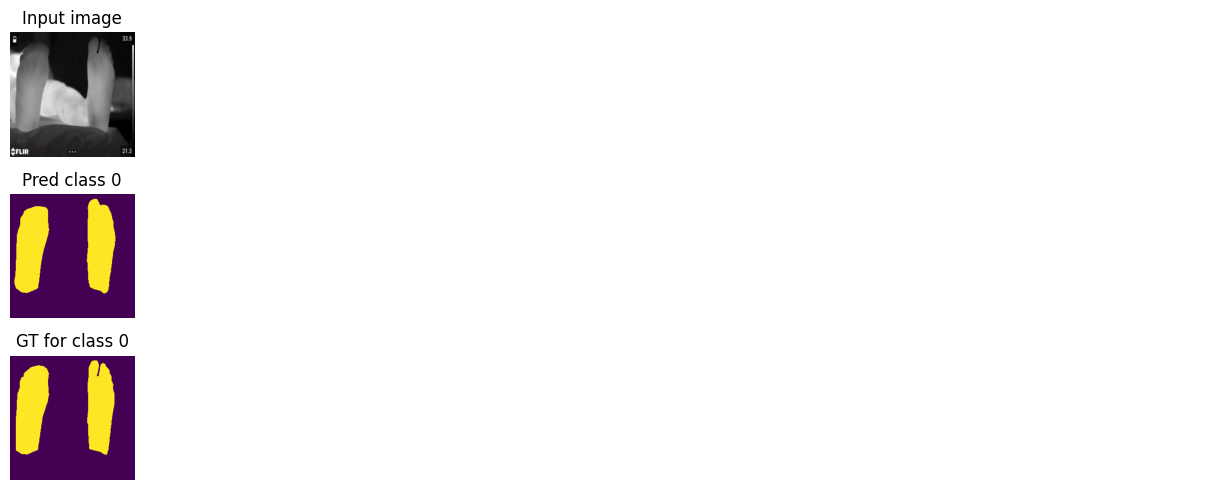

Train loss: 0.01303 | Time: 1m 20s | Val loss: 0.01348
Train_DICE_avg: 0.90547 | Train_Jaccard_avg: 0.83466 | Train_Sensitivity_avg: 0.93326 | Train_Specificity_avg: 0.96002 
Class 0 - Train_DICE: 0.90547 | Train_Jaccard: 0.83466 | Train_Sensitivity: 0.93326 | Train_Specificity: 0.96002 
Val_DICE_avg: 0.88687 | Val_Jaccard_avg: 0.81434 | Val_Sensitivity_avg: 0.97758 | Val_Specificity_avg: 0.93923 
Class 0 - Val_DICE: 0.88687 | Val_Jaccard: 0.81434 | Val_Sensitivity: 0.97758 | Val_Specificity: 0.93923 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.01295 | Time: 1m 24s | Val loss: 0.01092
Train_DICE_avg: 0.90307 | Train_Jaccard_avg: 0.83423 | Train_Sensitivity_avg: 0.92610 | Train_Specificity_avg: 0.96435 
Class 0 - Train_DICE: 0.90307 | Train_Jaccard: 0.83423 | Train_Sensitivity: 0.92610 | Train_Specificity: 0.96435 
Val_DICE_avg: 0.92764 | Val_Jaccard_avg: 0.87038 | Val_Sensitivity_avg: 0.91371 | Val_Specificity_avg: 0.97629 
Class 0 - Val_DICE: 0.92764 | Val_Jaccard: 0.87038 | Val_Sensitivity: 0.91371 | Val_Specificity: 0.97629 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.01127 | Time: 1m 27s | Val loss: 0.01110
Train_DICE_avg: 0.91844 | Train_Jaccard_avg: 0.85657 | Train_Sensitivity_avg: 0.93551 | Train_Specificity_avg: 0.97010 
Class 0 - Train_DICE: 0.91844 | Train_Jaccard: 0.85657 | Train_Sensitivity: 0.93551 | Train_Specificity: 0.97010 
Val_DICE_avg: 0.91549 | Val_Jaccard_avg: 0.85382 | Val_Sensitivity_avg: 0.96903 | Val_Specificity_avg: 0.95296 
Class 0 - Val_DICE: 0.91549 | Val_Jaccard: 0.85382 | Val_Sensitivity: 0.96903 | Val_Specificity: 0.95296 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.01052 | Time: 1m 31s | Val loss: 0.00841
Train_DICE_avg: 0.92608 | Train_Jaccard_avg: 0.86720 | Train_Sensitivity_avg: 0.94516 | Train_Specificity_avg: 0.96924 
Class 0 - Train_DICE: 0.92608 | Train_Jaccard: 0.86720 | Train_Sensitivity: 0.94516 | Train_Specificity: 0.96924 
Val_DICE_avg: 0.94061 | Val_Jaccard_avg: 0.89047 | Val_Sensitivity_avg: 0.95218 | Val_Specificity_avg: 0.97359 
Class 0 - Val_DICE: 0.94061 | Val_Jaccard: 0.89047 | Val_Sensitivity: 0.95218 | Val_Specificity: 0.97359 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.00944 | Time: 1m 35s | Val loss: 0.00831
Train_DICE_avg: 0.93321 | Train_Jaccard_avg: 0.87940 | Train_Sensitivity_avg: 0.94973 | Train_Specificity_avg: 0.97327 
Class 0 - Train_DICE: 0.93321 | Train_Jaccard: 0.87940 | Train_Sensitivity: 0.94973 | Train_Specificity: 0.97327 
Val_DICE_avg: 0.94404 | Val_Jaccard_avg: 0.89694 | Val_Sensitivity_avg: 0.94266 | Val_Specificity_avg: 0.97973 
Class 0 - Val_DICE: 0.94404 | Val_Jaccard: 0.89694 | Val_Sensitivity: 0.94266 | Val_Specificity: 0.97973 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


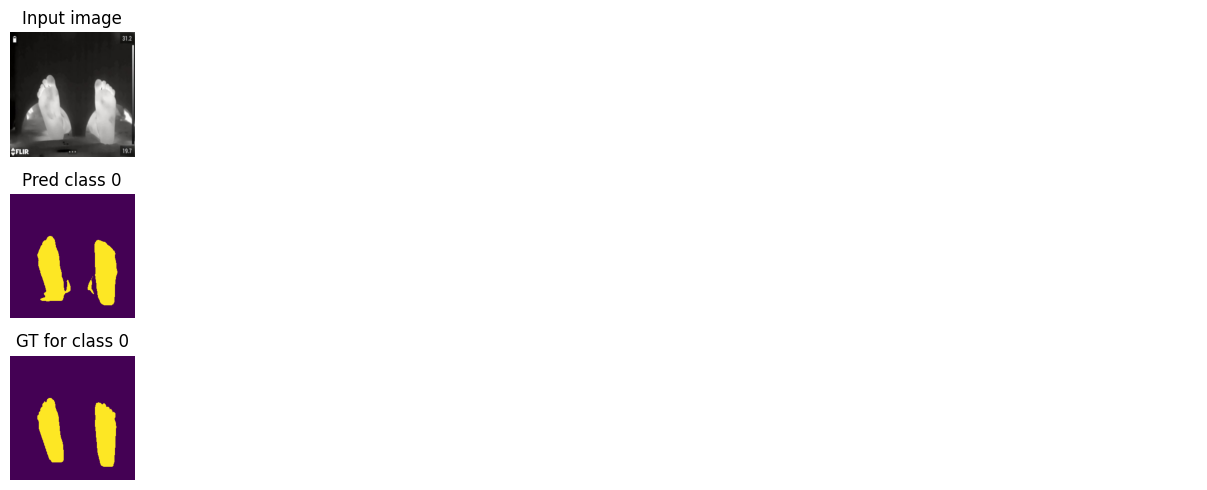

Train loss: 0.00878 | Time: 1m 39s | Val loss: 0.00794
Train_DICE_avg: 0.93764 | Train_Jaccard_avg: 0.88688 | Train_Sensitivity_avg: 0.95287 | Train_Specificity_avg: 0.97593 
Class 0 - Train_DICE: 0.93764 | Train_Jaccard: 0.88688 | Train_Sensitivity: 0.95287 | Train_Specificity: 0.97593 
Val_DICE_avg: 0.94436 | Val_Jaccard_avg: 0.89794 | Val_Sensitivity_avg: 0.96080 | Val_Specificity_avg: 0.97230 
Class 0 - Val_DICE: 0.94436 | Val_Jaccard: 0.89794 | Val_Sensitivity: 0.96080 | Val_Specificity: 0.97230 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.00856 | Time: 1m 43s | Val loss: 0.00794
Train_DICE_avg: 0.94048 | Train_Jaccard_avg: 0.89173 | Train_Sensitivity_avg: 0.95485 | Train_Specificity_avg: 0.97575 
Class 0 - Train_DICE: 0.94048 | Train_Jaccard: 0.89173 | Train_Sensitivity: 0.95485 | Train_Specificity: 0.97575 
Val_DICE_avg: 0.94373 | Val_Jaccard_avg: 0.89736 | Val_Sensitivity_avg: 0.95404 | Val_Specificity_avg: 0.97499 
Class 0 - Val_DICE: 0.94373 | Val_Jaccard: 0.89736 | Val_Sensitivity: 0.95404 | Val_Specificity: 0.97499 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.00802 | Time: 1m 46s | Val loss: 0.00965
Train_DICE_avg: 0.94288 | Train_Jaccard_avg: 0.89582 | Train_Sensitivity_avg: 0.95399 | Train_Specificity_avg: 0.97877 
Class 0 - Train_DICE: 0.94288 | Train_Jaccard: 0.89582 | Train_Sensitivity: 0.95399 | Train_Specificity: 0.97877 
Val_DICE_avg: 0.93681 | Val_Jaccard_avg: 0.88744 | Val_Sensitivity_avg: 0.95982 | Val_Specificity_avg: 0.96583 
Class 0 - Val_DICE: 0.93681 | Val_Jaccard: 0.88744 | Val_Sensitivity: 0.95982 | Val_Specificity: 0.96583 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.00802 | Time: 1m 50s | Val loss: 0.00901
Train_DICE_avg: 0.94219 | Train_Jaccard_avg: 0.89432 | Train_Sensitivity_avg: 0.95240 | Train_Specificity_avg: 0.97865 
Class 0 - Train_DICE: 0.94219 | Train_Jaccard: 0.89432 | Train_Sensitivity: 0.95240 | Train_Specificity: 0.97865 
Val_DICE_avg: 0.94049 | Val_Jaccard_avg: 0.89338 | Val_Sensitivity_avg: 0.96026 | Val_Specificity_avg: 0.96832 
Class 0 - Val_DICE: 0.94049 | Val_Jaccard: 0.89338 | Val_Sensitivity: 0.96026 | Val_Specificity: 0.96832 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.00761 | Time: 1m 54s | Val loss: 0.00857
Train_DICE_avg: 0.94510 | Train_Jaccard_avg: 0.89892 | Train_Sensitivity_avg: 0.96163 | Train_Specificity_avg: 0.97813 
Class 0 - Train_DICE: 0.94510 | Train_Jaccard: 0.89892 | Train_Sensitivity: 0.96163 | Train_Specificity: 0.97813 
Val_DICE_avg: 0.93525 | Val_Jaccard_avg: 0.88453 | Val_Sensitivity_avg: 0.97314 | Val_Specificity_avg: 0.96338 
Class 0 - Val_DICE: 0.93525 | Val_Jaccard: 0.88453 | Val_Sensitivity: 0.97314 | Val_Specificity: 0.96338 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


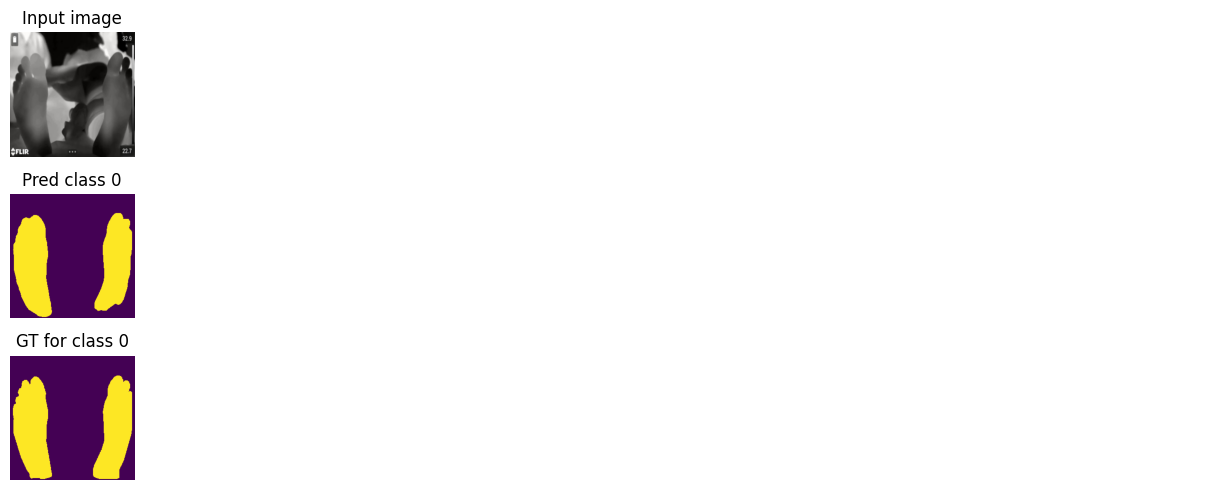

Train loss: 0.01013 | Time: 1m 58s | Val loss: 0.01187
Train_DICE_avg: 0.93036 | Train_Jaccard_avg: 0.87602 | Train_Sensitivity_avg: 0.95067 | Train_Specificity_avg: 0.97054 
Class 0 - Train_DICE: 0.93036 | Train_Jaccard: 0.87602 | Train_Sensitivity: 0.95067 | Train_Specificity: 0.97054 
Val_DICE_avg: 0.91347 | Val_Jaccard_avg: 0.85314 | Val_Sensitivity_avg: 0.98260 | Val_Specificity_avg: 0.94884 
Class 0 - Val_DICE: 0.91347 | Val_Jaccard: 0.85314 | Val_Sensitivity: 0.98260 | Val_Specificity: 0.94884 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.00895 | Time: 2m 1s | Val loss: 0.00841
Train_DICE_avg: 0.93491 | Train_Jaccard_avg: 0.88321 | Train_Sensitivity_avg: 0.94264 | Train_Specificity_avg: 0.97789 
Class 0 - Train_DICE: 0.93491 | Train_Jaccard: 0.88321 | Train_Sensitivity: 0.94264 | Train_Specificity: 0.97789 
Val_DICE_avg: 0.94179 | Val_Jaccard_avg: 0.89553 | Val_Sensitivity_avg: 0.96709 | Val_Specificity_avg: 0.96979 
Class 0 - Val_DICE: 0.94179 | Val_Jaccard: 0.89553 | Val_Sensitivity: 0.96709 | Val_Specificity: 0.96979 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.00775 | Time: 2m 5s | Val loss: 0.00768
Train_DICE_avg: 0.94359 | Train_Jaccard_avg: 0.89739 | Train_Sensitivity_avg: 0.95808 | Train_Specificity_avg: 0.97843 
Class 0 - Train_DICE: 0.94359 | Train_Jaccard: 0.89739 | Train_Sensitivity: 0.95808 | Train_Specificity: 0.97843 
Val_DICE_avg: 0.94808 | Val_Jaccard_avg: 0.90485 | Val_Sensitivity_avg: 0.96192 | Val_Specificity_avg: 0.97540 
Class 0 - Val_DICE: 0.94808 | Val_Jaccard: 0.90485 | Val_Sensitivity: 0.96192 | Val_Specificity: 0.97540 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.00733 | Time: 2m 9s | Val loss: 0.00762
Train_DICE_avg: 0.94806 | Train_Jaccard_avg: 0.90435 | Train_Sensitivity_avg: 0.95882 | Train_Specificity_avg: 0.98042 
Class 0 - Train_DICE: 0.94806 | Train_Jaccard: 0.90435 | Train_Sensitivity: 0.95882 | Train_Specificity: 0.98042 
Val_DICE_avg: 0.94391 | Val_Jaccard_avg: 0.89811 | Val_Sensitivity_avg: 0.97893 | Val_Specificity_avg: 0.96657 
Class 0 - Val_DICE: 0.94391 | Val_Jaccard: 0.89811 | Val_Sensitivity: 0.97893 | Val_Specificity: 0.96657 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.00682 | Time: 2m 13s | Val loss: 0.00666
Train_DICE_avg: 0.95174 | Train_Jaccard_avg: 0.91051 | Train_Sensitivity_avg: 0.96034 | Train_Specificity_avg: 0.98164 
Class 0 - Train_DICE: 0.95174 | Train_Jaccard: 0.91051 | Train_Sensitivity: 0.96034 | Train_Specificity: 0.98164 
Val_DICE_avg: 0.95675 | Val_Jaccard_avg: 0.91902 | Val_Sensitivity_avg: 0.96687 | Val_Specificity_avg: 0.97851 
Class 0 - Val_DICE: 0.95675 | Val_Jaccard: 0.91902 | Val_Sensitivity: 0.96687 | Val_Specificity: 0.97851 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


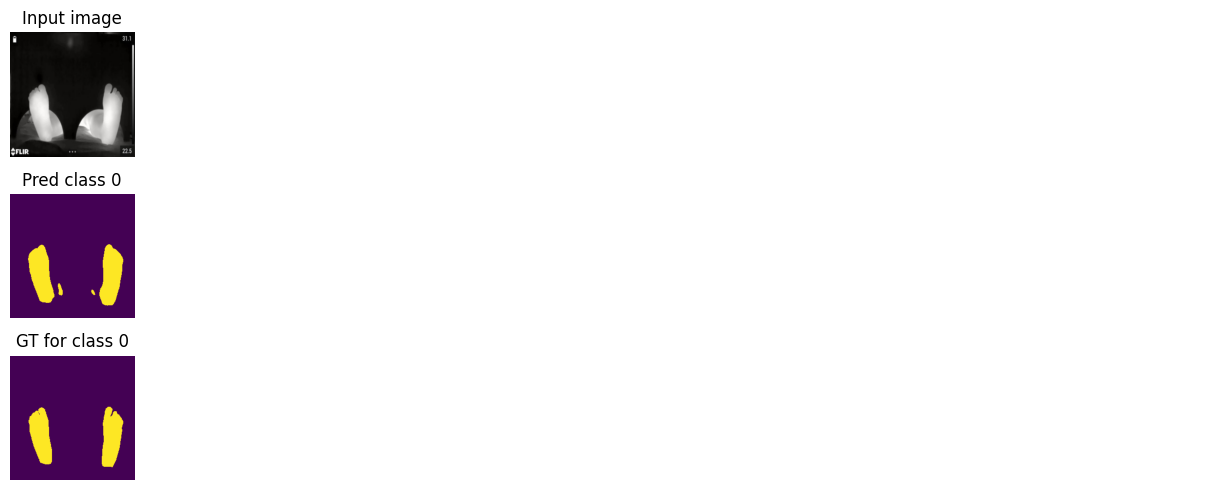

Train loss: 0.00677 | Time: 2m 17s | Val loss: 0.00637
Train_DICE_avg: 0.95094 | Train_Jaccard_avg: 0.91005 | Train_Sensitivity_avg: 0.95724 | Train_Specificity_avg: 0.98281 
Class 0 - Train_DICE: 0.95094 | Train_Jaccard: 0.91005 | Train_Sensitivity: 0.95724 | Train_Specificity: 0.98281 
Val_DICE_avg: 0.95830 | Val_Jaccard_avg: 0.92173 | Val_Sensitivity_avg: 0.96314 | Val_Specificity_avg: 0.98133 
Class 0 - Val_DICE: 0.95830 | Val_Jaccard: 0.92173 | Val_Sensitivity: 0.96314 | Val_Specificity: 0.98133 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.00604 | Time: 2m 21s | Val loss: 0.00653
Train_DICE_avg: 0.95656 | Train_Jaccard_avg: 0.91870 | Train_Sensitivity_avg: 0.96621 | Train_Specificity_avg: 0.98306 
Class 0 - Train_DICE: 0.95656 | Train_Jaccard: 0.91870 | Train_Sensitivity: 0.96621 | Train_Specificity: 0.98306 
Val_DICE_avg: 0.95686 | Val_Jaccard_avg: 0.91998 | Val_Sensitivity_avg: 0.97180 | Val_Specificity_avg: 0.97614 
Class 0 - Val_DICE: 0.95686 | Val_Jaccard: 0.91998 | Val_Sensitivity: 0.97180 | Val_Specificity: 0.97614 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.00607 | Time: 2m 24s | Val loss: 0.00749
Train_DICE_avg: 0.95797 | Train_Jaccard_avg: 0.92132 | Train_Sensitivity_avg: 0.96828 | Train_Specificity_avg: 0.98400 
Class 0 - Train_DICE: 0.95797 | Train_Jaccard: 0.92132 | Train_Sensitivity: 0.96828 | Train_Specificity: 0.98400 
Val_DICE_avg: 0.95066 | Val_Jaccard_avg: 0.91026 | Val_Sensitivity_avg: 0.97884 | Val_Specificity_avg: 0.96931 
Class 0 - Val_DICE: 0.95066 | Val_Jaccard: 0.91026 | Val_Sensitivity: 0.97884 | Val_Specificity: 0.96931 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.00621 | Time: 2m 28s | Val loss: 0.00632
Train_DICE_avg: 0.95527 | Train_Jaccard_avg: 0.91681 | Train_Sensitivity_avg: 0.96091 | Train_Specificity_avg: 0.98446 
Class 0 - Train_DICE: 0.95527 | Train_Jaccard: 0.91681 | Train_Sensitivity: 0.96091 | Train_Specificity: 0.98446 
Val_DICE_avg: 0.95870 | Val_Jaccard_avg: 0.92273 | Val_Sensitivity_avg: 0.97136 | Val_Specificity_avg: 0.97806 
Class 0 - Val_DICE: 0.95870 | Val_Jaccard: 0.92273 | Val_Sensitivity: 0.97136 | Val_Specificity: 0.97806 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.00596 | Time: 2m 32s | Val loss: 0.00583
Train_DICE_avg: 0.95716 | Train_Jaccard_avg: 0.92068 | Train_Sensitivity_avg: 0.96739 | Train_Specificity_avg: 0.98418 
Class 0 - Train_DICE: 0.95716 | Train_Jaccard: 0.92068 | Train_Sensitivity: 0.96739 | Train_Specificity: 0.98418 
Val_DICE_avg: 0.95987 | Val_Jaccard_avg: 0.92471 | Val_Sensitivity_avg: 0.97190 | Val_Specificity_avg: 0.97979 
Class 0 - Val_DICE: 0.95987 | Val_Jaccard: 0.92471 | Val_Sensitivity: 0.97190 | Val_Specificity: 0.97979 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


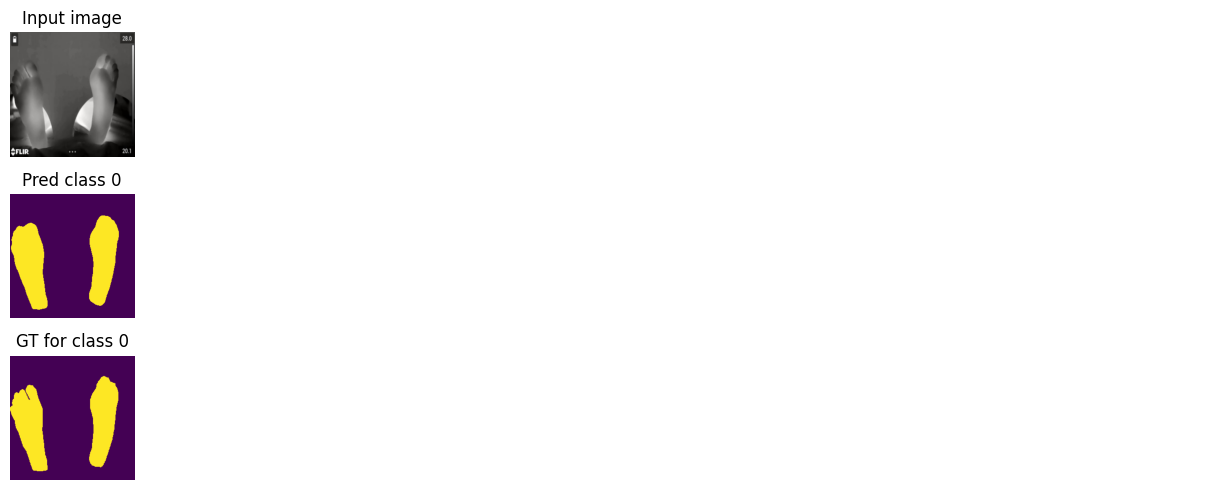

Train loss: 0.00568 | Time: 2m 36s | Val loss: 0.00568
Train_DICE_avg: 0.95942 | Train_Jaccard_avg: 0.92431 | Train_Sensitivity_avg: 0.96740 | Train_Specificity_avg: 0.98546 
Class 0 - Train_DICE: 0.95942 | Train_Jaccard: 0.92431 | Train_Sensitivity: 0.96740 | Train_Specificity: 0.98546 
Val_DICE_avg: 0.96080 | Val_Jaccard_avg: 0.92652 | Val_Sensitivity_avg: 0.97114 | Val_Specificity_avg: 0.98087 
Class 0 - Val_DICE: 0.96080 | Val_Jaccard: 0.92652 | Val_Sensitivity: 0.97114 | Val_Specificity: 0.98087 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.00550 | Time: 2m 40s | Val loss: 0.00572
Train_DICE_avg: 0.95945 | Train_Jaccard_avg: 0.92449 | Train_Sensitivity_avg: 0.96737 | Train_Specificity_avg: 0.98560 
Class 0 - Train_DICE: 0.95945 | Train_Jaccard: 0.92449 | Train_Sensitivity: 0.96737 | Train_Specificity: 0.98560 
Val_DICE_avg: 0.96049 | Val_Jaccard_avg: 0.92586 | Val_Sensitivity_avg: 0.97399 | Val_Specificity_avg: 0.97922 
Class 0 - Val_DICE: 0.96049 | Val_Jaccard: 0.92586 | Val_Sensitivity: 0.97399 | Val_Specificity: 0.97922 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.00536 | Time: 2m 43s | Val loss: 0.00605
Train_DICE_avg: 0.96264 | Train_Jaccard_avg: 0.92939 | Train_Sensitivity_avg: 0.96957 | Train_Specificity_avg: 0.98650 
Class 0 - Train_DICE: 0.96264 | Train_Jaccard: 0.92939 | Train_Sensitivity: 0.96957 | Train_Specificity: 0.98650 
Val_DICE_avg: 0.95975 | Val_Jaccard_avg: 0.92484 | Val_Sensitivity_avg: 0.97189 | Val_Specificity_avg: 0.97864 
Class 0 - Val_DICE: 0.95975 | Val_Jaccard: 0.92484 | Val_Sensitivity: 0.97189 | Val_Specificity: 0.97864 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.00521 | Time: 2m 47s | Val loss: 0.00575
Train_DICE_avg: 0.96257 | Train_Jaccard_avg: 0.92901 | Train_Sensitivity_avg: 0.96965 | Train_Specificity_avg: 0.98621 
Class 0 - Train_DICE: 0.96257 | Train_Jaccard: 0.92901 | Train_Sensitivity: 0.96965 | Train_Specificity: 0.98621 
Val_DICE_avg: 0.96085 | Val_Jaccard_avg: 0.92671 | Val_Sensitivity_avg: 0.97482 | Val_Specificity_avg: 0.97908 
Class 0 - Val_DICE: 0.96085 | Val_Jaccard: 0.92671 | Val_Sensitivity: 0.97482 | Val_Specificity: 0.97908 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.00477 | Time: 2m 51s | Val loss: 0.00577
Train_DICE_avg: 0.96562 | Train_Jaccard_avg: 0.93442 | Train_Sensitivity_avg: 0.97207 | Train_Specificity_avg: 0.98732 
Class 0 - Train_DICE: 0.96562 | Train_Jaccard: 0.93442 | Train_Sensitivity: 0.97207 | Train_Specificity: 0.98732 
Val_DICE_avg: 0.96074 | Val_Jaccard_avg: 0.92655 | Val_Sensitivity_avg: 0.97823 | Val_Specificity_avg: 0.97777 
Class 0 - Val_DICE: 0.96074 | Val_Jaccard: 0.92655 | Val_Sensitivity: 0.97823 | Val_Specificity: 0.97777 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


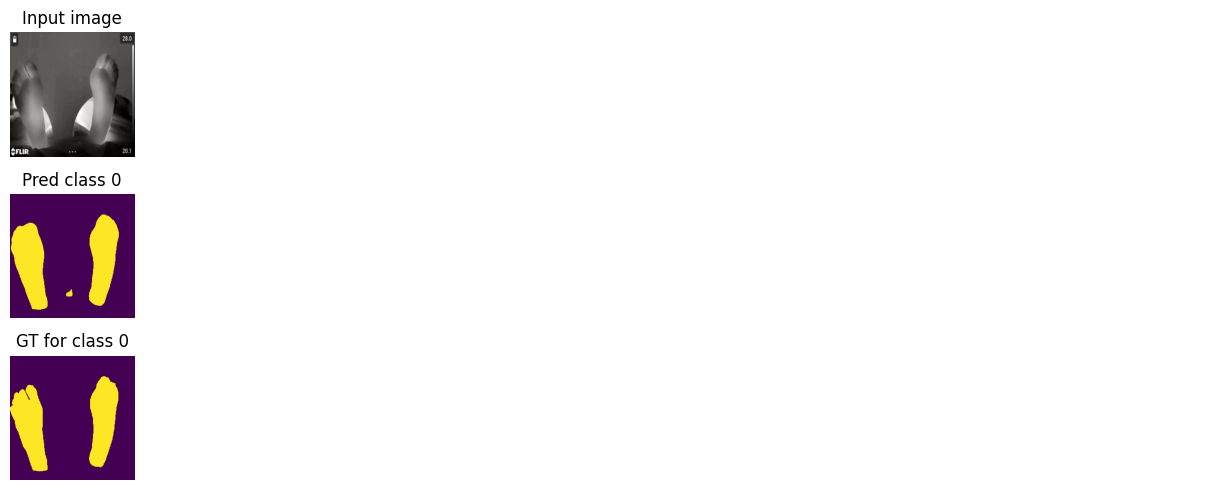

Train loss: 0.00524 | Time: 2m 55s | Val loss: 0.00565
Train_DICE_avg: 0.96203 | Train_Jaccard_avg: 0.92919 | Train_Sensitivity_avg: 0.96806 | Train_Specificity_avg: 0.98663 
Class 0 - Train_DICE: 0.96203 | Train_Jaccard: 0.92919 | Train_Sensitivity: 0.96806 | Train_Specificity: 0.98663 
Val_DICE_avg: 0.96238 | Val_Jaccard_avg: 0.92913 | Val_Sensitivity_avg: 0.97482 | Val_Specificity_avg: 0.97989 
Class 0 - Val_DICE: 0.96238 | Val_Jaccard: 0.92913 | Val_Sensitivity: 0.97482 | Val_Specificity: 0.97989 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.00498 | Time: 2m 59s | Val loss: 0.00525
Train_DICE_avg: 0.96583 | Train_Jaccard_avg: 0.93551 | Train_Sensitivity_avg: 0.97059 | Train_Specificity_avg: 0.98747 
Class 0 - Train_DICE: 0.96583 | Train_Jaccard: 0.93551 | Train_Sensitivity: 0.97059 | Train_Specificity: 0.98747 
Val_DICE_avg: 0.96475 | Val_Jaccard_avg: 0.93312 | Val_Sensitivity_avg: 0.97011 | Val_Specificity_avg: 0.98365 
Class 0 - Val_DICE: 0.96475 | Val_Jaccard: 0.93312 | Val_Sensitivity: 0.97011 | Val_Specificity: 0.98365 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.00497 | Time: 3m 3s | Val loss: 0.00521
Train_DICE_avg: 0.96409 | Train_Jaccard_avg: 0.93229 | Train_Sensitivity_avg: 0.97011 | Train_Specificity_avg: 0.98769 
Class 0 - Train_DICE: 0.96409 | Train_Jaccard: 0.93229 | Train_Sensitivity: 0.97011 | Train_Specificity: 0.98769 
Val_DICE_avg: 0.96412 | Val_Jaccard_avg: 0.93207 | Val_Sensitivity_avg: 0.97532 | Val_Specificity_avg: 0.98114 
Class 0 - Val_DICE: 0.96412 | Val_Jaccard: 0.93207 | Val_Sensitivity: 0.97532 | Val_Specificity: 0.98114 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.00481 | Time: 3m 6s | Val loss: 0.00548
Train_DICE_avg: 0.96537 | Train_Jaccard_avg: 0.93456 | Train_Sensitivity_avg: 0.97145 | Train_Specificity_avg: 0.98744 
Class 0 - Train_DICE: 0.96537 | Train_Jaccard: 0.93456 | Train_Sensitivity: 0.97145 | Train_Specificity: 0.98744 
Val_DICE_avg: 0.96255 | Val_Jaccard_avg: 0.92942 | Val_Sensitivity_avg: 0.97798 | Val_Specificity_avg: 0.97864 
Class 0 - Val_DICE: 0.96255 | Val_Jaccard: 0.92942 | Val_Sensitivity: 0.97798 | Val_Specificity: 0.97864 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.00472 | Time: 3m 10s | Val loss: 0.00560
Train_DICE_avg: 0.96417 | Train_Jaccard_avg: 0.93220 | Train_Sensitivity_avg: 0.97022 | Train_Specificity_avg: 0.98784 
Class 0 - Train_DICE: 0.96417 | Train_Jaccard: 0.93220 | Train_Sensitivity: 0.97022 | Train_Specificity: 0.98784 
Val_DICE_avg: 0.96271 | Val_Jaccard_avg: 0.93016 | Val_Sensitivity_avg: 0.97951 | Val_Specificity_avg: 0.97796 
Class 0 - Val_DICE: 0.96271 | Val_Jaccard: 0.93016 | Val_Sensitivity: 0.97951 | Val_Specificity: 0.97796 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


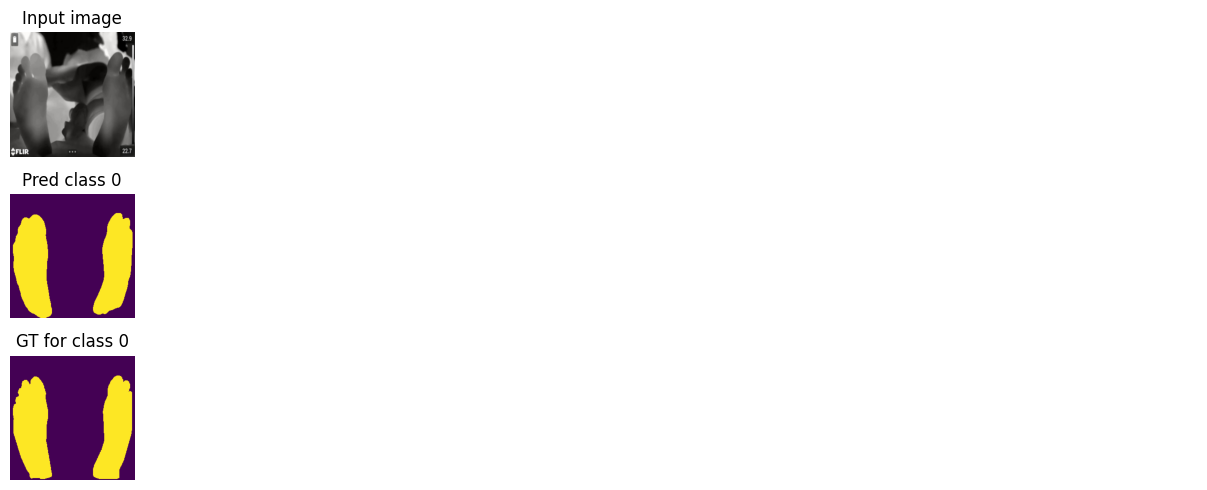

Train loss: 0.00469 | Time: 3m 14s | Val loss: 0.00556
Train_DICE_avg: 0.96563 | Train_Jaccard_avg: 0.93491 | Train_Sensitivity_avg: 0.97021 | Train_Specificity_avg: 0.98811 
Class 0 - Train_DICE: 0.96563 | Train_Jaccard: 0.93491 | Train_Sensitivity: 0.97021 | Train_Specificity: 0.98811 
Val_DICE_avg: 0.96334 | Val_Jaccard_avg: 0.93142 | Val_Sensitivity_avg: 0.97798 | Val_Specificity_avg: 0.97899 
Class 0 - Val_DICE: 0.96334 | Val_Jaccard: 0.93142 | Val_Sensitivity: 0.97798 | Val_Specificity: 0.97899 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.00485 | Time: 3m 18s | Val loss: 0.00558
Train_DICE_avg: 0.96536 | Train_Jaccard_avg: 0.93428 | Train_Sensitivity_avg: 0.97137 | Train_Specificity_avg: 0.98744 
Class 0 - Train_DICE: 0.96536 | Train_Jaccard: 0.93428 | Train_Sensitivity: 0.97137 | Train_Specificity: 0.98744 
Val_DICE_avg: 0.96326 | Val_Jaccard_avg: 0.93133 | Val_Sensitivity_avg: 0.97697 | Val_Specificity_avg: 0.97879 
Class 0 - Val_DICE: 0.96326 | Val_Jaccard: 0.93133 | Val_Sensitivity: 0.97697 | Val_Specificity: 0.97879 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.00480 | Time: 3m 22s | Val loss: 0.00535
Train_DICE_avg: 0.96557 | Train_Jaccard_avg: 0.93464 | Train_Sensitivity_avg: 0.97088 | Train_Specificity_avg: 0.98795 
Class 0 - Train_DICE: 0.96557 | Train_Jaccard: 0.93464 | Train_Sensitivity: 0.97088 | Train_Specificity: 0.98795 
Val_DICE_avg: 0.96478 | Val_Jaccard_avg: 0.93376 | Val_Sensitivity_avg: 0.97579 | Val_Specificity_avg: 0.98033 
Class 0 - Val_DICE: 0.96478 | Val_Jaccard: 0.93376 | Val_Sensitivity: 0.97579 | Val_Specificity: 0.98033 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.00465 | Time: 3m 26s | Val loss: 0.00520
Train_DICE_avg: 0.96534 | Train_Jaccard_avg: 0.93456 | Train_Sensitivity_avg: 0.97127 | Train_Specificity_avg: 0.98822 
Class 0 - Train_DICE: 0.96534 | Train_Jaccard: 0.93456 | Train_Sensitivity: 0.97127 | Train_Specificity: 0.98822 
Val_DICE_avg: 0.96536 | Val_Jaccard_avg: 0.93476 | Val_Sensitivity_avg: 0.97589 | Val_Specificity_avg: 0.98104 
Class 0 - Val_DICE: 0.96536 | Val_Jaccard: 0.93476 | Val_Sensitivity: 0.97589 | Val_Specificity: 0.98104 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.00455 | Time: 3m 29s | Val loss: 0.00509
Train_DICE_avg: 0.96558 | Train_Jaccard_avg: 0.93549 | Train_Sensitivity_avg: 0.96992 | Train_Specificity_avg: 0.98875 
Class 0 - Train_DICE: 0.96558 | Train_Jaccard: 0.93549 | Train_Sensitivity: 0.96992 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.96594 | Val_Jaccard_avg: 0.93568 | Val_Sensitivity_avg: 0.97531 | Val_Specificity_avg: 0.98184 
Class 0 - Val_DICE: 0.96594 | Val_Jaccard: 0.93568 | Val_Sensitivity: 0.97531 | Val_Specificity: 0.98184 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


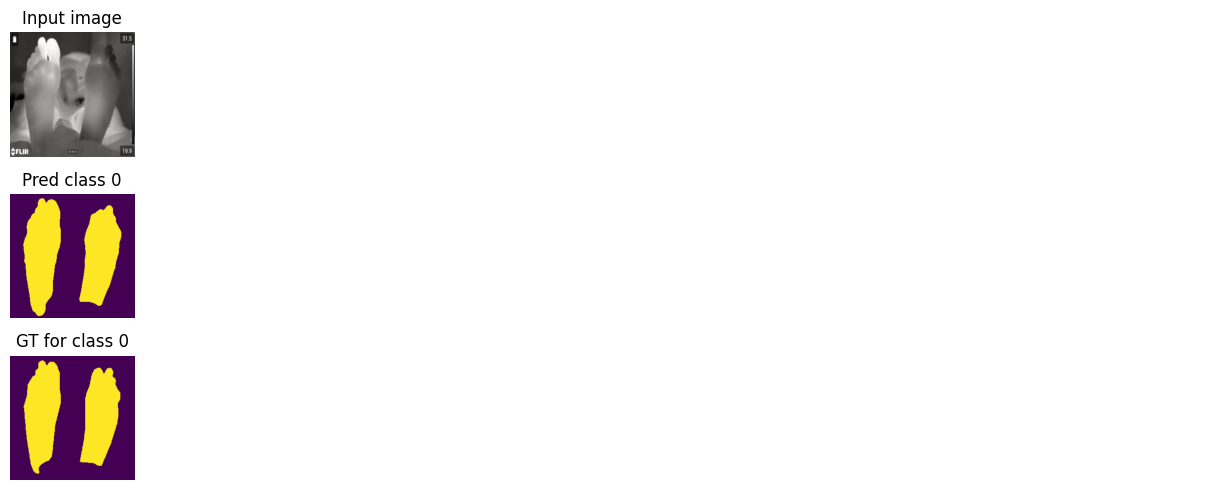

Train loss: 0.00445 | Time: 3m 34s | Val loss: 0.00498
Train_DICE_avg: 0.96773 | Train_Jaccard_avg: 0.93829 | Train_Sensitivity_avg: 0.97314 | Train_Specificity_avg: 0.98835 
Class 0 - Train_DICE: 0.96773 | Train_Jaccard: 0.93829 | Train_Sensitivity: 0.97314 | Train_Specificity: 0.98835 
Val_DICE_avg: 0.96664 | Val_Jaccard_avg: 0.93687 | Val_Sensitivity_avg: 0.97549 | Val_Specificity_avg: 0.98239 
Class 0 - Val_DICE: 0.96664 | Val_Jaccard: 0.93687 | Val_Sensitivity: 0.97549 | Val_Specificity: 0.98239 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.00458 | Time: 3m 37s | Val loss: 0.00549
Train_DICE_avg: 0.96737 | Train_Jaccard_avg: 0.93852 | Train_Sensitivity_avg: 0.97412 | Train_Specificity_avg: 0.98792 
Class 0 - Train_DICE: 0.96737 | Train_Jaccard: 0.93852 | Train_Sensitivity: 0.97412 | Train_Specificity: 0.98792 
Val_DICE_avg: 0.96405 | Val_Jaccard_avg: 0.93275 | Val_Sensitivity_avg: 0.97980 | Val_Specificity_avg: 0.97874 
Class 0 - Val_DICE: 0.96405 | Val_Jaccard: 0.93275 | Val_Sensitivity: 0.97980 | Val_Specificity: 0.97874 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.00433 | Time: 3m 41s | Val loss: 0.00547
Train_DICE_avg: 0.96825 | Train_Jaccard_avg: 0.93945 | Train_Sensitivity_avg: 0.97268 | Train_Specificity_avg: 0.98908 
Class 0 - Train_DICE: 0.96825 | Train_Jaccard: 0.93945 | Train_Sensitivity: 0.97268 | Train_Specificity: 0.98908 
Val_DICE_avg: 0.96473 | Val_Jaccard_avg: 0.93390 | Val_Sensitivity_avg: 0.97857 | Val_Specificity_avg: 0.97961 
Class 0 - Val_DICE: 0.96473 | Val_Jaccard: 0.93390 | Val_Sensitivity: 0.97857 | Val_Specificity: 0.97961 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.00459 | Time: 3m 45s | Val loss: 0.00538
Train_DICE_avg: 0.96605 | Train_Jaccard_avg: 0.93537 | Train_Sensitivity_avg: 0.97219 | Train_Specificity_avg: 0.98754 
Class 0 - Train_DICE: 0.96605 | Train_Jaccard: 0.93537 | Train_Sensitivity: 0.97219 | Train_Specificity: 0.98754 
Val_DICE_avg: 0.96525 | Val_Jaccard_avg: 0.93467 | Val_Sensitivity_avg: 0.97676 | Val_Specificity_avg: 0.98054 
Class 0 - Val_DICE: 0.96525 | Val_Jaccard: 0.93467 | Val_Sensitivity: 0.97676 | Val_Specificity: 0.98054 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.00435 | Time: 3m 48s | Val loss: 0.00534
Train_DICE_avg: 0.96834 | Train_Jaccard_avg: 0.93960 | Train_Sensitivity_avg: 0.97288 | Train_Specificity_avg: 0.98885 
Class 0 - Train_DICE: 0.96834 | Train_Jaccard: 0.93960 | Train_Sensitivity: 0.97288 | Train_Specificity: 0.98885 
Val_DICE_avg: 0.96508 | Val_Jaccard_avg: 0.93436 | Val_Sensitivity_avg: 0.97694 | Val_Specificity_avg: 0.98036 
Class 0 - Val_DICE: 0.96508 | Val_Jaccard: 0.93436 | Val_Sensitivity: 0.97694 | Val_Specificity: 0.98036 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


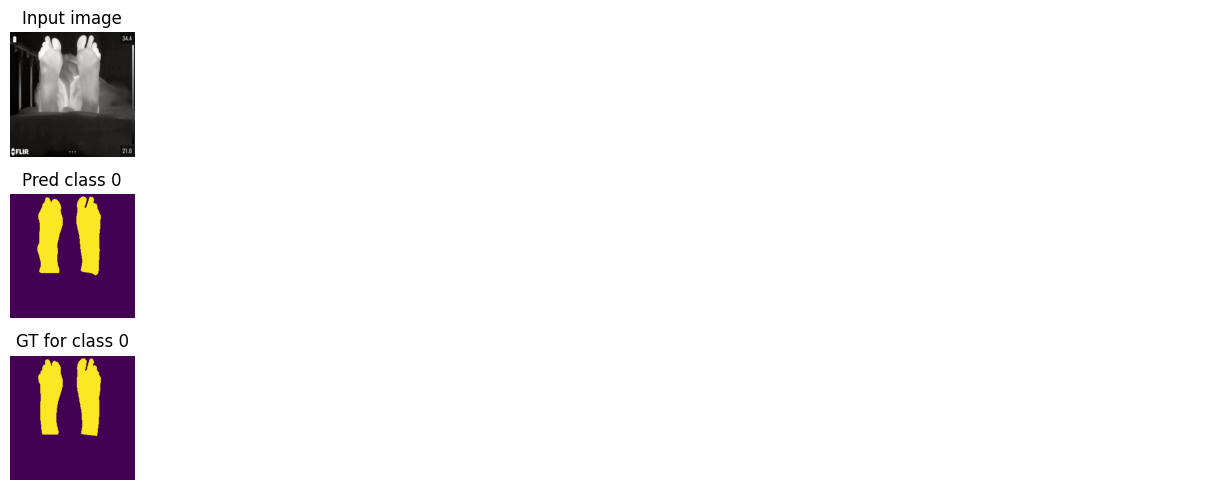

Train loss: 0.00442 | Time: 3m 52s | Val loss: 0.00524
Train_DICE_avg: 0.96806 | Train_Jaccard_avg: 0.93908 | Train_Sensitivity_avg: 0.97125 | Train_Specificity_avg: 0.98938 
Class 0 - Train_DICE: 0.96806 | Train_Jaccard: 0.93908 | Train_Sensitivity: 0.97125 | Train_Specificity: 0.98938 
Val_DICE_avg: 0.96508 | Val_Jaccard_avg: 0.93428 | Val_Sensitivity_avg: 0.97710 | Val_Specificity_avg: 0.98050 
Class 0 - Val_DICE: 0.96508 | Val_Jaccard: 0.93428 | Val_Sensitivity: 0.97710 | Val_Specificity: 0.98050 


Training DICE,▁▂▃▄▅▆▆▆▇▇▇▇▇▇▇▇█████▇██████████████████
Training Jaccard,▁▂▃▃▄▅▅▅▆▆▇▇▇▇▇▇▇▇▇▇█▇▇█████████████████
Training Loss,█▇▆▅▅▄▅▄▄▃▃▃▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇████████████████████████
Training Specificity,▁▂▃▃▄▅▅▅▅▆▇▇▇▇▇▇▇▇█▇▇███████████████████
Validation DICE,▁▁▅▆▇▇▆▇▇▇██████████████████████████████
Validation Jaccard,▁▁▄▅▆▆▆▇▇▇▇▇▇▇▇▇████████████████████████
Validation Loss,█▇▄▄▃▃▄▂▂▂▂▂▂▂▂▁▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,██▅▁▂▄▇▅▅▆▆▇▅▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Validation Specificity,▁▁▃▅▇▇▇▇▇▇▇▇▇▇██████▇███████████████████
Training DICE,0.96806



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Global Performance Metrics:
Loss mean: 0.00923, std: 0.00000
Dice Coefficient mean: 0.93848, std: 0.08327
Jaccard Index mean: 0.89317, std: 0.11660
Sensitivity mean: 0.95957, std: 0.07809
Specificity mean: 0.97983, std: 0.01619

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93848, std: 0.08327
Jaccard mean: 0.89317, std: 0.11660
Sensitivity mean: 0.95957, std: 0.07809
Specificity mean: 0.97983, std: 0.01619


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-UNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.72 GB
GPU Memory - Reserved: 1.64 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


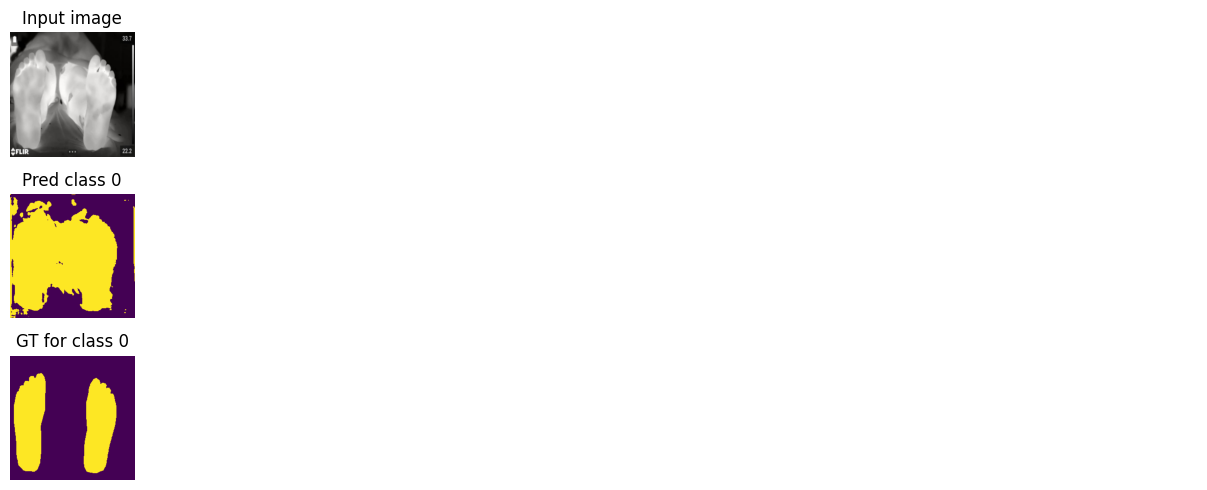

Train loss: 0.67519 | Time: 0m 4s | Val loss: 0.70760
Train_DICE_avg: 0.48049 | Train_Jaccard_avg: 0.33038 | Train_Sensitivity_avg: 0.34971 | Train_Specificity_avg: 0.90258 
Class 0 - Train_DICE: 0.48049 | Train_Jaccard: 0.33038 | Train_Sensitivity: 0.34971 | Train_Specificity: 0.90258 
Val_DICE_avg: 0.55853 | Val_Jaccard_avg: 0.42145 | Val_Sensitivity_avg: 0.47787 | Val_Specificity_avg: 0.89449 
Class 0 - Val_DICE: 0.55853 | Val_Jaccard: 0.42145 | Val_Sensitivity: 0.47787 | Val_Specificity: 0.89449 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.60233 | Time: 0m 7s | Val loss: 0.69764
Train_DICE_avg: 0.56388 | Train_Jaccard_avg: 0.40915 | Train_Sensitivity_avg: 0.43556 | Train_Specificity_avg: 0.94933 
Class 0 - Train_DICE: 0.56388 | Train_Jaccard: 0.40915 | Train_Sensitivity: 0.43556 | Train_Specificity: 0.94933 
Val_DICE_avg: 0.59109 | Val_Jaccard_avg: 0.46101 | Val_Sensitivity_avg: 0.58758 | Val_Specificity_avg: 0.87346 
Class 0 - Val_DICE: 0.59109 | Val_Jaccard: 0.46101 | Val_Sensitivity: 0.58758 | Val_Specificity: 0.87346 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.55800 | Time: 0m 11s | Val loss: 0.61589
Train_DICE_avg: 0.61158 | Train_Jaccard_avg: 0.45782 | Train_Sensitivity_avg: 0.48282 | Train_Specificity_avg: 0.95875 
Class 0 - Train_DICE: 0.61158 | Train_Jaccard: 0.45782 | Train_Sensitivity: 0.48282 | Train_Specificity: 0.95875 
Val_DICE_avg: 0.70920 | Val_Jaccard_avg: 0.56746 | Val_Sensitivity_avg: 0.60718 | Val_Specificity_avg: 0.96179 
Class 0 - Val_DICE: 0.70920 | Val_Jaccard: 0.56746 | Val_Sensitivity: 0.60718 | Val_Specificity: 0.96179 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.52955 | Time: 0m 15s | Val loss: 0.52250
Train_DICE_avg: 0.64636 | Train_Jaccard_avg: 0.49437 | Train_Sensitivity_avg: 0.52233 | Train_Specificity_avg: 0.96182 
Class 0 - Train_DICE: 0.64636 | Train_Jaccard: 0.49437 | Train_Sensitivity: 0.52233 | Train_Specificity: 0.96182 
Val_DICE_avg: 0.71640 | Val_Jaccard_avg: 0.57574 | Val_Sensitivity_avg: 0.60049 | Val_Specificity_avg: 0.97330 
Class 0 - Val_DICE: 0.71640 | Val_Jaccard: 0.57574 | Val_Sensitivity: 0.60049 | Val_Specificity: 0.97330 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.50739 | Time: 0m 19s | Val loss: 0.46984
Train_DICE_avg: 0.68560 | Train_Jaccard_avg: 0.53788 | Train_Sensitivity_avg: 0.57242 | Train_Specificity_avg: 0.96568 
Class 0 - Train_DICE: 0.68560 | Train_Jaccard: 0.53788 | Train_Sensitivity: 0.57242 | Train_Specificity: 0.96568 
Val_DICE_avg: 0.77417 | Val_Jaccard_avg: 0.64580 | Val_Sensitivity_avg: 0.69782 | Val_Specificity_avg: 0.96261 
Class 0 - Val_DICE: 0.77417 | Val_Jaccard: 0.64580 | Val_Sensitivity: 0.69782 | Val_Specificity: 0.96261 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


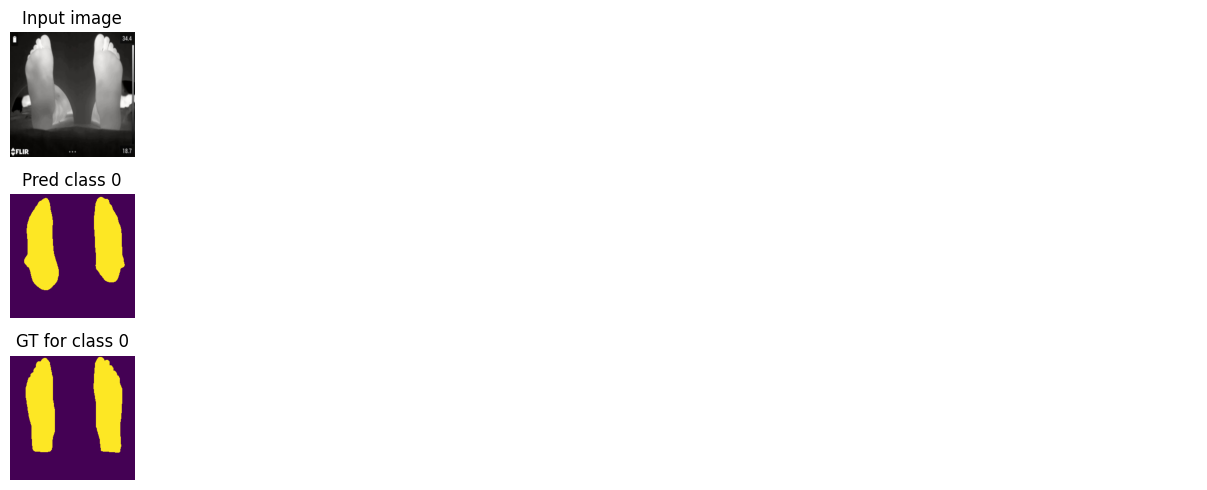

Train loss: 0.49111 | Time: 0m 23s | Val loss: 0.44098
Train_DICE_avg: 0.71621 | Train_Jaccard_avg: 0.57488 | Train_Sensitivity_avg: 0.60867 | Train_Specificity_avg: 0.96896 
Class 0 - Train_DICE: 0.71621 | Train_Jaccard: 0.57488 | Train_Sensitivity: 0.60867 | Train_Specificity: 0.96896 
Val_DICE_avg: 0.80719 | Val_Jaccard_avg: 0.68828 | Val_Sensitivity_avg: 0.75605 | Val_Specificity_avg: 0.95709 
Class 0 - Val_DICE: 0.80719 | Val_Jaccard: 0.68828 | Val_Sensitivity: 0.75605 | Val_Specificity: 0.95709 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.47882 | Time: 0m 26s | Val loss: 0.41696
Train_DICE_avg: 0.73284 | Train_Jaccard_avg: 0.59575 | Train_Sensitivity_avg: 0.62827 | Train_Specificity_avg: 0.97177 
Class 0 - Train_DICE: 0.73284 | Train_Jaccard: 0.59575 | Train_Sensitivity: 0.62827 | Train_Specificity: 0.97177 
Val_DICE_avg: 0.83094 | Val_Jaccard_avg: 0.71961 | Val_Sensitivity_avg: 0.78885 | Val_Specificity_avg: 0.95946 
Class 0 - Val_DICE: 0.83094 | Val_Jaccard: 0.71961 | Val_Sensitivity: 0.78885 | Val_Specificity: 0.95946 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.46597 | Time: 0m 30s | Val loss: 0.40185
Train_DICE_avg: 0.75437 | Train_Jaccard_avg: 0.62390 | Train_Sensitivity_avg: 0.65308 | Train_Specificity_avg: 0.97658 
Class 0 - Train_DICE: 0.75437 | Train_Jaccard: 0.62390 | Train_Sensitivity: 0.65308 | Train_Specificity: 0.97658 
Val_DICE_avg: 0.85432 | Val_Jaccard_avg: 0.75168 | Val_Sensitivity_avg: 0.84787 | Val_Specificity_avg: 0.95021 
Class 0 - Val_DICE: 0.85432 | Val_Jaccard: 0.75168 | Val_Sensitivity: 0.84787 | Val_Specificity: 0.95021 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.45511 | Time: 0m 34s | Val loss: 0.39423
Train_DICE_avg: 0.76301 | Train_Jaccard_avg: 0.63880 | Train_Sensitivity_avg: 0.66386 | Train_Specificity_avg: 0.98042 
Class 0 - Train_DICE: 0.76301 | Train_Jaccard: 0.63880 | Train_Sensitivity: 0.66386 | Train_Specificity: 0.98042 
Val_DICE_avg: 0.86447 | Val_Jaccard_avg: 0.76785 | Val_Sensitivity_avg: 0.86041 | Val_Specificity_avg: 0.95012 
Class 0 - Val_DICE: 0.86447 | Val_Jaccard: 0.76785 | Val_Sensitivity: 0.86041 | Val_Specificity: 0.95012 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.44800 | Time: 0m 38s | Val loss: 0.38661
Train_DICE_avg: 0.77520 | Train_Jaccard_avg: 0.65479 | Train_Sensitivity_avg: 0.68186 | Train_Specificity_avg: 0.98053 
Class 0 - Train_DICE: 0.77520 | Train_Jaccard: 0.65479 | Train_Sensitivity: 0.68186 | Train_Specificity: 0.98053 
Val_DICE_avg: 0.87472 | Val_Jaccard_avg: 0.78374 | Val_Sensitivity_avg: 0.84306 | Val_Specificity_avg: 0.96438 
Class 0 - Val_DICE: 0.87472 | Val_Jaccard: 0.78374 | Val_Sensitivity: 0.84306 | Val_Specificity: 0.96438 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


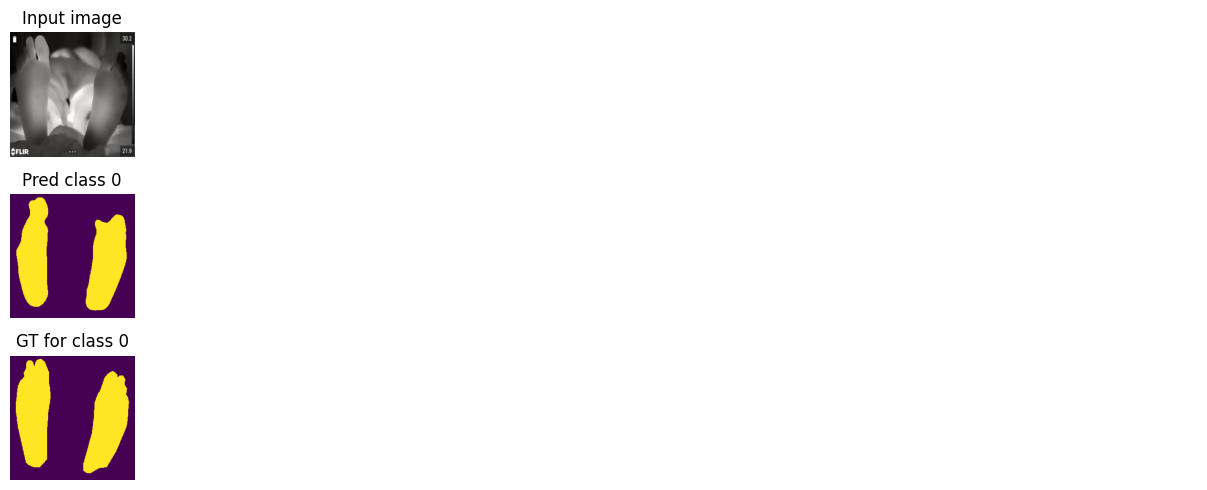

Train loss: 0.44944 | Time: 0m 42s | Val loss: 0.37236
Train_DICE_avg: 0.77222 | Train_Jaccard_avg: 0.64871 | Train_Sensitivity_avg: 0.68488 | Train_Specificity_avg: 0.97534 
Class 0 - Train_DICE: 0.77222 | Train_Jaccard: 0.64871 | Train_Sensitivity: 0.68488 | Train_Specificity: 0.97534 
Val_DICE_avg: 0.84971 | Val_Jaccard_avg: 0.75091 | Val_Sensitivity_avg: 0.90161 | Val_Specificity_avg: 0.92913 
Class 0 - Val_DICE: 0.84971 | Val_Jaccard: 0.75091 | Val_Sensitivity: 0.90161 | Val_Specificity: 0.92913 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.43693 | Time: 0m 45s | Val loss: 0.37690
Train_DICE_avg: 0.78801 | Train_Jaccard_avg: 0.67497 | Train_Sensitivity_avg: 0.70164 | Train_Specificity_avg: 0.98148 
Class 0 - Train_DICE: 0.78801 | Train_Jaccard: 0.67497 | Train_Sensitivity: 0.70164 | Train_Specificity: 0.98148 
Val_DICE_avg: 0.88725 | Val_Jaccard_avg: 0.80441 | Val_Sensitivity_avg: 0.85058 | Val_Specificity_avg: 0.97262 
Class 0 - Val_DICE: 0.88725 | Val_Jaccard: 0.80441 | Val_Sensitivity: 0.85058 | Val_Specificity: 0.97262 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.42789 | Time: 0m 49s | Val loss: 0.37095
Train_DICE_avg: 0.80640 | Train_Jaccard_avg: 0.70120 | Train_Sensitivity_avg: 0.72924 | Train_Specificity_avg: 0.98203 
Class 0 - Train_DICE: 0.80640 | Train_Jaccard: 0.70120 | Train_Sensitivity: 0.72924 | Train_Specificity: 0.98203 
Val_DICE_avg: 0.88334 | Val_Jaccard_avg: 0.79941 | Val_Sensitivity_avg: 0.83347 | Val_Specificity_avg: 0.97824 
Class 0 - Val_DICE: 0.88334 | Val_Jaccard: 0.79941 | Val_Sensitivity: 0.83347 | Val_Specificity: 0.97824 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.42199 | Time: 0m 53s | Val loss: 0.35029
Train_DICE_avg: 0.82121 | Train_Jaccard_avg: 0.71781 | Train_Sensitivity_avg: 0.74472 | Train_Specificity_avg: 0.98231 
Class 0 - Train_DICE: 0.82121 | Train_Jaccard: 0.71781 | Train_Sensitivity: 0.74472 | Train_Specificity: 0.98231 
Val_DICE_avg: 0.90223 | Val_Jaccard_avg: 0.82820 | Val_Sensitivity_avg: 0.86074 | Val_Specificity_avg: 0.97826 
Class 0 - Val_DICE: 0.90223 | Val_Jaccard: 0.82820 | Val_Sensitivity: 0.86074 | Val_Specificity: 0.97826 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.41101 | Time: 0m 57s | Val loss: 0.33888
Train_DICE_avg: 0.83842 | Train_Jaccard_avg: 0.74533 | Train_Sensitivity_avg: 0.77285 | Train_Specificity_avg: 0.98345 
Class 0 - Train_DICE: 0.83842 | Train_Jaccard: 0.74533 | Train_Sensitivity: 0.77285 | Train_Specificity: 0.98345 
Val_DICE_avg: 0.91151 | Val_Jaccard_avg: 0.84315 | Val_Sensitivity_avg: 0.87798 | Val_Specificity_avg: 0.97823 
Class 0 - Val_DICE: 0.91151 | Val_Jaccard: 0.84315 | Val_Sensitivity: 0.87798 | Val_Specificity: 0.97823 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


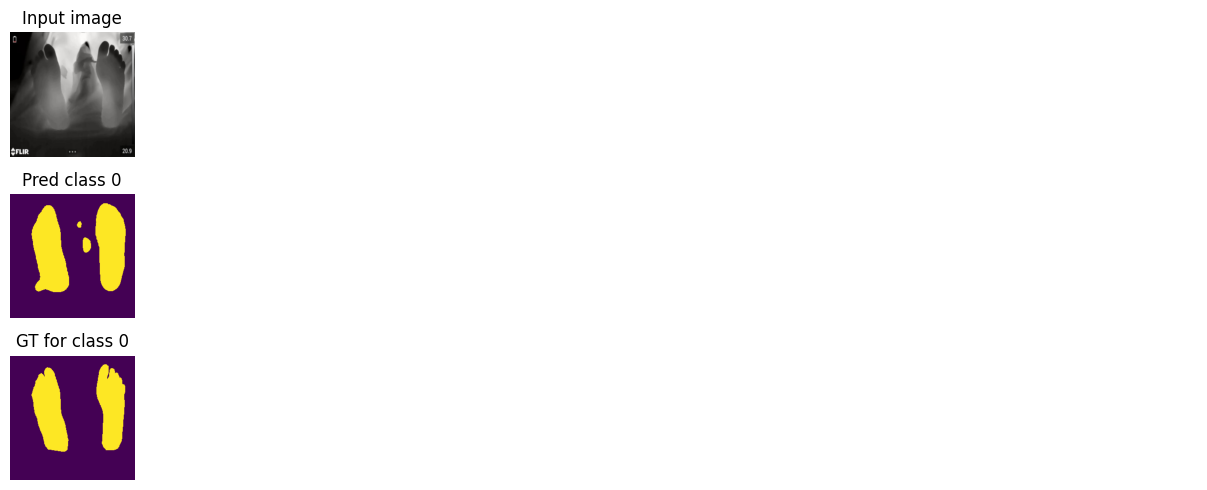

Train loss: 0.40599 | Time: 1m 1s | Val loss: 0.33603
Train_DICE_avg: 0.84338 | Train_Jaccard_avg: 0.75104 | Train_Sensitivity_avg: 0.77682 | Train_Specificity_avg: 0.98395 
Class 0 - Train_DICE: 0.84338 | Train_Jaccard: 0.75104 | Train_Sensitivity: 0.77682 | Train_Specificity: 0.98395 
Val_DICE_avg: 0.92334 | Val_Jaccard_avg: 0.86106 | Val_Sensitivity_avg: 0.90095 | Val_Specificity_avg: 0.97810 
Class 0 - Val_DICE: 0.92334 | Val_Jaccard: 0.86106 | Val_Sensitivity: 0.90095 | Val_Specificity: 0.97810 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.40458 | Time: 1m 4s | Val loss: 0.33724
Train_DICE_avg: 0.85118 | Train_Jaccard_avg: 0.76120 | Train_Sensitivity_avg: 0.79028 | Train_Specificity_avg: 0.98283 
Class 0 - Train_DICE: 0.85118 | Train_Jaccard: 0.76120 | Train_Sensitivity: 0.79028 | Train_Specificity: 0.98283 
Val_DICE_avg: 0.91280 | Val_Jaccard_avg: 0.84713 | Val_Sensitivity_avg: 0.87470 | Val_Specificity_avg: 0.98204 
Class 0 - Val_DICE: 0.91280 | Val_Jaccard: 0.84713 | Val_Sensitivity: 0.87470 | Val_Specificity: 0.98204 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.39847 | Time: 1m 8s | Val loss: 0.32704
Train_DICE_avg: 0.86081 | Train_Jaccard_avg: 0.77330 | Train_Sensitivity_avg: 0.79967 | Train_Specificity_avg: 0.98385 
Class 0 - Train_DICE: 0.86081 | Train_Jaccard: 0.77330 | Train_Sensitivity: 0.79967 | Train_Specificity: 0.98385 
Val_DICE_avg: 0.92634 | Val_Jaccard_avg: 0.86677 | Val_Sensitivity_avg: 0.89612 | Val_Specificity_avg: 0.98106 
Class 0 - Val_DICE: 0.92634 | Val_Jaccard: 0.86677 | Val_Sensitivity: 0.89612 | Val_Specificity: 0.98106 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.39390 | Time: 1m 12s | Val loss: 0.31625
Train_DICE_avg: 0.86370 | Train_Jaccard_avg: 0.77990 | Train_Sensitivity_avg: 0.80733 | Train_Specificity_avg: 0.98415 
Class 0 - Train_DICE: 0.86370 | Train_Jaccard: 0.77990 | Train_Sensitivity: 0.80733 | Train_Specificity: 0.98415 
Val_DICE_avg: 0.93004 | Val_Jaccard_avg: 0.87316 | Val_Sensitivity_avg: 0.91062 | Val_Specificity_avg: 0.97822 
Class 0 - Val_DICE: 0.93004 | Val_Jaccard: 0.87316 | Val_Sensitivity: 0.91062 | Val_Specificity: 0.97822 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.39078 | Time: 1m 16s | Val loss: 0.30207
Train_DICE_avg: 0.86353 | Train_Jaccard_avg: 0.77947 | Train_Sensitivity_avg: 0.80513 | Train_Specificity_avg: 0.98515 
Class 0 - Train_DICE: 0.86353 | Train_Jaccard: 0.77947 | Train_Sensitivity: 0.80513 | Train_Specificity: 0.98515 
Val_DICE_avg: 0.93616 | Val_Jaccard_avg: 0.88472 | Val_Sensitivity_avg: 0.92966 | Val_Specificity_avg: 0.97429 
Class 0 - Val_DICE: 0.93616 | Val_Jaccard: 0.88472 | Val_Sensitivity: 0.92966 | Val_Specificity: 0.97429 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


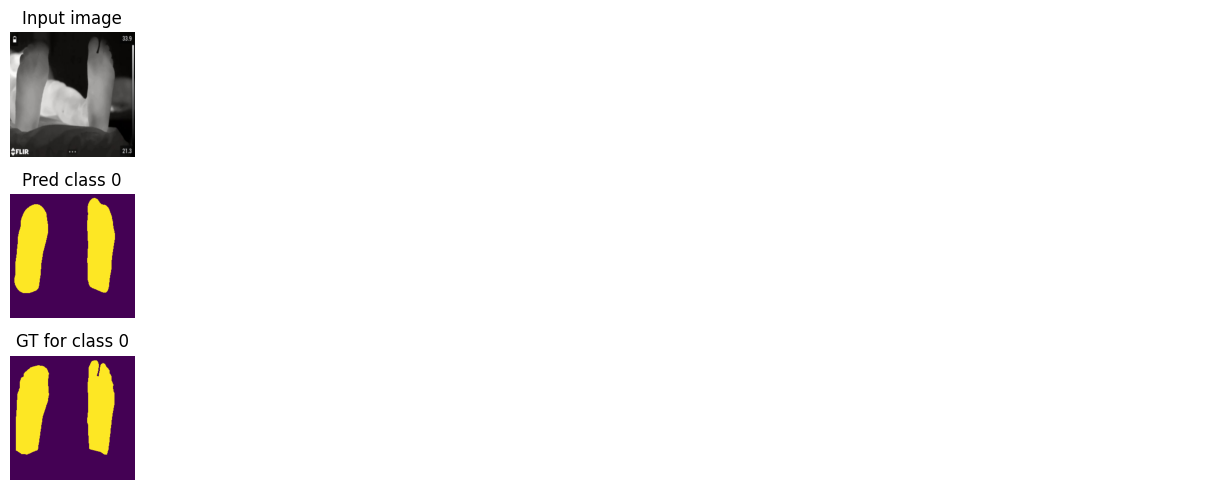

Train loss: 0.40005 | Time: 1m 20s | Val loss: 0.30299
Train_DICE_avg: 0.86429 | Train_Jaccard_avg: 0.77398 | Train_Sensitivity_avg: 0.81819 | Train_Specificity_avg: 0.97590 
Class 0 - Train_DICE: 0.86429 | Train_Jaccard: 0.77398 | Train_Sensitivity: 0.81819 | Train_Specificity: 0.97590 
Val_DICE_avg: 0.92257 | Val_Jaccard_avg: 0.86242 | Val_Sensitivity_avg: 0.94087 | Val_Specificity_avg: 0.96684 
Class 0 - Val_DICE: 0.92257 | Val_Jaccard: 0.86242 | Val_Sensitivity: 0.94087 | Val_Specificity: 0.96684 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.38935 | Time: 1m 24s | Val loss: 0.29050
Train_DICE_avg: 0.84435 | Train_Jaccard_avg: 0.75926 | Train_Sensitivity_avg: 0.78490 | Train_Specificity_avg: 0.98585 
Class 0 - Train_DICE: 0.84435 | Train_Jaccard: 0.75926 | Train_Sensitivity: 0.78490 | Train_Specificity: 0.98585 
Val_DICE_avg: 0.93383 | Val_Jaccard_avg: 0.88199 | Val_Sensitivity_avg: 0.90488 | Val_Specificity_avg: 0.98584 
Class 0 - Val_DICE: 0.93383 | Val_Jaccard: 0.88199 | Val_Sensitivity: 0.90488 | Val_Specificity: 0.98584 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.38115 | Time: 1m 27s | Val loss: 0.29282
Train_DICE_avg: 0.86959 | Train_Jaccard_avg: 0.79162 | Train_Sensitivity_avg: 0.81346 | Train_Specificity_avg: 0.98728 
Class 0 - Train_DICE: 0.86959 | Train_Jaccard: 0.79162 | Train_Sensitivity: 0.81346 | Train_Specificity: 0.98728 
Val_DICE_avg: 0.93974 | Val_Jaccard_avg: 0.88877 | Val_Sensitivity_avg: 0.91551 | Val_Specificity_avg: 0.98450 
Class 0 - Val_DICE: 0.93974 | Val_Jaccard: 0.88877 | Val_Sensitivity: 0.91551 | Val_Specificity: 0.98450 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.37638 | Time: 1m 31s | Val loss: 0.28507
Train_DICE_avg: 0.88536 | Train_Jaccard_avg: 0.81091 | Train_Sensitivity_avg: 0.83855 | Train_Specificity_avg: 0.98518 
Class 0 - Train_DICE: 0.88536 | Train_Jaccard: 0.81091 | Train_Sensitivity: 0.83855 | Train_Specificity: 0.98518 
Val_DICE_avg: 0.94389 | Val_Jaccard_avg: 0.89627 | Val_Sensitivity_avg: 0.94120 | Val_Specificity_avg: 0.97855 
Class 0 - Val_DICE: 0.94389 | Val_Jaccard: 0.89627 | Val_Sensitivity: 0.94120 | Val_Specificity: 0.97855 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.37688 | Time: 1m 35s | Val loss: 0.28721
Train_DICE_avg: 0.88274 | Train_Jaccard_avg: 0.80640 | Train_Sensitivity_avg: 0.83306 | Train_Specificity_avg: 0.98599 
Class 0 - Train_DICE: 0.88274 | Train_Jaccard: 0.80640 | Train_Sensitivity: 0.83306 | Train_Specificity: 0.98599 
Val_DICE_avg: 0.93906 | Val_Jaccard_avg: 0.88936 | Val_Sensitivity_avg: 0.90351 | Val_Specificity_avg: 0.99151 
Class 0 - Val_DICE: 0.93906 | Val_Jaccard: 0.88936 | Val_Sensitivity: 0.90351 | Val_Specificity: 0.99151 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


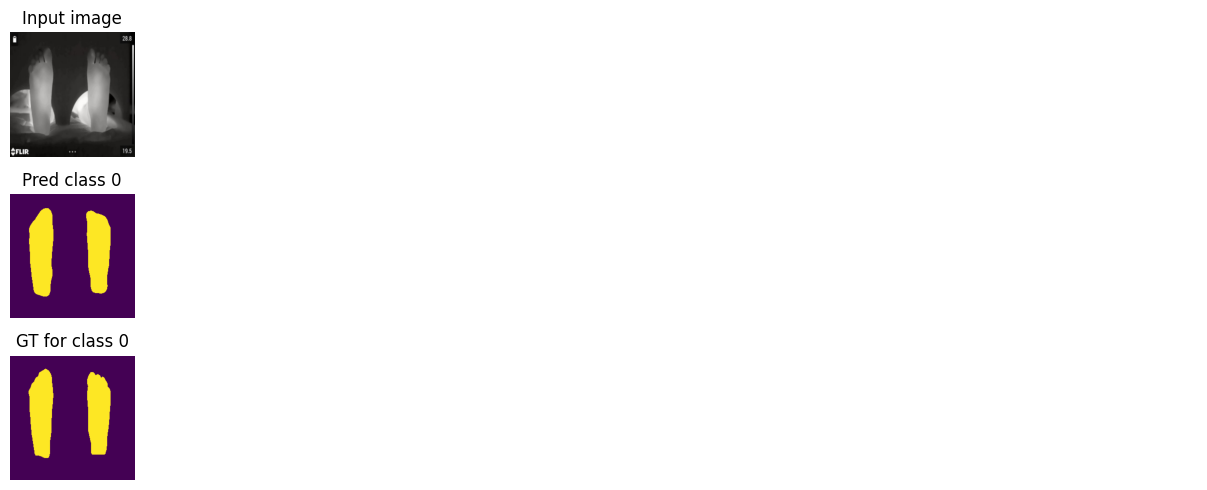

Train loss: 0.37009 | Time: 1m 39s | Val loss: 0.27463
Train_DICE_avg: 0.89089 | Train_Jaccard_avg: 0.81751 | Train_Sensitivity_avg: 0.84197 | Train_Specificity_avg: 0.98764 
Class 0 - Train_DICE: 0.89089 | Train_Jaccard: 0.81751 | Train_Sensitivity: 0.84197 | Train_Specificity: 0.98764 
Val_DICE_avg: 0.95201 | Val_Jaccard_avg: 0.91039 | Val_Sensitivity_avg: 0.93645 | Val_Specificity_avg: 0.98612 
Class 0 - Val_DICE: 0.95201 | Val_Jaccard: 0.91039 | Val_Sensitivity: 0.93645 | Val_Specificity: 0.98612 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.36734 | Time: 1m 43s | Val loss: 0.25816
Train_DICE_avg: 0.89465 | Train_Jaccard_avg: 0.82385 | Train_Sensitivity_avg: 0.84985 | Train_Specificity_avg: 0.98648 
Class 0 - Train_DICE: 0.89465 | Train_Jaccard: 0.82385 | Train_Sensitivity: 0.84985 | Train_Specificity: 0.98648 
Val_DICE_avg: 0.95367 | Val_Jaccard_avg: 0.91334 | Val_Sensitivity_avg: 0.94020 | Val_Specificity_avg: 0.98541 
Class 0 - Val_DICE: 0.95367 | Val_Jaccard: 0.91334 | Val_Sensitivity: 0.94020 | Val_Specificity: 0.98541 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.36506 | Time: 1m 47s | Val loss: 0.26705
Train_DICE_avg: 0.89638 | Train_Jaccard_avg: 0.82784 | Train_Sensitivity_avg: 0.84965 | Train_Specificity_avg: 0.98805 
Class 0 - Train_DICE: 0.89638 | Train_Jaccard: 0.82784 | Train_Sensitivity: 0.84965 | Train_Specificity: 0.98805 
Val_DICE_avg: 0.95243 | Val_Jaccard_avg: 0.91139 | Val_Sensitivity_avg: 0.94300 | Val_Specificity_avg: 0.98341 
Class 0 - Val_DICE: 0.95243 | Val_Jaccard: 0.91139 | Val_Sensitivity: 0.94300 | Val_Specificity: 0.98341 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.35717 | Time: 1m 50s | Val loss: 0.27724
Train_DICE_avg: 0.90368 | Train_Jaccard_avg: 0.83986 | Train_Sensitivity_avg: 0.85841 | Train_Specificity_avg: 0.99009 
Class 0 - Train_DICE: 0.90368 | Train_Jaccard: 0.83986 | Train_Sensitivity: 0.85841 | Train_Specificity: 0.99009 
Val_DICE_avg: 0.94768 | Val_Jaccard_avg: 0.90334 | Val_Sensitivity_avg: 0.92528 | Val_Specificity_avg: 0.98668 
Class 0 - Val_DICE: 0.94768 | Val_Jaccard: 0.90334 | Val_Sensitivity: 0.92528 | Val_Specificity: 0.98668 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.35574 | Time: 1m 54s | Val loss: 0.25629
Train_DICE_avg: 0.90546 | Train_Jaccard_avg: 0.84143 | Train_Sensitivity_avg: 0.86454 | Train_Specificity_avg: 0.98817 
Class 0 - Train_DICE: 0.90546 | Train_Jaccard: 0.84143 | Train_Sensitivity: 0.86454 | Train_Specificity: 0.98817 
Val_DICE_avg: 0.95376 | Val_Jaccard_avg: 0.91403 | Val_Sensitivity_avg: 0.95542 | Val_Specificity_avg: 0.97964 
Class 0 - Val_DICE: 0.95376 | Val_Jaccard: 0.91403 | Val_Sensitivity: 0.95542 | Val_Specificity: 0.97964 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


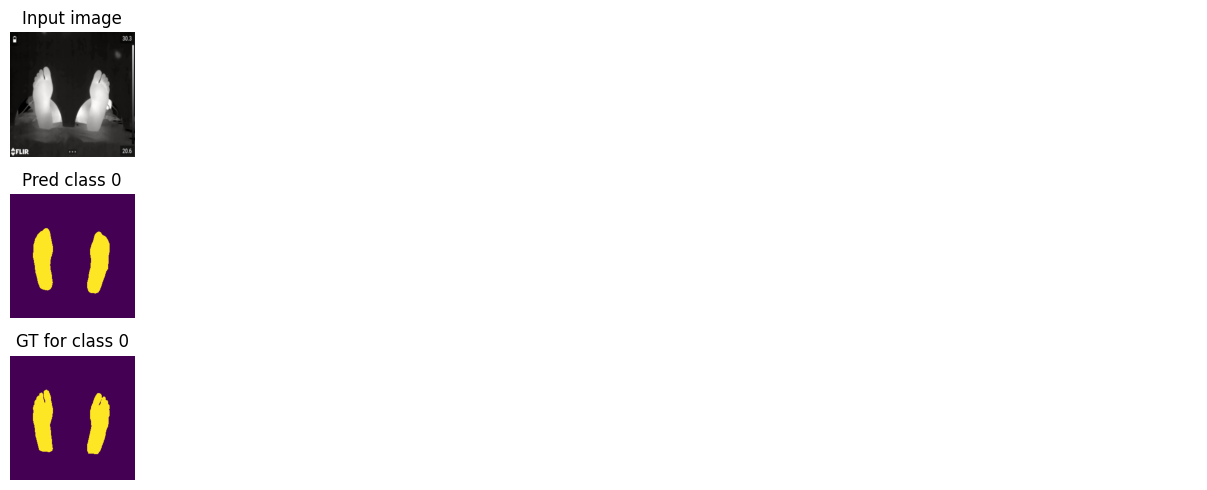

Train loss: 0.35565 | Time: 1m 58s | Val loss: 0.25374
Train_DICE_avg: 0.90016 | Train_Jaccard_avg: 0.83146 | Train_Sensitivity_avg: 0.85644 | Train_Specificity_avg: 0.98665 
Class 0 - Train_DICE: 0.90016 | Train_Jaccard: 0.83146 | Train_Sensitivity: 0.85644 | Train_Specificity: 0.98665 
Val_DICE_avg: 0.94115 | Val_Jaccard_avg: 0.89284 | Val_Sensitivity_avg: 0.96629 | Val_Specificity_avg: 0.97004 
Class 0 - Val_DICE: 0.94115 | Val_Jaccard: 0.89284 | Val_Sensitivity: 0.96629 | Val_Specificity: 0.97004 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.35615 | Time: 2m 2s | Val loss: 0.24890
Train_DICE_avg: 0.90805 | Train_Jaccard_avg: 0.84342 | Train_Sensitivity_avg: 0.87086 | Train_Specificity_avg: 0.98605 
Class 0 - Train_DICE: 0.90805 | Train_Jaccard: 0.84342 | Train_Sensitivity: 0.87086 | Train_Specificity: 0.98605 
Val_DICE_avg: 0.95137 | Val_Jaccard_avg: 0.90906 | Val_Sensitivity_avg: 0.93381 | Val_Specificity_avg: 0.98699 
Class 0 - Val_DICE: 0.95137 | Val_Jaccard: 0.90906 | Val_Sensitivity: 0.93381 | Val_Specificity: 0.98699 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.35186 | Time: 2m 5s | Val loss: 0.25992
Train_DICE_avg: 0.90674 | Train_Jaccard_avg: 0.84314 | Train_Sensitivity_avg: 0.86350 | Train_Specificity_avg: 0.98957 
Class 0 - Train_DICE: 0.90674 | Train_Jaccard: 0.84314 | Train_Sensitivity: 0.86350 | Train_Specificity: 0.98957 
Val_DICE_avg: 0.94697 | Val_Jaccard_avg: 0.90211 | Val_Sensitivity_avg: 0.92214 | Val_Specificity_avg: 0.98760 
Class 0 - Val_DICE: 0.94697 | Val_Jaccard: 0.90211 | Val_Sensitivity: 0.92214 | Val_Specificity: 0.98760 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.34472 | Time: 2m 9s | Val loss: 0.25226
Train_DICE_avg: 0.91463 | Train_Jaccard_avg: 0.85567 | Train_Sensitivity_avg: 0.87586 | Train_Specificity_avg: 0.98995 
Class 0 - Train_DICE: 0.91463 | Train_Jaccard: 0.85567 | Train_Sensitivity: 0.87586 | Train_Specificity: 0.98995 
Val_DICE_avg: 0.95410 | Val_Jaccard_avg: 0.91495 | Val_Sensitivity_avg: 0.94523 | Val_Specificity_avg: 0.98231 
Class 0 - Val_DICE: 0.95410 | Val_Jaccard: 0.91495 | Val_Sensitivity: 0.94523 | Val_Specificity: 0.98231 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.34364 | Time: 2m 13s | Val loss: 0.24379
Train_DICE_avg: 0.91409 | Train_Jaccard_avg: 0.85362 | Train_Sensitivity_avg: 0.87261 | Train_Specificity_avg: 0.99035 
Class 0 - Train_DICE: 0.91409 | Train_Jaccard: 0.85362 | Train_Sensitivity: 0.87261 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.95867 | Val_Jaccard_avg: 0.92193 | Val_Sensitivity_avg: 0.94851 | Val_Specificity_avg: 0.98533 
Class 0 - Val_DICE: 0.95867 | Val_Jaccard: 0.92193 | Val_Sensitivity: 0.94851 | Val_Specificity: 0.98533 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


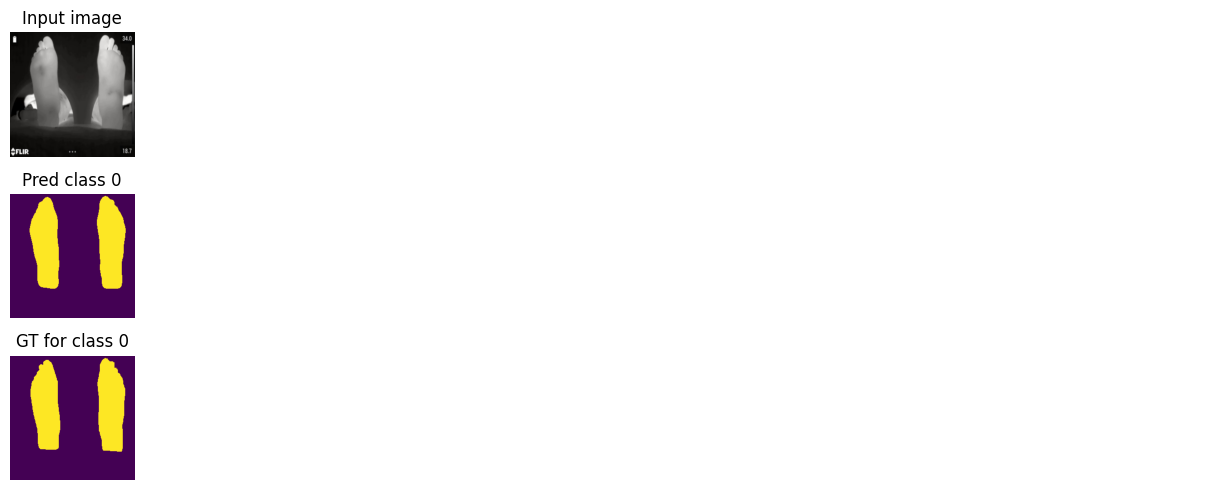

Train loss: 0.34228 | Time: 2m 17s | Val loss: 0.24055
Train_DICE_avg: 0.91780 | Train_Jaccard_avg: 0.85820 | Train_Sensitivity_avg: 0.87698 | Train_Specificity_avg: 0.99054 
Class 0 - Train_DICE: 0.91780 | Train_Jaccard: 0.85820 | Train_Sensitivity: 0.87698 | Train_Specificity: 0.99054 
Val_DICE_avg: 0.95954 | Val_Jaccard_avg: 0.92378 | Val_Sensitivity_avg: 0.96103 | Val_Specificity_avg: 0.98110 
Class 0 - Val_DICE: 0.95954 | Val_Jaccard: 0.92378 | Val_Sensitivity: 0.96103 | Val_Specificity: 0.98110 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.33900 | Time: 2m 21s | Val loss: 0.22915
Train_DICE_avg: 0.92371 | Train_Jaccard_avg: 0.86749 | Train_Sensitivity_avg: 0.88496 | Train_Specificity_avg: 0.99133 
Class 0 - Train_DICE: 0.92371 | Train_Jaccard: 0.86749 | Train_Sensitivity: 0.88496 | Train_Specificity: 0.99133 
Val_DICE_avg: 0.96224 | Val_Jaccard_avg: 0.92855 | Val_Sensitivity_avg: 0.96217 | Val_Specificity_avg: 0.98334 
Class 0 - Val_DICE: 0.96224 | Val_Jaccard: 0.92855 | Val_Sensitivity: 0.96217 | Val_Specificity: 0.98334 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.33976 | Time: 2m 25s | Val loss: 0.23944
Train_DICE_avg: 0.92732 | Train_Jaccard_avg: 0.87285 | Train_Sensitivity_avg: 0.88898 | Train_Specificity_avg: 0.99230 
Class 0 - Train_DICE: 0.92732 | Train_Jaccard: 0.87285 | Train_Sensitivity: 0.88898 | Train_Specificity: 0.99230 
Val_DICE_avg: 0.96344 | Val_Jaccard_avg: 0.93068 | Val_Sensitivity_avg: 0.95853 | Val_Specificity_avg: 0.98546 
Class 0 - Val_DICE: 0.96344 | Val_Jaccard: 0.93068 | Val_Sensitivity: 0.95853 | Val_Specificity: 0.98546 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.33397 | Time: 2m 29s | Val loss: 0.24021
Train_DICE_avg: 0.93061 | Train_Jaccard_avg: 0.87789 | Train_Sensitivity_avg: 0.89626 | Train_Specificity_avg: 0.99147 
Class 0 - Train_DICE: 0.93061 | Train_Jaccard: 0.87789 | Train_Sensitivity: 0.89626 | Train_Specificity: 0.99147 
Val_DICE_avg: 0.95982 | Val_Jaccard_avg: 0.92418 | Val_Sensitivity_avg: 0.94387 | Val_Specificity_avg: 0.98799 
Class 0 - Val_DICE: 0.95982 | Val_Jaccard: 0.92418 | Val_Sensitivity: 0.94387 | Val_Specificity: 0.98799 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.33061 | Time: 2m 32s | Val loss: 0.23794
Train_DICE_avg: 0.92642 | Train_Jaccard_avg: 0.87375 | Train_Sensitivity_avg: 0.88917 | Train_Specificity_avg: 0.99259 
Class 0 - Train_DICE: 0.92642 | Train_Jaccard: 0.87375 | Train_Sensitivity: 0.88917 | Train_Specificity: 0.99259 
Val_DICE_avg: 0.96239 | Val_Jaccard_avg: 0.92921 | Val_Sensitivity_avg: 0.96233 | Val_Specificity_avg: 0.98280 
Class 0 - Val_DICE: 0.96239 | Val_Jaccard: 0.92921 | Val_Sensitivity: 0.96233 | Val_Specificity: 0.98280 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


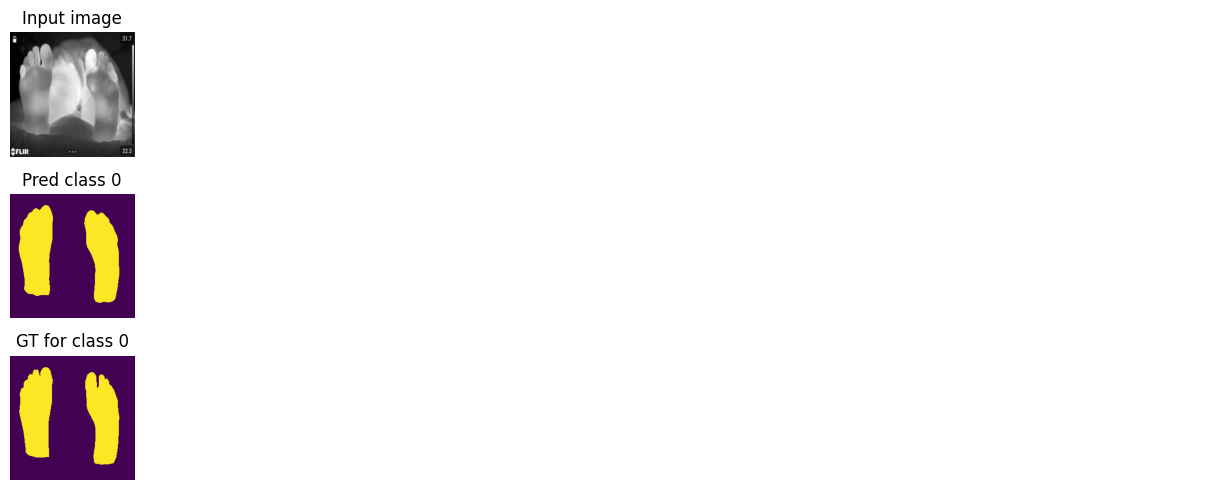

Train loss: 0.33326 | Time: 2m 37s | Val loss: 0.22371
Train_DICE_avg: 0.92921 | Train_Jaccard_avg: 0.87640 | Train_Sensitivity_avg: 0.89424 | Train_Specificity_avg: 0.99167 
Class 0 - Train_DICE: 0.92921 | Train_Jaccard: 0.87640 | Train_Sensitivity: 0.89424 | Train_Specificity: 0.99167 
Val_DICE_avg: 0.96412 | Val_Jaccard_avg: 0.93187 | Val_Sensitivity_avg: 0.95392 | Val_Specificity_avg: 0.98814 
Class 0 - Val_DICE: 0.96412 | Val_Jaccard: 0.93187 | Val_Sensitivity: 0.95392 | Val_Specificity: 0.98814 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.32884 | Time: 2m 40s | Val loss: 0.22395
Train_DICE_avg: 0.93219 | Train_Jaccard_avg: 0.88073 | Train_Sensitivity_avg: 0.89671 | Train_Specificity_avg: 0.99254 
Class 0 - Train_DICE: 0.93219 | Train_Jaccard: 0.88073 | Train_Sensitivity: 0.89671 | Train_Specificity: 0.99254 
Val_DICE_avg: 0.96184 | Val_Jaccard_avg: 0.92830 | Val_Sensitivity_avg: 0.96301 | Val_Specificity_avg: 0.98183 
Class 0 - Val_DICE: 0.96184 | Val_Jaccard: 0.92830 | Val_Sensitivity: 0.96301 | Val_Specificity: 0.98183 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.32876 | Time: 2m 44s | Val loss: 0.22887
Train_DICE_avg: 0.92737 | Train_Jaccard_avg: 0.87527 | Train_Sensitivity_avg: 0.89144 | Train_Specificity_avg: 0.99263 
Class 0 - Train_DICE: 0.92737 | Train_Jaccard: 0.87527 | Train_Sensitivity: 0.89144 | Train_Specificity: 0.99263 
Val_DICE_avg: 0.96096 | Val_Jaccard_avg: 0.92640 | Val_Sensitivity_avg: 0.94552 | Val_Specificity_avg: 0.98830 
Class 0 - Val_DICE: 0.96096 | Val_Jaccard: 0.92640 | Val_Sensitivity: 0.94552 | Val_Specificity: 0.98830 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.32735 | Time: 2m 48s | Val loss: 0.23728
Train_DICE_avg: 0.93654 | Train_Jaccard_avg: 0.88700 | Train_Sensitivity_avg: 0.90280 | Train_Specificity_avg: 0.99219 
Class 0 - Train_DICE: 0.93654 | Train_Jaccard: 0.88700 | Train_Sensitivity: 0.90280 | Train_Specificity: 0.99219 
Val_DICE_avg: 0.96381 | Val_Jaccard_avg: 0.93135 | Val_Sensitivity_avg: 0.95126 | Val_Specificity_avg: 0.98923 
Class 0 - Val_DICE: 0.96381 | Val_Jaccard: 0.93135 | Val_Sensitivity: 0.95126 | Val_Specificity: 0.98923 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.32519 | Time: 2m 52s | Val loss: 0.22474
Train_DICE_avg: 0.93727 | Train_Jaccard_avg: 0.88777 | Train_Sensitivity_avg: 0.90464 | Train_Specificity_avg: 0.99206 
Class 0 - Train_DICE: 0.93727 | Train_Jaccard: 0.88777 | Train_Sensitivity: 0.90464 | Train_Specificity: 0.99206 
Val_DICE_avg: 0.96614 | Val_Jaccard_avg: 0.93565 | Val_Sensitivity_avg: 0.97183 | Val_Specificity_avg: 0.98313 
Class 0 - Val_DICE: 0.96614 | Val_Jaccard: 0.93565 | Val_Sensitivity: 0.97183 | Val_Specificity: 0.98313 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


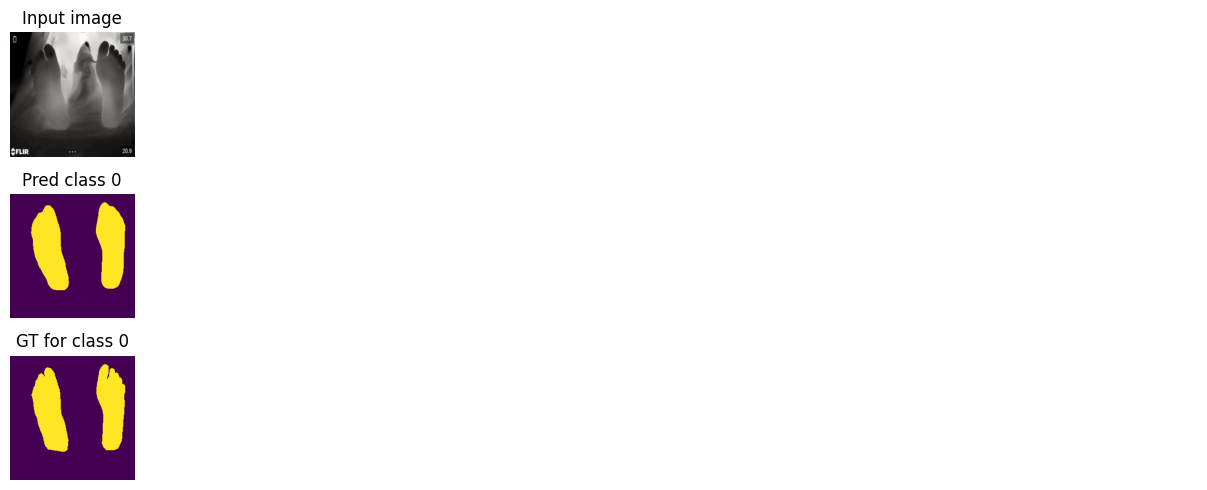

Train loss: 0.32499 | Time: 2m 56s | Val loss: 0.23025
Train_DICE_avg: 0.93202 | Train_Jaccard_avg: 0.88211 | Train_Sensitivity_avg: 0.89450 | Train_Specificity_avg: 0.99413 
Class 0 - Train_DICE: 0.93202 | Train_Jaccard: 0.88211 | Train_Sensitivity: 0.89450 | Train_Specificity: 0.99413 
Val_DICE_avg: 0.96818 | Val_Jaccard_avg: 0.93888 | Val_Sensitivity_avg: 0.95815 | Val_Specificity_avg: 0.99115 
Class 0 - Val_DICE: 0.96818 | Val_Jaccard: 0.93888 | Val_Sensitivity: 0.95815 | Val_Specificity: 0.99115 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.32388 | Time: 3m 0s | Val loss: 0.21933
Train_DICE_avg: 0.93696 | Train_Jaccard_avg: 0.88875 | Train_Sensitivity_avg: 0.90560 | Train_Specificity_avg: 0.99241 
Class 0 - Train_DICE: 0.93696 | Train_Jaccard: 0.88875 | Train_Sensitivity: 0.90560 | Train_Specificity: 0.99241 
Val_DICE_avg: 0.96745 | Val_Jaccard_avg: 0.93756 | Val_Sensitivity_avg: 0.95500 | Val_Specificity_avg: 0.99103 
Class 0 - Val_DICE: 0.96745 | Val_Jaccard: 0.93756 | Val_Sensitivity: 0.95500 | Val_Specificity: 0.99103 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.32306 | Time: 3m 3s | Val loss: 0.22456
Train_DICE_avg: 0.94038 | Train_Jaccard_avg: 0.89291 | Train_Sensitivity_avg: 0.90796 | Train_Specificity_avg: 0.99236 
Class 0 - Train_DICE: 0.94038 | Train_Jaccard: 0.89291 | Train_Sensitivity: 0.90796 | Train_Specificity: 0.99236 
Val_DICE_avg: 0.96911 | Val_Jaccard_avg: 0.94064 | Val_Sensitivity_avg: 0.96027 | Val_Specificity_avg: 0.99029 
Class 0 - Val_DICE: 0.96911 | Val_Jaccard: 0.94064 | Val_Sensitivity: 0.96027 | Val_Specificity: 0.99029 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.32334 | Time: 3m 7s | Val loss: 0.22271
Train_DICE_avg: 0.93649 | Train_Jaccard_avg: 0.88709 | Train_Sensitivity_avg: 0.90421 | Train_Specificity_avg: 0.99204 
Class 0 - Train_DICE: 0.93649 | Train_Jaccard: 0.88709 | Train_Sensitivity: 0.90421 | Train_Specificity: 0.99204 
Val_DICE_avg: 0.96971 | Val_Jaccard_avg: 0.94177 | Val_Sensitivity_avg: 0.96479 | Val_Specificity_avg: 0.98908 
Class 0 - Val_DICE: 0.96971 | Val_Jaccard: 0.94177 | Val_Sensitivity: 0.96479 | Val_Specificity: 0.98908 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.31988 | Time: 3m 11s | Val loss: 0.22163
Train_DICE_avg: 0.93783 | Train_Jaccard_avg: 0.89007 | Train_Sensitivity_avg: 0.90250 | Train_Specificity_avg: 0.99400 
Class 0 - Train_DICE: 0.93783 | Train_Jaccard: 0.89007 | Train_Sensitivity: 0.90250 | Train_Specificity: 0.99400 
Val_DICE_avg: 0.96945 | Val_Jaccard_avg: 0.94130 | Val_Sensitivity_avg: 0.96160 | Val_Specificity_avg: 0.99025 
Class 0 - Val_DICE: 0.96945 | Val_Jaccard: 0.94130 | Val_Sensitivity: 0.96160 | Val_Specificity: 0.99025 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


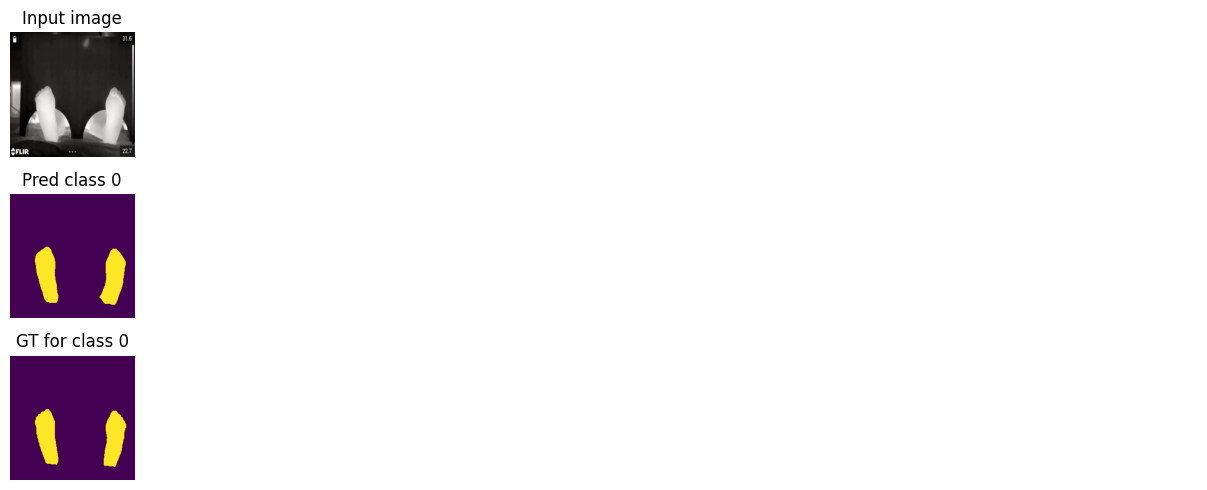

Train loss: 0.31807 | Time: 3m 15s | Val loss: 0.21035
Train_DICE_avg: 0.93893 | Train_Jaccard_avg: 0.89208 | Train_Sensitivity_avg: 0.90609 | Train_Specificity_avg: 0.99399 
Class 0 - Train_DICE: 0.93893 | Train_Jaccard: 0.89208 | Train_Sensitivity: 0.90609 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.96962 | Val_Jaccard_avg: 0.94167 | Val_Sensitivity_avg: 0.96678 | Val_Specificity_avg: 0.98817 
Class 0 - Val_DICE: 0.96962 | Val_Jaccard: 0.94167 | Val_Sensitivity: 0.96678 | Val_Specificity: 0.98817 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.32016 | Time: 3m 19s | Val loss: 0.21740
Train_DICE_avg: 0.93679 | Train_Jaccard_avg: 0.89111 | Train_Sensitivity_avg: 0.90575 | Train_Specificity_avg: 0.99309 
Class 0 - Train_DICE: 0.93679 | Train_Jaccard: 0.89111 | Train_Sensitivity: 0.90575 | Train_Specificity: 0.99309 
Val_DICE_avg: 0.96948 | Val_Jaccard_avg: 0.94133 | Val_Sensitivity_avg: 0.96002 | Val_Specificity_avg: 0.99080 
Class 0 - Val_DICE: 0.96948 | Val_Jaccard: 0.94133 | Val_Sensitivity: 0.96002 | Val_Specificity: 0.99080 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.31631 | Time: 3m 22s | Val loss: 0.22431
Train_DICE_avg: 0.94372 | Train_Jaccard_avg: 0.89880 | Train_Sensitivity_avg: 0.91212 | Train_Specificity_avg: 0.99350 
Class 0 - Train_DICE: 0.94372 | Train_Jaccard: 0.89880 | Train_Sensitivity: 0.91212 | Train_Specificity: 0.99350 
Val_DICE_avg: 0.96941 | Val_Jaccard_avg: 0.94119 | Val_Sensitivity_avg: 0.95833 | Val_Specificity_avg: 0.99170 
Class 0 - Val_DICE: 0.96941 | Val_Jaccard: 0.94119 | Val_Sensitivity: 0.95833 | Val_Specificity: 0.99170 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.31712 | Time: 3m 26s | Val loss: 0.22872
Train_DICE_avg: 0.94380 | Train_Jaccard_avg: 0.89901 | Train_Sensitivity_avg: 0.91221 | Train_Specificity_avg: 0.99384 
Class 0 - Train_DICE: 0.94380 | Train_Jaccard: 0.89901 | Train_Sensitivity: 0.91221 | Train_Specificity: 0.99384 
Val_DICE_avg: 0.96866 | Val_Jaccard_avg: 0.93980 | Val_Sensitivity_avg: 0.95841 | Val_Specificity_avg: 0.99086 
Class 0 - Val_DICE: 0.96866 | Val_Jaccard: 0.93980 | Val_Sensitivity: 0.95841 | Val_Specificity: 0.99086 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.31498 | Time: 3m 30s | Val loss: 0.22159
Train_DICE_avg: 0.94574 | Train_Jaccard_avg: 0.90239 | Train_Sensitivity_avg: 0.91552 | Train_Specificity_avg: 0.99450 
Class 0 - Train_DICE: 0.94574 | Train_Jaccard: 0.90239 | Train_Sensitivity: 0.91552 | Train_Specificity: 0.99450 
Val_DICE_avg: 0.96917 | Val_Jaccard_avg: 0.94080 | Val_Sensitivity_avg: 0.96253 | Val_Specificity_avg: 0.98928 
Class 0 - Val_DICE: 0.96917 | Val_Jaccard: 0.94080 | Val_Sensitivity: 0.96253 | Val_Specificity: 0.98928 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


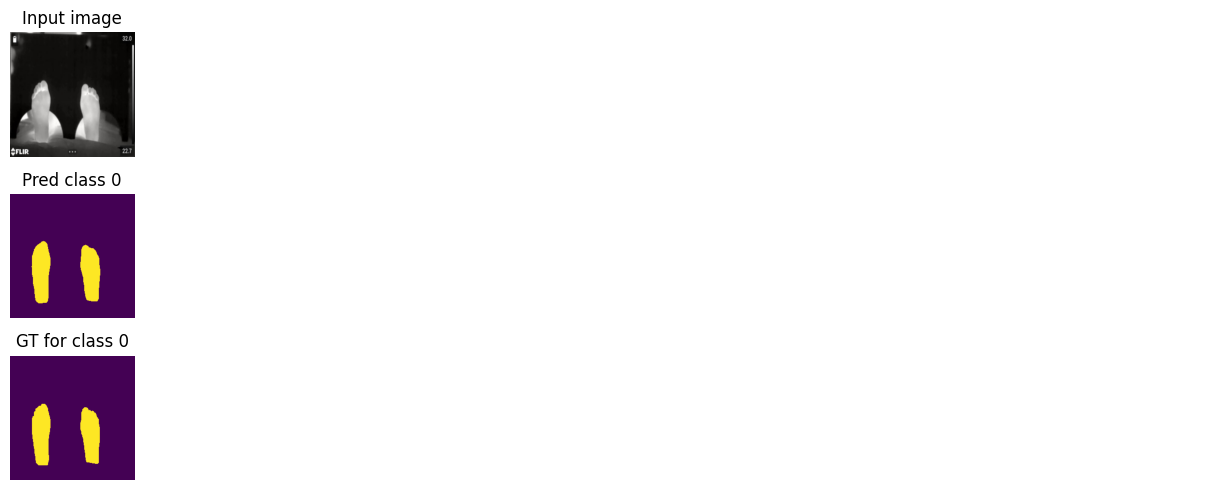

Train loss: 0.31690 | Time: 3m 34s | Val loss: 0.22310
Train_DICE_avg: 0.94831 | Train_Jaccard_avg: 0.90506 | Train_Sensitivity_avg: 0.91805 | Train_Specificity_avg: 0.99358 
Class 0 - Train_DICE: 0.94831 | Train_Jaccard: 0.90506 | Train_Sensitivity: 0.91805 | Train_Specificity: 0.99358 
Val_DICE_avg: 0.96982 | Val_Jaccard_avg: 0.94203 | Val_Sensitivity_avg: 0.96302 | Val_Specificity_avg: 0.98977 
Class 0 - Val_DICE: 0.96982 | Val_Jaccard: 0.94203 | Val_Sensitivity: 0.96302 | Val_Specificity: 0.98977 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.31602 | Time: 3m 38s | Val loss: 0.21859
Train_DICE_avg: 0.94406 | Train_Jaccard_avg: 0.89998 | Train_Sensitivity_avg: 0.91482 | Train_Specificity_avg: 0.99301 
Class 0 - Train_DICE: 0.94406 | Train_Jaccard: 0.89998 | Train_Sensitivity: 0.91482 | Train_Specificity: 0.99301 
Val_DICE_avg: 0.96995 | Val_Jaccard_avg: 0.94224 | Val_Sensitivity_avg: 0.96220 | Val_Specificity_avg: 0.99038 
Class 0 - Val_DICE: 0.96995 | Val_Jaccard: 0.94224 | Val_Sensitivity: 0.96220 | Val_Specificity: 0.99038 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.31681 | Time: 3m 42s | Val loss: 0.22673
Train_DICE_avg: 0.94360 | Train_Jaccard_avg: 0.89946 | Train_Sensitivity_avg: 0.91125 | Train_Specificity_avg: 0.99442 
Class 0 - Train_DICE: 0.94360 | Train_Jaccard: 0.89946 | Train_Sensitivity: 0.91125 | Train_Specificity: 0.99442 
Val_DICE_avg: 0.96913 | Val_Jaccard_avg: 0.94070 | Val_Sensitivity_avg: 0.95808 | Val_Specificity_avg: 0.99154 
Class 0 - Val_DICE: 0.96913 | Val_Jaccard: 0.94070 | Val_Sensitivity: 0.95808 | Val_Specificity: 0.99154 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.31418 | Time: 3m 45s | Val loss: 0.21795
Train_DICE_avg: 0.94454 | Train_Jaccard_avg: 0.90076 | Train_Sensitivity_avg: 0.91272 | Train_Specificity_avg: 0.99478 
Class 0 - Train_DICE: 0.94454 | Train_Jaccard: 0.90076 | Train_Sensitivity: 0.91272 | Train_Specificity: 0.99478 
Val_DICE_avg: 0.97054 | Val_Jaccard_avg: 0.94335 | Val_Sensitivity_avg: 0.96455 | Val_Specificity_avg: 0.99005 
Class 0 - Val_DICE: 0.97054 | Val_Jaccard: 0.94335 | Val_Sensitivity: 0.96455 | Val_Specificity: 0.99005 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.31568 | Time: 3m 49s | Val loss: 0.21612
Train_DICE_avg: 0.94684 | Train_Jaccard_avg: 0.90342 | Train_Sensitivity_avg: 0.91714 | Train_Specificity_avg: 0.99384 
Class 0 - Train_DICE: 0.94684 | Train_Jaccard: 0.90342 | Train_Sensitivity: 0.91714 | Train_Specificity: 0.99384 
Val_DICE_avg: 0.97089 | Val_Jaccard_avg: 0.94398 | Val_Sensitivity_avg: 0.96456 | Val_Specificity_avg: 0.99037 
Class 0 - Val_DICE: 0.97089 | Val_Jaccard: 0.94398 | Val_Sensitivity: 0.96456 | Val_Specificity: 0.99037 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


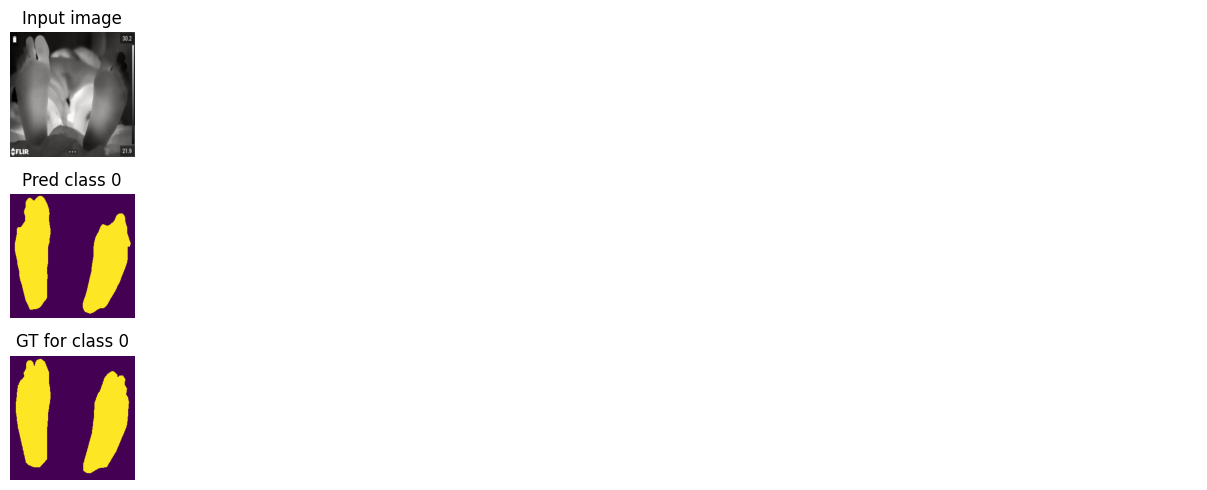

Train loss: 0.31149 | Time: 3m 53s | Val loss: 0.21940
Train_DICE_avg: 0.94305 | Train_Jaccard_avg: 0.89858 | Train_Sensitivity_avg: 0.91002 | Train_Specificity_avg: 0.99465 
Class 0 - Train_DICE: 0.94305 | Train_Jaccard: 0.89858 | Train_Sensitivity: 0.91002 | Train_Specificity: 0.99465 
Val_DICE_avg: 0.97033 | Val_Jaccard_avg: 0.94290 | Val_Sensitivity_avg: 0.96098 | Val_Specificity_avg: 0.99133 
Class 0 - Val_DICE: 0.97033 | Val_Jaccard: 0.94290 | Val_Sensitivity: 0.96098 | Val_Specificity: 0.99133 


Training DICE,▁▃▃▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████
Training Jaccard,▁▂▂▃▃▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇████████████████
Training Loss,█▆▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▂▄▄▄▅▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇██████████████████
Training Specificity,▁▂▃▄▄▆▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
Validation DICE,▁▃▃▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇██████████████████████
Validation Jaccard,▁▃▃▄▄▅▅▆▆▇▇▇▇▇▇██▇▇█████████████████████
Validation Loss,█▇▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▁▃▄▆▇▅▆▆▇▇▇▇▇▇▇▇██▇████▇███████████████
Validation Specificity,▁▆▆▆▆▇▇▇▇▇▇▇██████▇▇█▇███▇██████████████
Training DICE,0.94305



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


Global Performance Metrics:
Loss mean: 0.24240, std: 0.00000
Dice Coefficient mean: 0.94293, std: 0.08599
Jaccard Index mean: 0.90205, std: 0.12420
Sensitivity mean: 0.95008, std: 0.08593
Specificity mean: 0.98667, std: 0.01117

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94293, std: 0.08599
Jaccard mean: 0.90205, std: 0.12420
Sensitivity mean: 0.95008, std: 0.08593
Specificity mean: 0.98667, std: 0.01117
